<a href="https://colab.research.google.com/github/dutta-arka/Mutual_Transit/blob/main/Code/Mutual_Transit_Detection_Complete_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gefera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gefera: filename=gefera-0.1-cp310-cp310-linux_x86_64.whl size=591295 sha256=99bdde08500aacff42b3b9eaefed2f47018dc30b37ffc9223e37bb7ce6ac9fbb
  Stored in directory: /root/.cache/pip/wheels/63/8d/41/bf4921831e168858b005547ed6f3f77c61b80532447d528f5e
Successfully built gefera


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gefera as gf

# Defining MultiPlanetSystem class
class MultiPlanetSystem:
    def __init__(self):
        self.planets = []
        self.orbits = None
        self.system = None
        self.default_values = {
            'a': 1.0,  # Default semi-major axis
            't': 0.0,  # Default time of transit
            'e': 0.00001,  # Default eccentricity
            'p': 5.0,  # Default orbital period
            'w': 90.0,  # Default argument of periastron
            'om': 0.0, # Default longitude of ascending node
            'b': 0.0,  # Default impact parameter
            'i': 0.0,  # Default inclination
            'u1': 0.2, # Default limb darkening coefficient 1
            'u2': 0.2,  # Default limb darkening coefficient 2
            'r': 0.01  # Default radius ratio
        }

    def add_planet(self, a=None, t=None, e=None, p=None, w=None, om=None, b=None, u1=None, u2=None, r=None):
        planet_params = {
            'a': a if a is not None else self.default_values['a'],
            't': t if t is not None else self.default_values['t'],
            'e': e if e is not None else self.default_values['e'],
            'p': p if p is not None else self.default_values['p'],
            'w': w if w is not None else self.default_values['w'],
            'om': om if om is not None else self.default_values['om'],
            'b': b if b is not None else self.default_values['b'],
            'u1': u1 if u1 is not None else self.default_values['u1'],
            'u2': u2 if u2 is not None else self.default_values['u2'],
            'r': r if r is not None else self.default_values['r']
        }
        self.planets.append(planet_params)

    def initialize_orbits(self):
        if len(self.planets) < 2:
            raise ValueError("At least two planets are required to initialize orbits.")

        primary_params = self.planets[0]
        o1 = gf.orbits.PrimaryOrbit(primary_params['a'], primary_params['t'], primary_params['e'], primary_params['p'], primary_params['w'], np.arccos(primary_params['b'] / primary_params['a']))
        self.orbits = [o1]
        for planet_params in self.planets[1:]:
            o2 = gf.orbits.ConfocalOrbit(planet_params['a'], planet_params['t'], planet_params['e'], planet_params['p'], planet_params['om'], planet_params['w'], np.arccos(planet_params['b'] / planet_params['a']))
            self.orbits.append(o2)
        self.system = gf.systems.ConfocalSystem(*self.orbits)

    def simulate_lightcurve(self, t):
        flux = np.zeros_like(t)
        for i, planet_params in enumerate(self.planets):
            u1 = planet_params['u1']
            u2 = planet_params['u2']
            r = planet_params['r']
            flux += self.system.lightcurve(t, u1, u2, r, 0.0 if i == 0 else self.planets[i-1]['r'], grad=False)
        return flux

In [3]:
f = open("/content/PS_2024.04.26_06.59.44.csv")
f= f.readlines(0)
#print(f)

In [4]:
f = f[87:]

In [6]:
list_all=[]
for i in f:
    list_all.append(i.split("\n"))

#print(list_all,end="\n\n\n\n")
word=[]
for i in list_all:
    for j in i:
        #print(j,"\n\n")
        s = j.split(",")
        #print(s)
        break
    word.append(s)

print(word[1])

['AU Mic b', 'AU Mic', 'TIC 441420236', '1', '3', 'Transit', '2020', 'Transiting Exoplanet Survey Satellite (TESS)', '0.1 m TESS Telescope', '1', '8.4630004', '0.0000058', '-0.000006', '0', '0.0644', '0.0056', '-0.0054', '0', '4.19', '0.24', '-0.22', '0', '0.12', '0.16', '-0.08', '0', '89.18', '0.53', '-0.45', '0', '2458330.391', '0.00058', '-0.00057', '0', '0.26', '0.13', '-0.17', '0', '', '', '', '', '3.56', '0.6', '-0.46', '0', '18.5', '1.3', '-1.4', '0', '0.0512', '0.002', '-0.002', '0', '', '', '', '', '-20', '140', '-130', '0', '20h45m09.87s', '311.2911369', '-31d20m32.82s', '-31.34245']


In [5]:
def find_partial_string_in_array(arr, target):
    indices = []
    for i, row in enumerate(arr):
        for j, item in enumerate(row):
            if target in item:  # Check if target is a substring of the current item
                indices.append([i, j])  # Append the index of the row containing the target string
    return indices

In [7]:
x= find_partial_string_in_array(word,"AU Mic b")

print(x)
for i in x:
    print(word[i[0]][i[1]])

[[1, 0]]
AU Mic b


In [8]:
hostname=[]
orb_per=[]
for i in word:
    #print(i[1])
    if i[1] not in hostname:
        hostname.append(i[1])
    else:
        pass

    if i[13] not in hostname:
        orb_per.append(i[13])
    else:
        pass

orb_per=orb_per[1:]

In [9]:
exo_plnt_all=[]
hostname = hostname[1:]
for i in hostname:

    #print(i)
    x= find_partial_string_in_array(word,i)

    #print(x)
    exo_plnt_list=[]
    for j in x:
        exo_plnt_list.append(word[j[0]][j[1]])
    exo_plnt_all.append(exo_plnt_list)

print(hostname)
print(len(hostname))

['AU Mic', 'CoRoT-20', 'EPIC 220674823', 'EPIC 249893012', 'HD 106315', 'HD 108236', 'HD 15337', 'HD 15906', 'HD 191939', 'HD 23472', 'HD 260655', 'HD 3167', 'HD 73583', 'HIP 113103', 'K2-138', 'K2-199', 'K2-233', 'K2-3', 'KELT-6', 'KOI-12', 'Kepler-101', 'Kepler-117', 'Kepler-1514', 'Kepler-9', 'L 98-59', 'TOI-125', 'TOI-1260', 'TOI-1266', 'TOI-1670', 'TOI-2095', 'HD 22946', 'TOI-5126', 'TOI-5398', 'TOI-561', 'TOI-700', 'TOI-776', 'WASP-132', 'WASP-148']
38


In [10]:
planet={}
for key,value in zip(hostname, exo_plnt_all):
    if value not in planet.values():
        planet[key] = value
    else:
        pass
print(planet)
counts = 0
for key,values in planet.items():
  counts+=len(values)
print(counts)

{'AU Mic': ['AU Mic b', 'AU Mic', 'AU Mic c', 'AU Mic'], 'CoRoT-20': ['CoRoT-20 b', 'CoRoT-20'], 'EPIC 220674823': ['EPIC 220674823 c', 'EPIC 220674823'], 'EPIC 249893012': ['EPIC 249893012 c', 'EPIC 249893012'], 'HD 106315': ['HD 106315 b', 'HD 106315', 'HD 106315 c', 'HD 106315'], 'HD 108236': ['HD 108236 b', 'HD 108236', 'HD 108236 c', 'HD 108236', 'HD 108236 d', 'HD 108236', 'HD 108236 e', 'HD 108236'], 'HD 15337': ['HD 15337 b', 'HD 15337', 'HD 15337 c', 'HD 15337'], 'HD 15906': ['HD 15906 b', 'HD 15906', 'HD 15906 c', 'HD 15906'], 'HD 191939': ['HD 191939 b', 'HD 191939', 'HD 191939 c', 'HD 191939', 'HD 191939 d', 'HD 191939'], 'HD 23472': ['HD 23472 b', 'HD 23472', 'HD 23472 c', 'HD 23472', 'HD 23472 d', 'HD 23472', 'HD 23472 e', 'HD 23472', 'HD 23472 f', 'HD 23472'], 'HD 260655': ['HD 260655 b', 'HD 260655', 'HD 260655 c', 'HD 260655'], 'HD 3167': ['HD 3167 c', 'HD 3167'], 'HD 73583': ['HD 73583 b', 'HD 73583', 'HD 73583 c', 'HD 73583'], 'HIP 113103': ['HIP 113103 b', 'HIP 1131

In [11]:
for i in hostname:
    value_to_check = i

    # Iterate over each key-value pair in the dictionary
    for key, value_list in planet.items():
        # Iterate over each item in the list associated with the current key
        for item in value_list:
            # Check if the value exists in the current item
            if item == value_to_check:
                value_list.remove(item)
        planet[key] = value_list
print(planet)

{'AU Mic': ['AU Mic b', 'AU Mic c'], 'CoRoT-20': ['CoRoT-20 b'], 'EPIC 220674823': ['EPIC 220674823 c'], 'EPIC 249893012': ['EPIC 249893012 c'], 'HD 106315': ['HD 106315 b', 'HD 106315 c'], 'HD 108236': ['HD 108236 b', 'HD 108236 c', 'HD 108236 d', 'HD 108236 e'], 'HD 15337': ['HD 15337 b', 'HD 15337 c'], 'HD 15906': ['HD 15906 b', 'HD 15906 c'], 'HD 191939': ['HD 191939 b', 'HD 191939 c', 'HD 191939 d'], 'HD 23472': ['HD 23472 b', 'HD 23472 c', 'HD 23472 d', 'HD 23472 e', 'HD 23472 f'], 'HD 260655': ['HD 260655 b', 'HD 260655 c'], 'HD 3167': ['HD 3167 c'], 'HD 73583': ['HD 73583 b', 'HD 73583 c'], 'HIP 113103': ['HIP 113103 b', 'HIP 113103 c'], 'K2-138': ['K2-138 b', 'K2-138 c', 'K2-138 d', 'K2-138 e', 'K2-138 f', 'K2-138 g'], 'K2-199': ['K2-199 b', 'K2-199 c'], 'K2-233': ['K2-233 b', 'K2-233 c', 'K2-233 d'], 'K2-3': ['K2-3 b', 'K2-3 d'], 'KELT-6': ['KELT-6 b'], 'KOI-12': ['KOI-12 b'], 'Kepler-101': ['Kepler-101 b', 'Kepler-101 c'], 'Kepler-117': ['Kepler-117 b', 'Kepler-117 c'], 'Kep

In [12]:
import itertools

# Splitting into two planet combinantions for further analysis
# Iterate over a copy of the dictionary because we'll modify it during iteration
for hostname, items in list(planet.items()):
    if len(items) == 1:  # If value list has a single element
        del planet[hostname]
    elif len(items) > 2:  # If value list has more than 2 elements, split into combinations of size 2
        combinations = list(itertools.combinations(items, 2))
        counter = 1
        for comb in combinations:
            planet[f"{hostname} (Combination) {counter}"] = list(comb)
            counter += 1
        del planet[hostname]

print(planet)

{'AU Mic': ['AU Mic b', 'AU Mic c'], 'HD 106315': ['HD 106315 b', 'HD 106315 c'], 'HD 15337': ['HD 15337 b', 'HD 15337 c'], 'HD 15906': ['HD 15906 b', 'HD 15906 c'], 'HD 260655': ['HD 260655 b', 'HD 260655 c'], 'HD 73583': ['HD 73583 b', 'HD 73583 c'], 'HIP 113103': ['HIP 113103 b', 'HIP 113103 c'], 'K2-199': ['K2-199 b', 'K2-199 c'], 'K2-3': ['K2-3 b', 'K2-3 d'], 'Kepler-101': ['Kepler-101 b', 'Kepler-101 c'], 'Kepler-117': ['Kepler-117 b', 'Kepler-117 c'], 'Kepler-1514': ['Kepler-1514 b', 'Kepler-1514 c'], 'Kepler-9': ['Kepler-9 b', 'Kepler-9 c'], 'TOI-1670': ['TOI-1670 b', 'TOI-1670 c'], 'TOI-2095': ['TOI-2095 b', 'TOI-2095 c'], 'TOI-5126': ['TOI-5126 b', 'TOI-5126 c'], 'TOI-5398': ['TOI-5398 b', 'TOI-5398 c'], 'TOI-776': ['TOI-776 b', 'TOI-776 c'], 'WASP-132': ['WASP-132 b', 'WASP-132 c'], 'HD 108236 (Combination) 1': ['HD 108236 b', 'HD 108236 c'], 'HD 108236 (Combination) 2': ['HD 108236 b', 'HD 108236 d'], 'HD 108236 (Combination) 3': ['HD 108236 b', 'HD 108236 e'], 'HD 108236 (

In [13]:
orb_per=[]
for i in word:


    if i[13] not in hostname:
        orb_per.append(i[13])
    else:
        pass

In [14]:
def find_orbital_period(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[87:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        return(word[x[0][0]][10])



  # Assuming 'orbital_period' is the column header for the orbital period

In [15]:
float(find_orbital_period("/content/PS_2024.04.26_06.59.44.csv","AU Mic b"))

8.4630004

In [16]:
def find_semi_major_axis(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[87:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        if len(word[x[0][0]][14]) >0:
            return(word[x[0][0]][14])
        else:
            return

In [17]:
def find_eccentricity(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[87:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        if len(word[x[0][0]][22])>0:
            return(word[x[0][0]][22])
        else:
            #print("yes")
            return

In [18]:
find_eccentricity("/content/PS_2024.04.26_06.59.44.csv","AU Mic b")

'0.12'

In [19]:
def find_inclination(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[87:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        if len(word[x[0][0]][26])>0:
            return(word[x[0][0]][26])
        else:
            #print("yes")
            return

In [20]:
def find_transit_time(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[87:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        if len(word[x[0][0]][30])>0:
            return(word[x[0][0]][30])
        else:
            #print("yes")
            return

In [21]:
def find_impacter_parameter(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[87:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        if len(word[x[0][0]][34])>0:
            return(word[x[0][0]][34])
        else:
            #print("yes")
            return

In [22]:
def find_longitude_periastron(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[87:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        if len(word[x[0][0]][58])>0:
            return(word[x[0][0]][58])
        else:
            #print("yes")
            return

In [23]:
def find_radius_ratio(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[87:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        if len(word[x[0][0]][50]) >0:
            # print(len(word[x[0][0]][99]),len(word[x[0][0]][19]))
            return(float(word[x[0][0]][50]))
        else:
            #print("yes")
            return None

In [24]:
def find_sr(csv_file, input_value):
    with open(csv_file, 'r') as file:
        file= file.readlines(0)
        file = file[147:]

        list_all=[]
        for i in f:
            list_all.append(i.split("\n"))

        #print(list_all,end="\n\n\n\n")
        word=[]
        for i in list_all:
            for j in i:
                #print(j,"\n\n")
                s = j.split(",")
                #print(s)
                break
            word.append(s)
        x= find_partial_string_in_array(word,input_value)
        #print(x[0][1])
        if len(word[x[0][0]][99])>0:
            return(word[x[0][0]][99])
        else:
            #print("yes")
            return

In [25]:
find_longitude_periastron("/content/PS_2024.04.26_06.59.44.csv","AU Mic b")

'-20'

In [26]:
len(planet)

74

In [27]:
import os

15.777356000000001 3497.3909999998286 0.12 8.4630004 -20.0 3.141592653589793 0.26 0.6 0.2 0.0512
27.144892 3509.223999999929 0.00338 18.85969 223.2844 3.141592653589793 0.3 0.6 0.2 0.0311
['AU Mic b', 'AU Mic c']


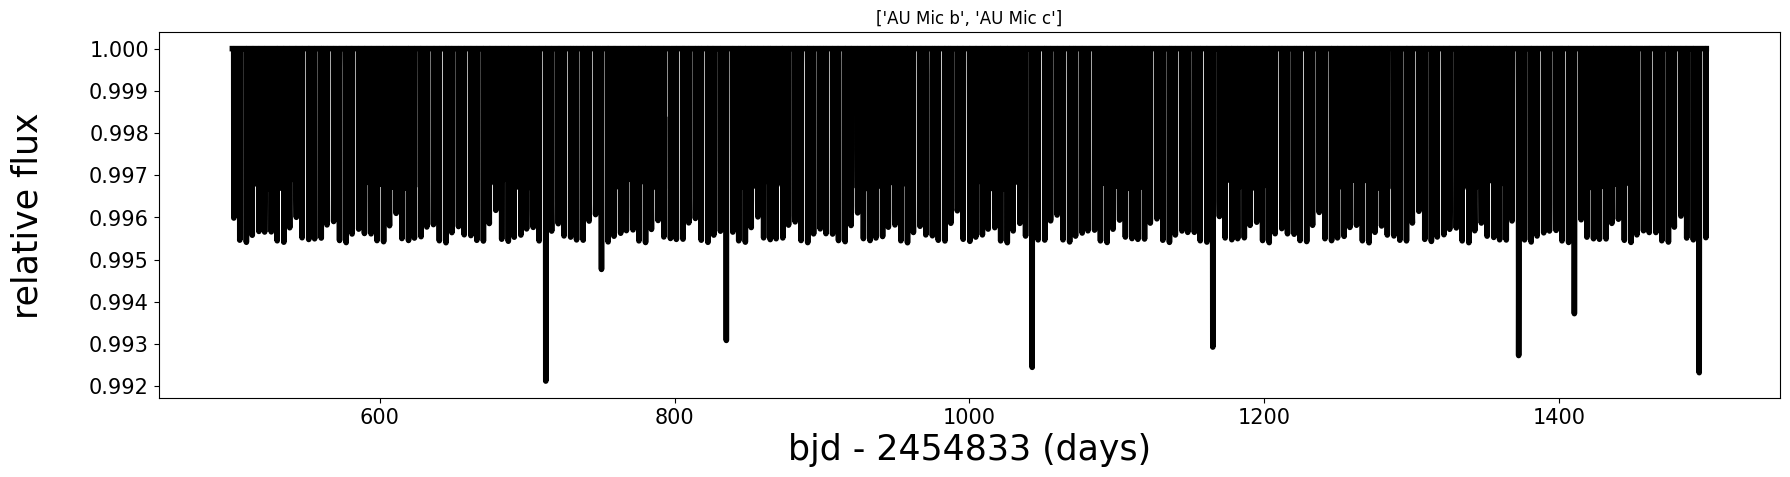

22.220593 2753.5490000001155 0.093 9.55237 239.0 3.141592653589793 0.67 0.6 0.2 0.01728
36.821996999999996 2778.1329999999143 0.18 21.058 53.0 3.141592653589793 0.688 0.6 0.2 0.03207
['HD 106315 b', 'HD 106315 c']


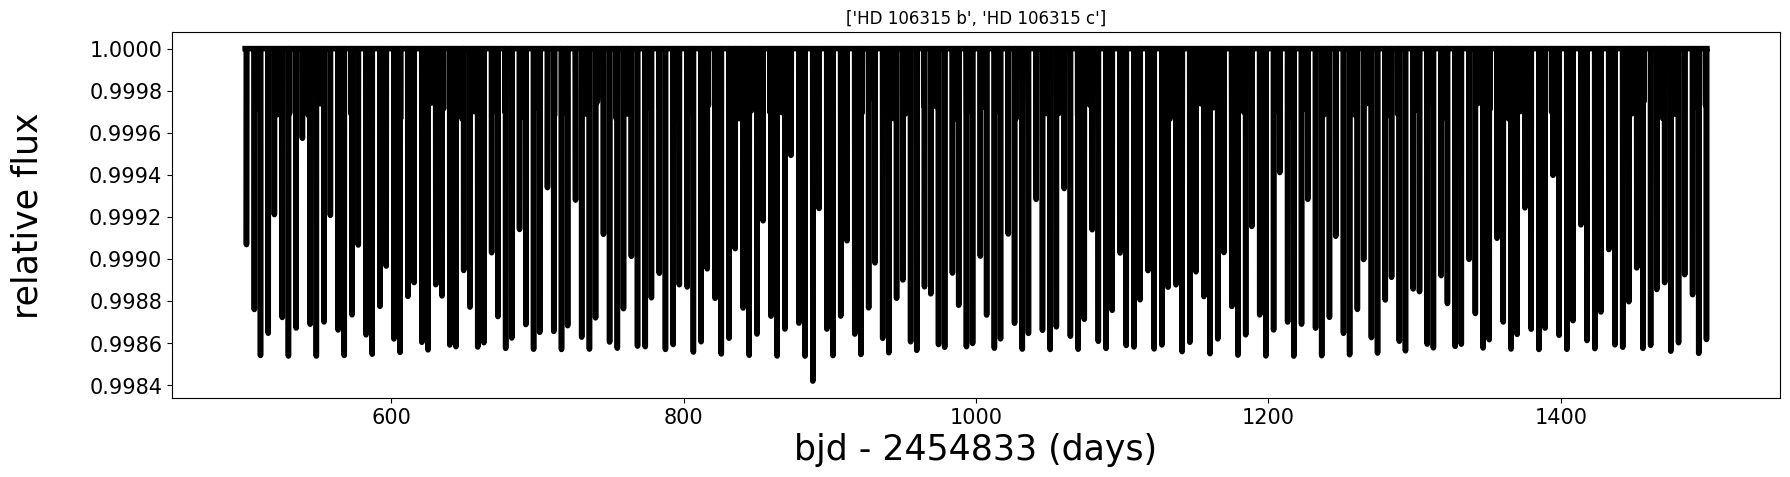

12.788478000000001 3578.461999999825 0.09 4.75615 62.0 3.141592653589793 0.33 0.6 0.2 0.01761
31.064732 3581.5499999998137 0.05 17.1784 329.0 3.141592653589793 0.87 0.6 0.2 0.0256
['HD 15337 b', 'HD 15337 c']


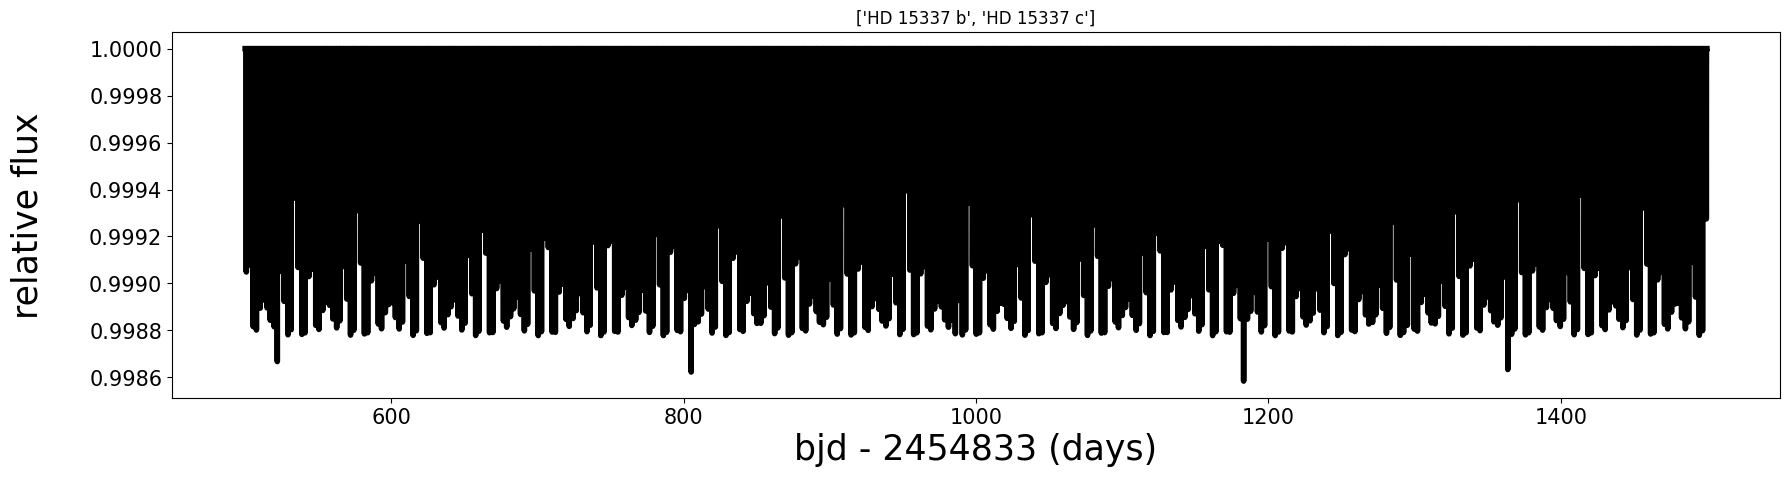

22.0491 3583.345000000205 0.11 10.924709 160.5 3.141592653589793 0.86 0.6 0.2 0.027
34.543589999999995 2597.8300000000745 0.04 21.583298 247.9 3.141592653589793 0.9 0.6 0.2 0.035
['HD 15906 b', 'HD 15906 c']


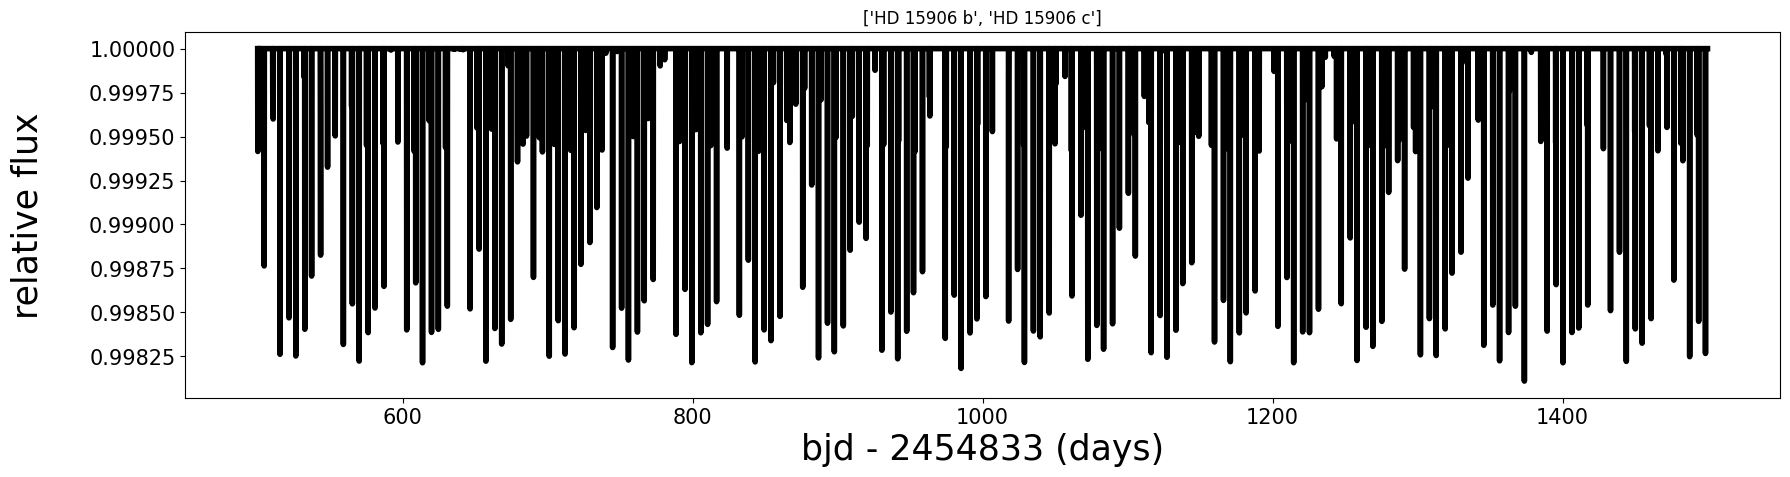

7.1855567 4664.910000000149 0.039 2.76953 57.0 3.141592653589793 0.665 0.6 0.2 0.02586
11.6345751 4657.3650000002235 0.038 5.70588 -25.0 3.141592653589793 0.89 0.6 0.2 0.032
['HD 260655 b', 'HD 260655 c']


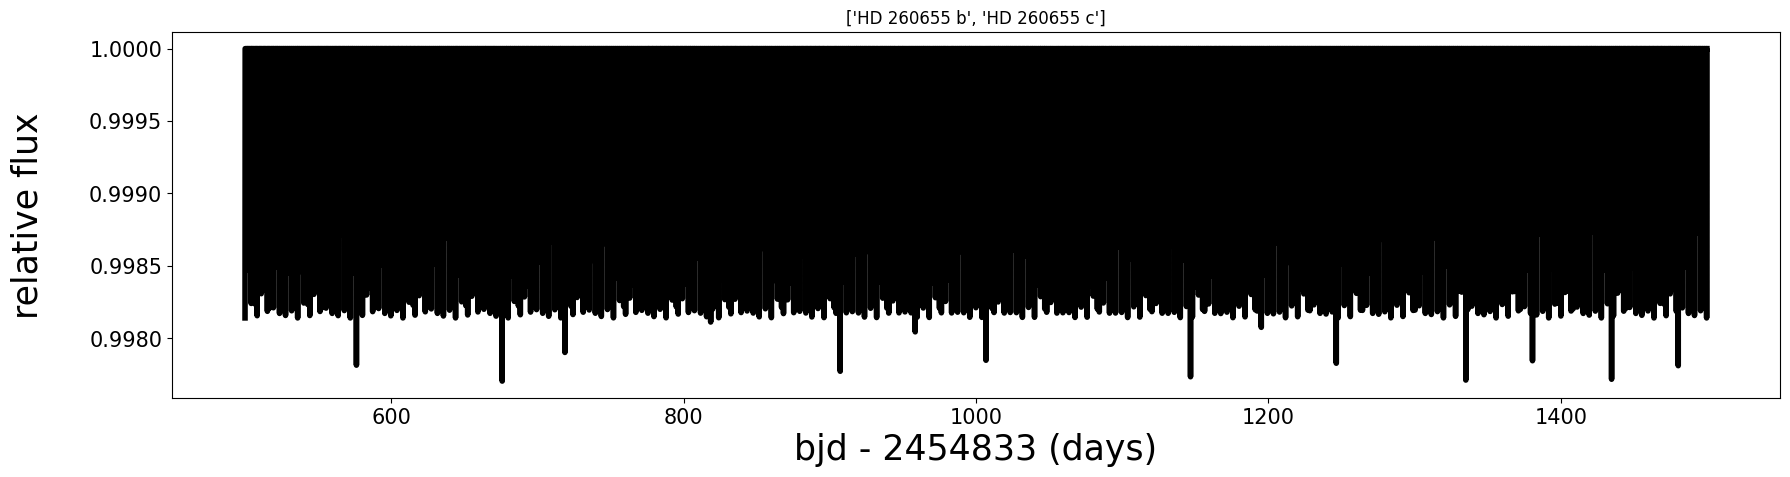

14.687150500000001 3870.2340000001714 0.294 6.3980661 130.0 3.141592653589793 0.134 0.6 0.2 0.03803
30.427758 4399.168000000063 0.08 18.87974 -41.6 3.141592653589793 0.21 0.6 0.2 0.03368
['HD 73583 b', 'HD 73583 c']


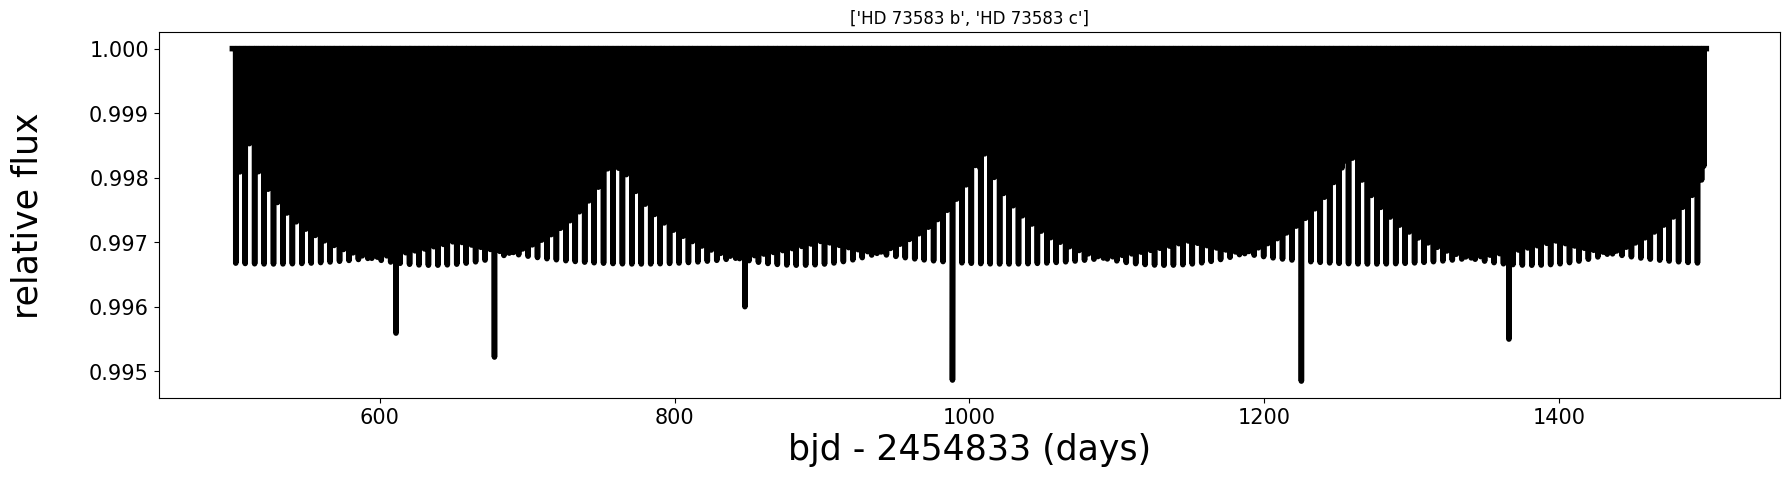

16.9018601 3492.597000000067 0.17 7.610303 -10.0 3.141592653589793 0.656 0.6 0.2 0.0242
25.6725021 3504.055999999866 0.17 14.245648 -70.0 3.141592653589793 0.614 0.6 0.2 0.0303
['HIP 113103 b', 'HIP 113103 c']


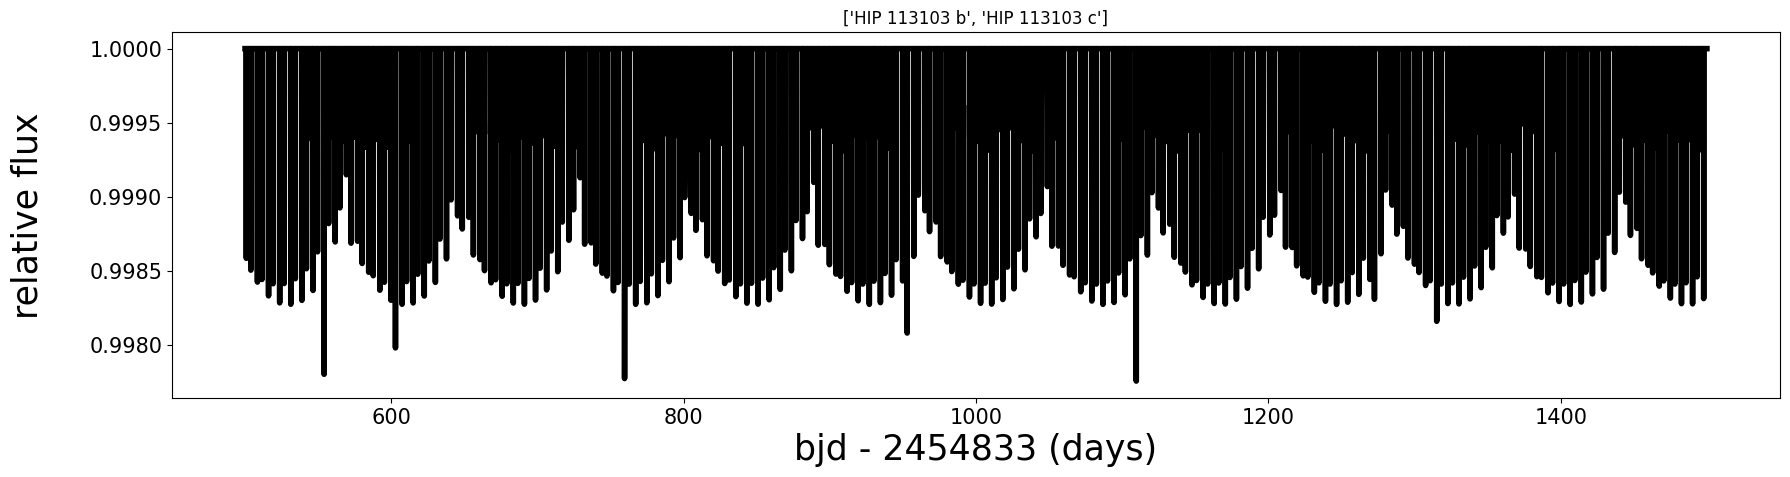

9.358618 2385.7370000001974 0.02 3.2253993 170.0 3.141592653589793 0.25 0.6 0.2 0.02346
16.218338 2389.9300000001676 0.03 7.3744897 170.0 3.141592653589793 0.49 0.6 0.2 0.03846
['K2-199 b', 'K2-199 c']


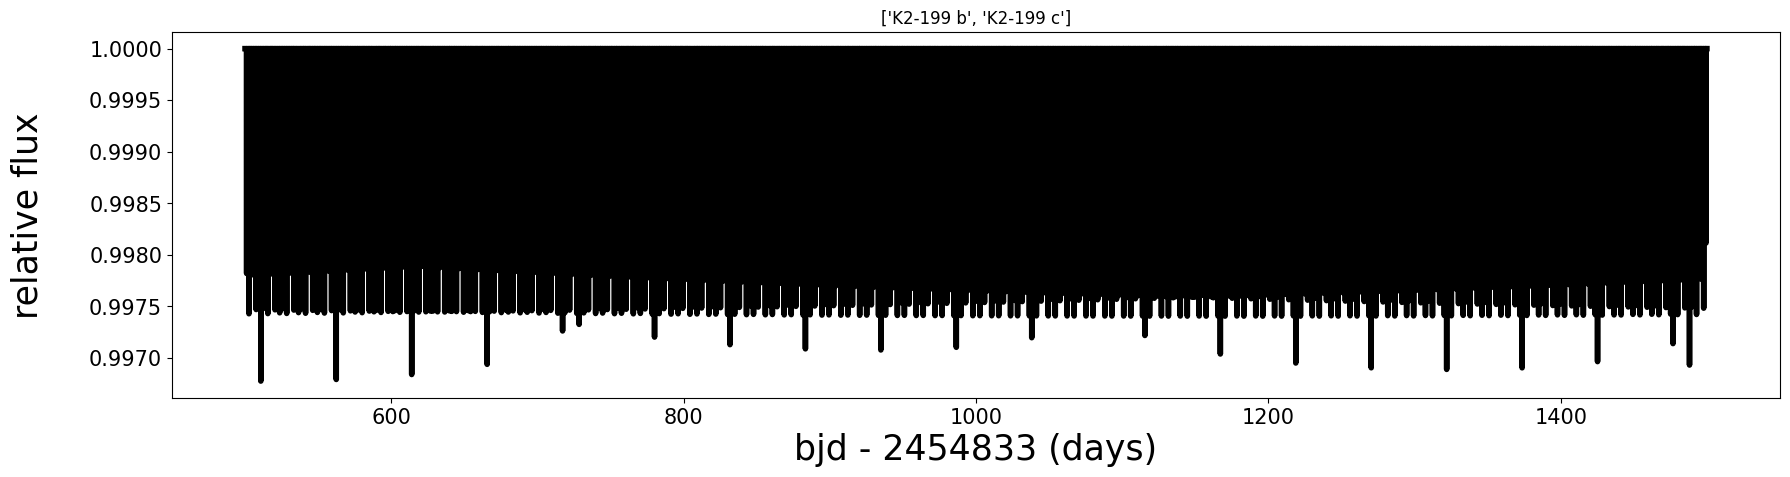

18.986725 1980.4180000000633 0.06 10.05429 180.0 3.141592653589793 0.21 0.6 0.2 0.03477
51.104914 1993.2269999999553 0.045 44.5705 351.0 3.141592653589793 0.359 0.6 0.2 0.02495
['K2-3 b', 'K2-3 d']


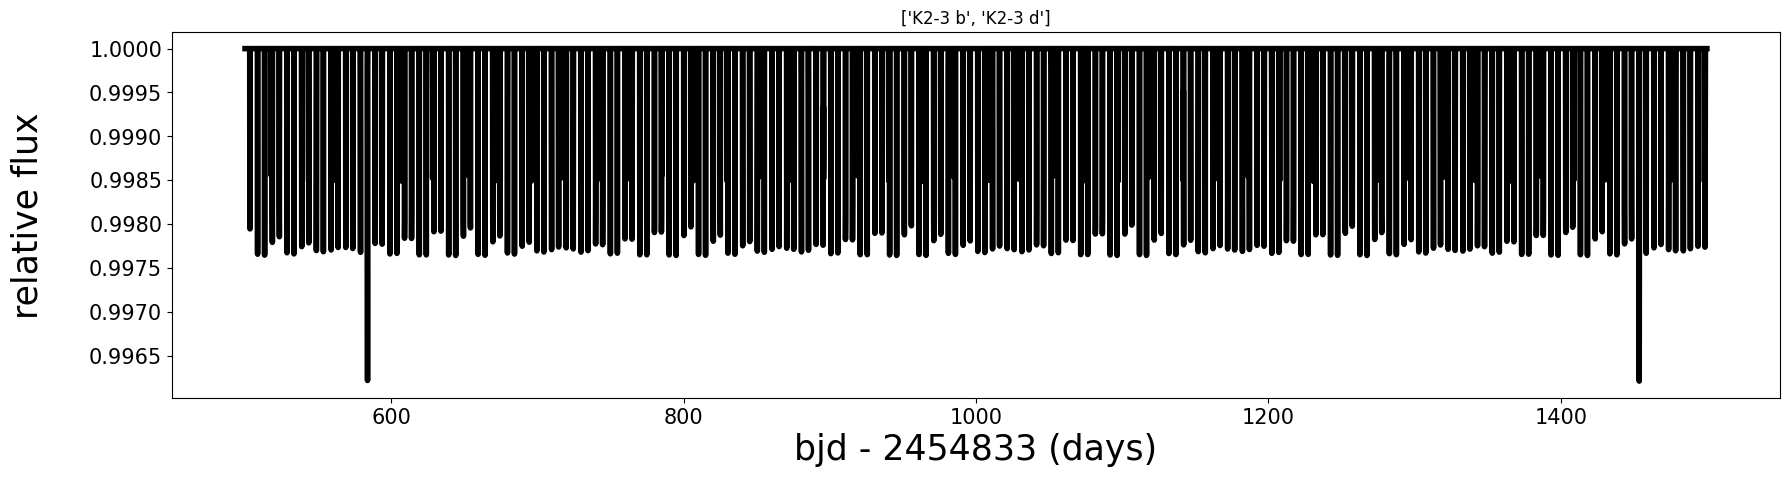

11.612525999999999 255.7799999997951 0.086 3.4876812 231.0 3.141592653589793 0.52 0.6 0.2 0.03401
16.757316000000003 132.48600000003353 0.0 6.02976 90.0 3.141592653589793 0.75 0.6 0.2 0.00732
['Kepler-101 b', 'Kepler-101 c']


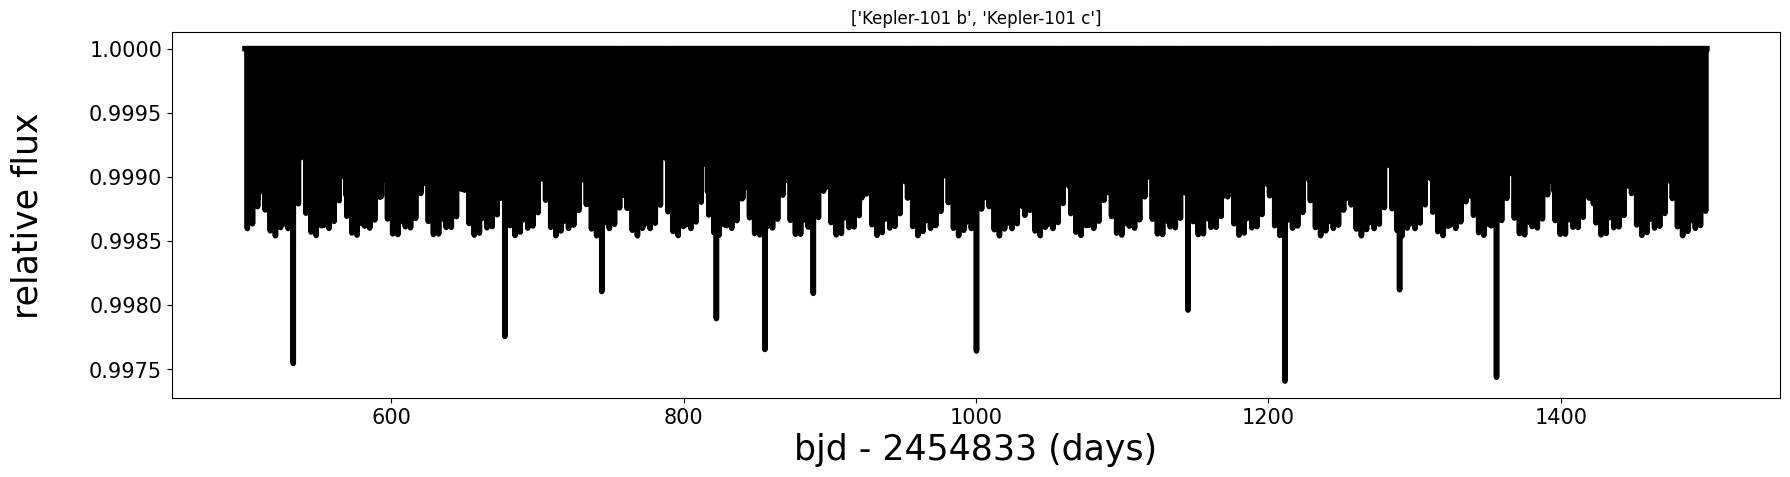

35.401055 145.8220000001602 0.0493 18.7959228 254.3 3.141592653589793 0.446 0.6 0.2 0.0463
68.695196 135.63200000021607 0.0323 50.790391 305.0 3.141592653589793 0.268 0.6 0.2 0.07052
['Kepler-117 b', 'Kepler-117 c']


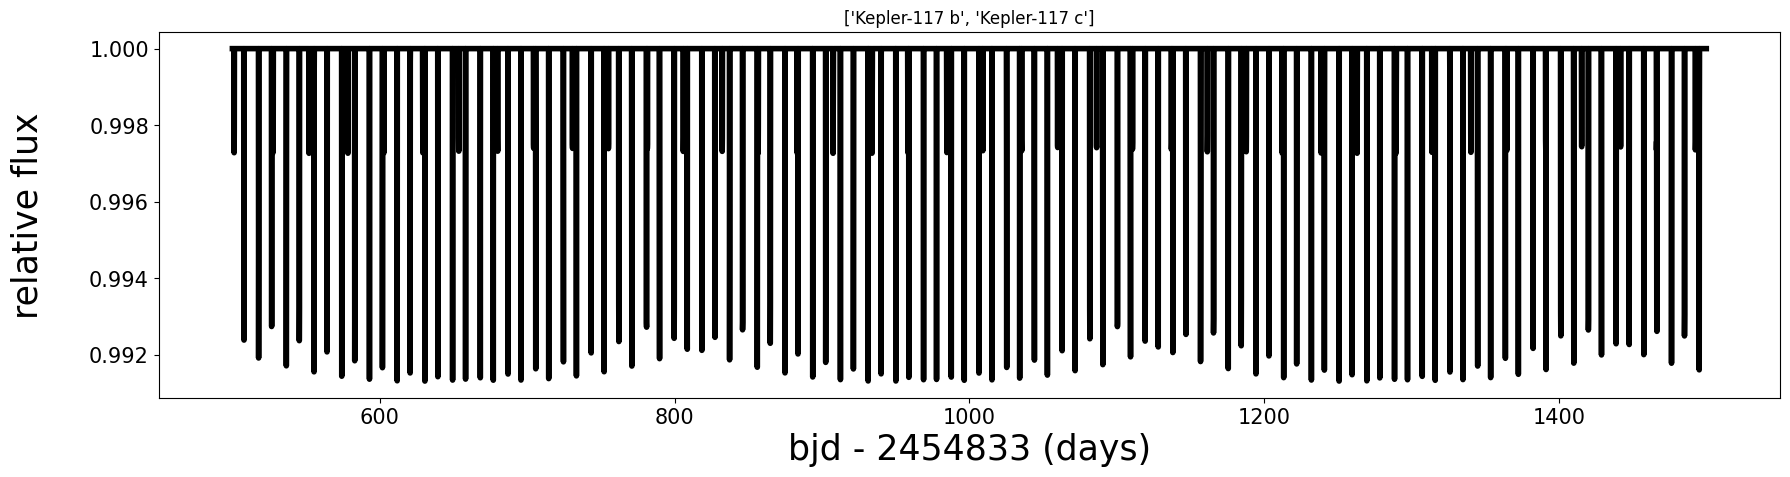

184.47747 238.8139999997802 0.401 217.83184 -75.28 3.141592653589793 0.169 0.6 0.2 0.08835
24.425503 124.05500000016764 0.32 10.514181 0.0 3.141592653589793 0.47 0.6 0.2 0.00836
['Kepler-1514 b', 'Kepler-1514 c']


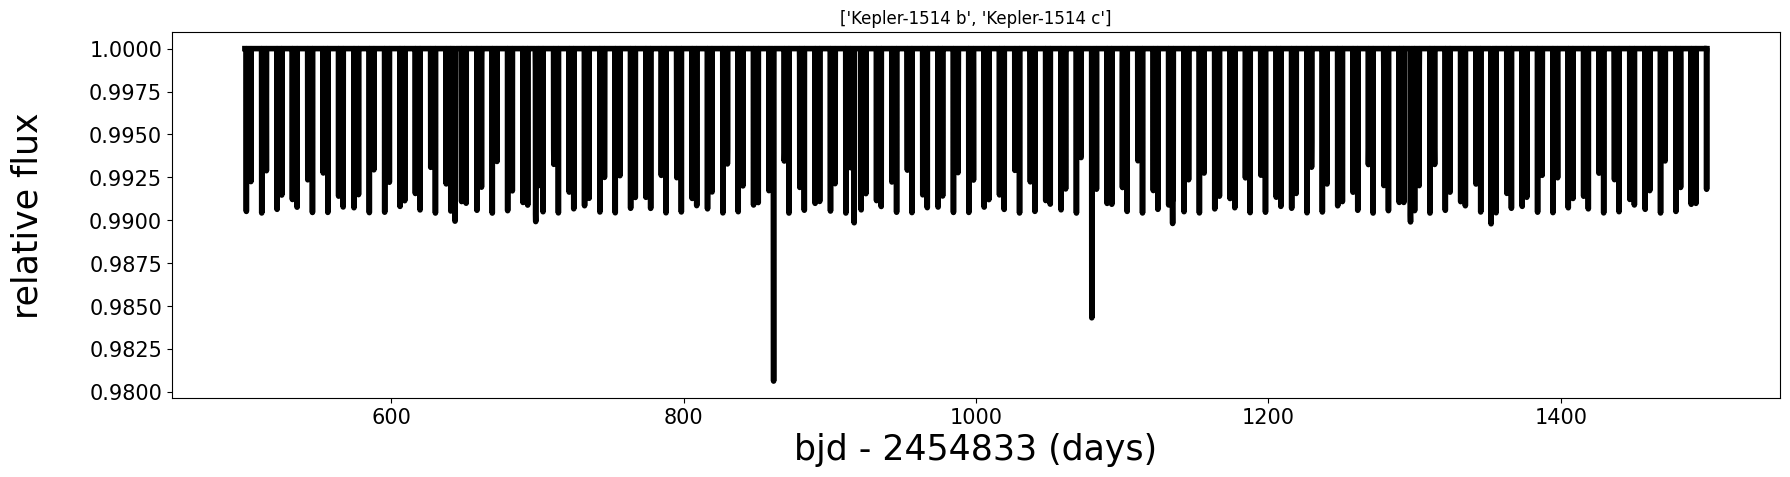

35.03357 144.5120000001043 0.0609 19.23891 357.0 3.141592653589793 0.59 0.6 0.2 0.0776
55.612730000000006 135.839999999851 0.06691 38.9853 167.5 3.141592653589793 0.74 0.6 0.2 0.0756
['Kepler-9 b', 'Kepler-9 c']


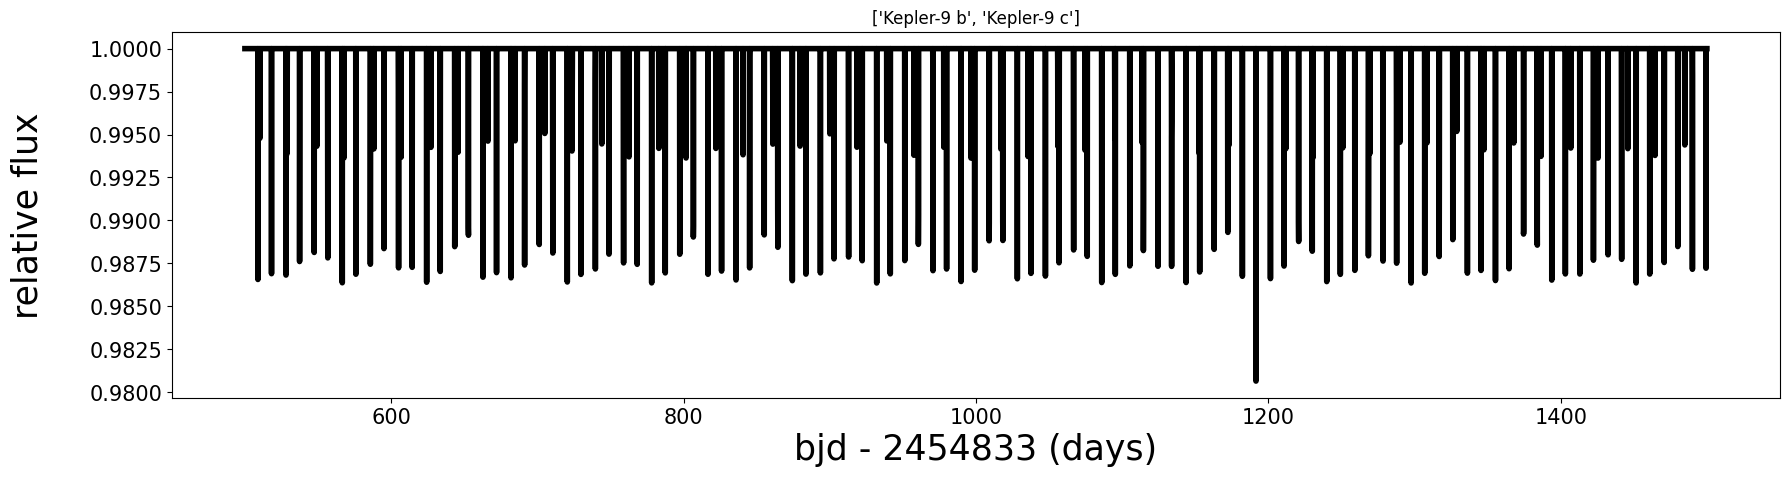

25.23397 3888.9419999998063 0.59 10.98462 163.6 3.141592653589793 0.61 0.6 0.2 0.014
61.00251 3917.8829999999143 0.09 40.74976 105.5 3.141592653589793 0.76 0.6 0.2 0.077
['TOI-1670 b', 'TOI-1670 c']


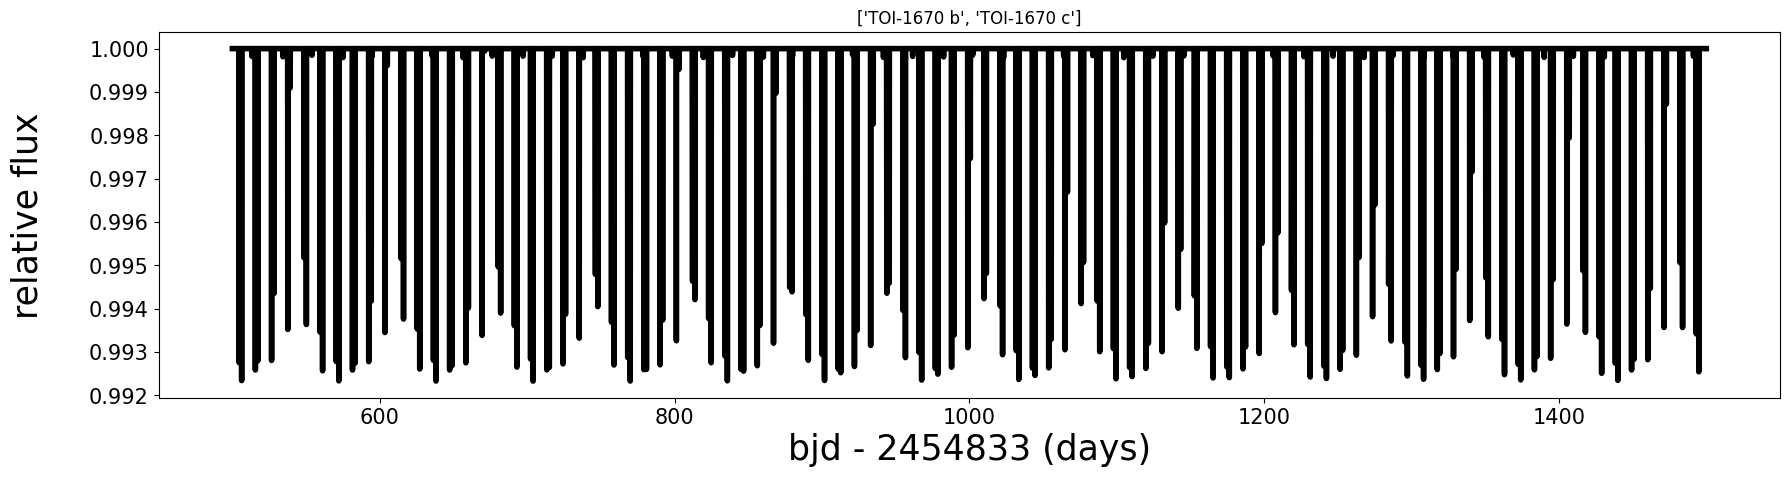

24.743990000000004 4813.703999999911 0.12 17.664872 -17.0 3.141592653589793 0.3 0.6 0.2 0.0263
33.808620000000005 4829.1460000001825 0.13 28.1722 -55.0 3.141592653589793 0.24 0.6 0.2 0.0282
['TOI-2095 b', 'TOI-2095 c']


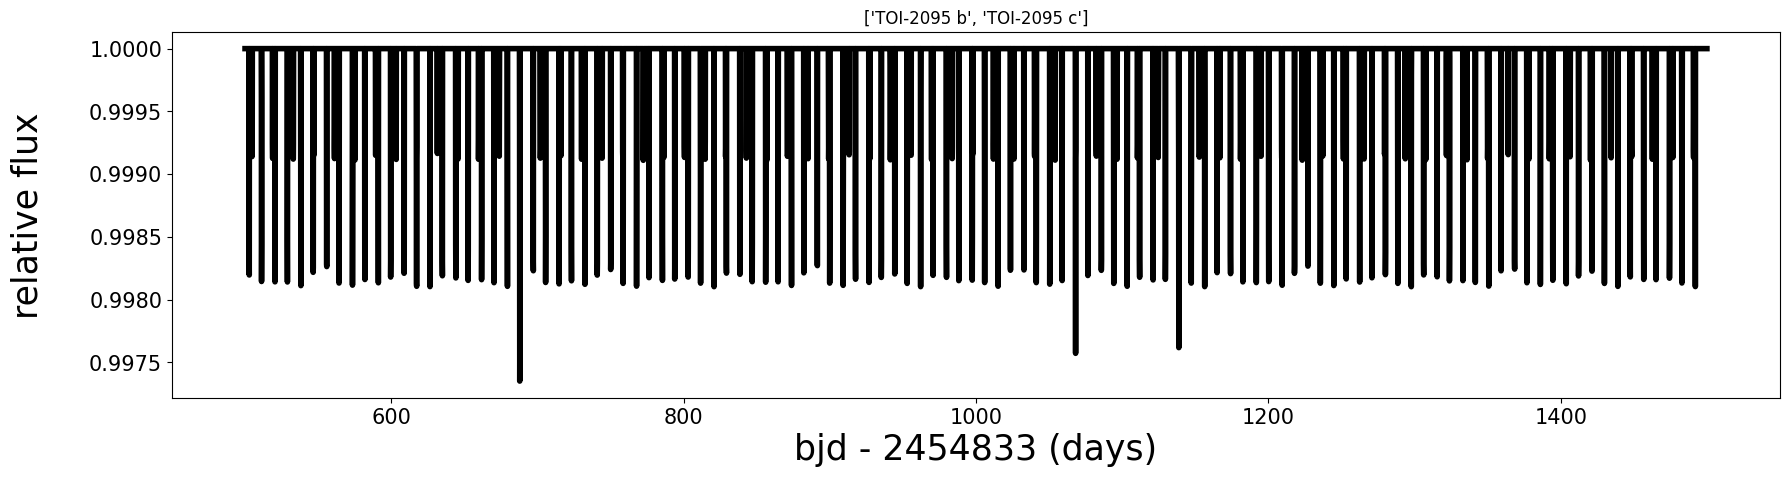

15.9708981 4794.038999999873 0.0 5.4588385 0.0 3.141592653589793 0.24 0.6 0.2 0.03498
35.254061 4780.743999999948 0.0 17.8999 0.0 3.141592653589793 0.34 0.6 0.2 0.02854
['TOI-5126 b', 'TOI-5126 c']


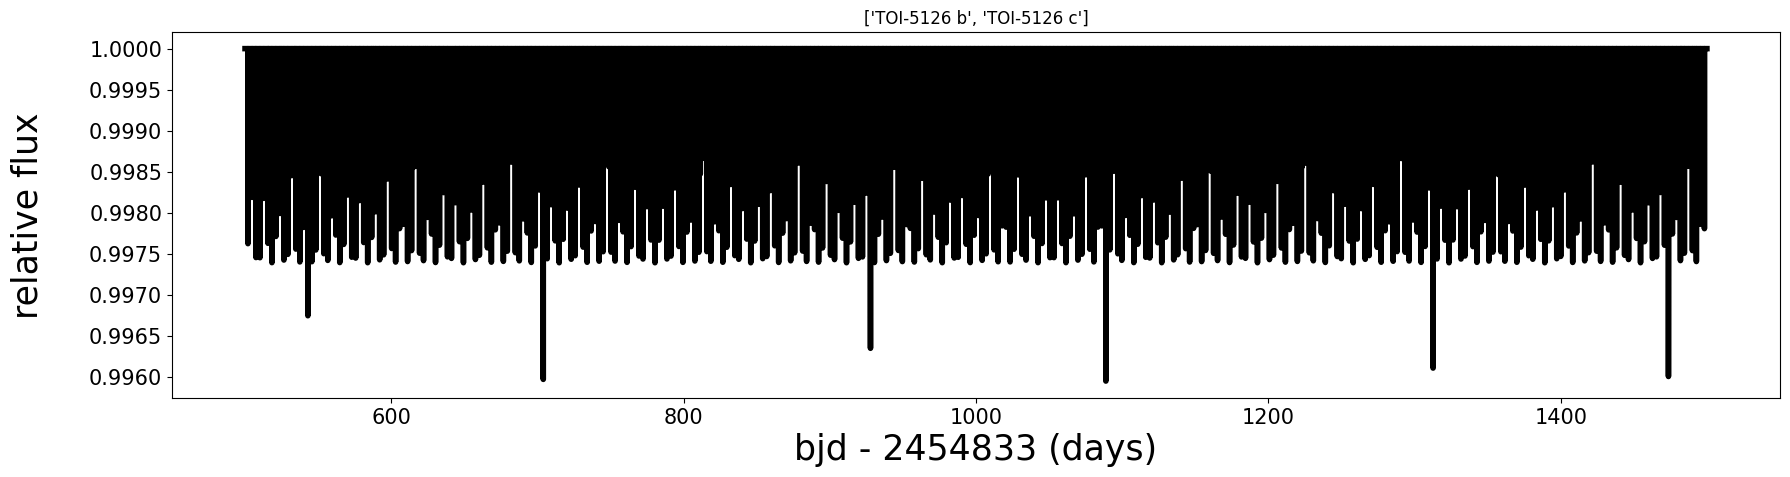

24.009020000000003 4783.492000000086 0.13 10.590547 92.0 3.141592653589793 0.272 0.6 0.2 0.0899
13.964430000000002 4795.617999999784 0.14 4.77271 172.0 3.141592653589793 0.34 0.6 0.2 0.0308
['TOI-5398 b', 'TOI-5398 c']


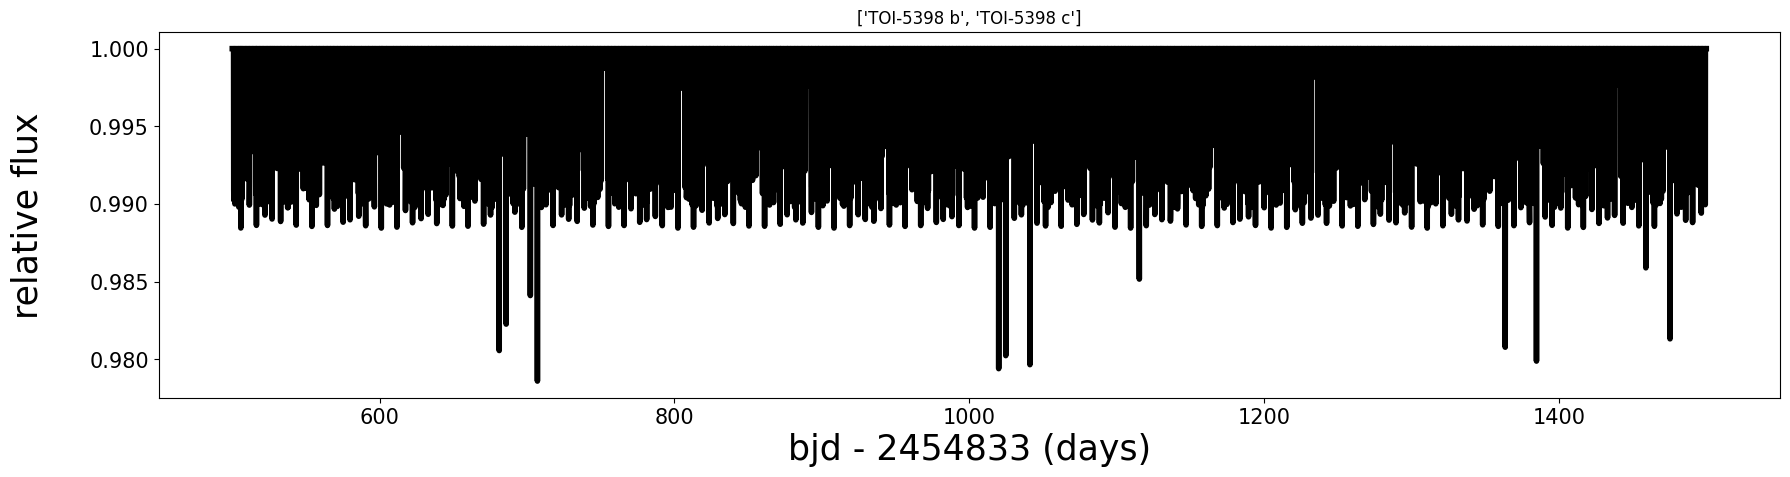

15.973348 3738.4169999998994 0.06 8.24661 -67.0 3.141592653589793 0.25 0.6 0.2 0.0316
24.499000000000002 3739.600000000093 0.04 15.6653 -11.0 3.141592653589793 0.27 0.6 0.2 0.0344
['TOI-776 b', 'TOI-776 c']


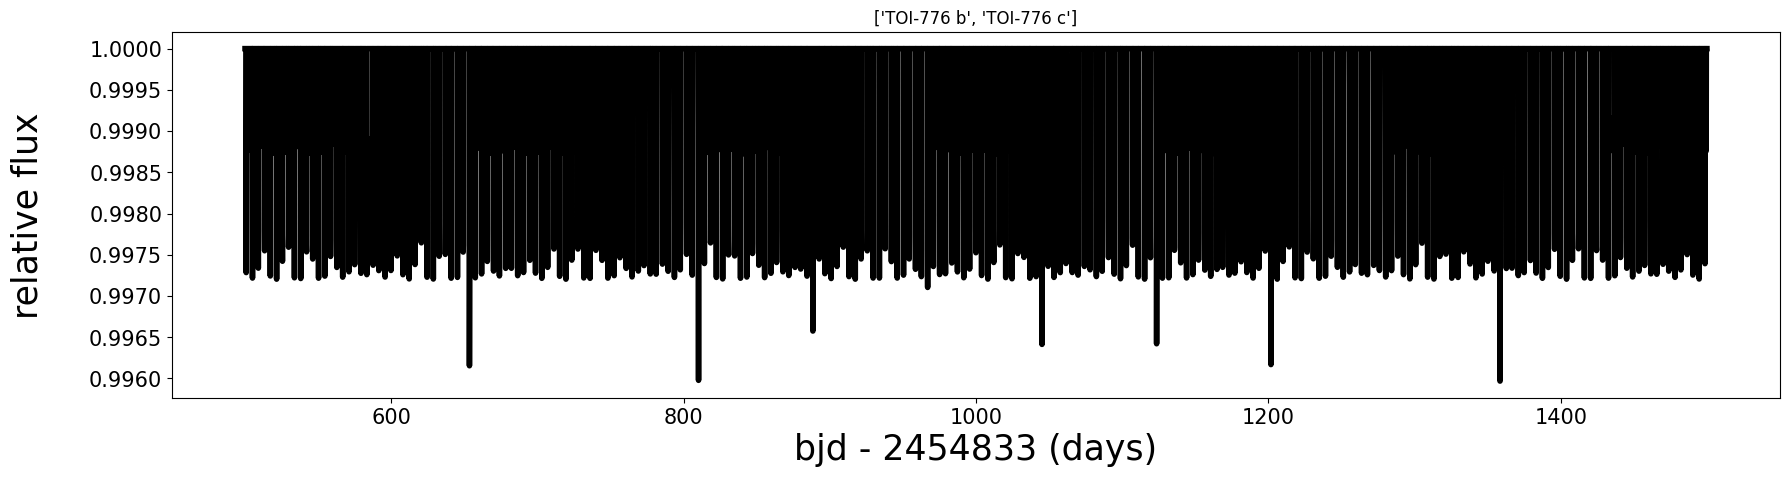

16.414330000000003 4504.608000000007 0.07 7.133514 -5.0 3.141592653589793 0.16 0.6 0.2 0.122
4.458818 3764.5759999998845 0.13 1.011534 -53.0 3.141592653589793 0.28 0.6 0.2 0.023
['WASP-132 b', 'WASP-132 c']


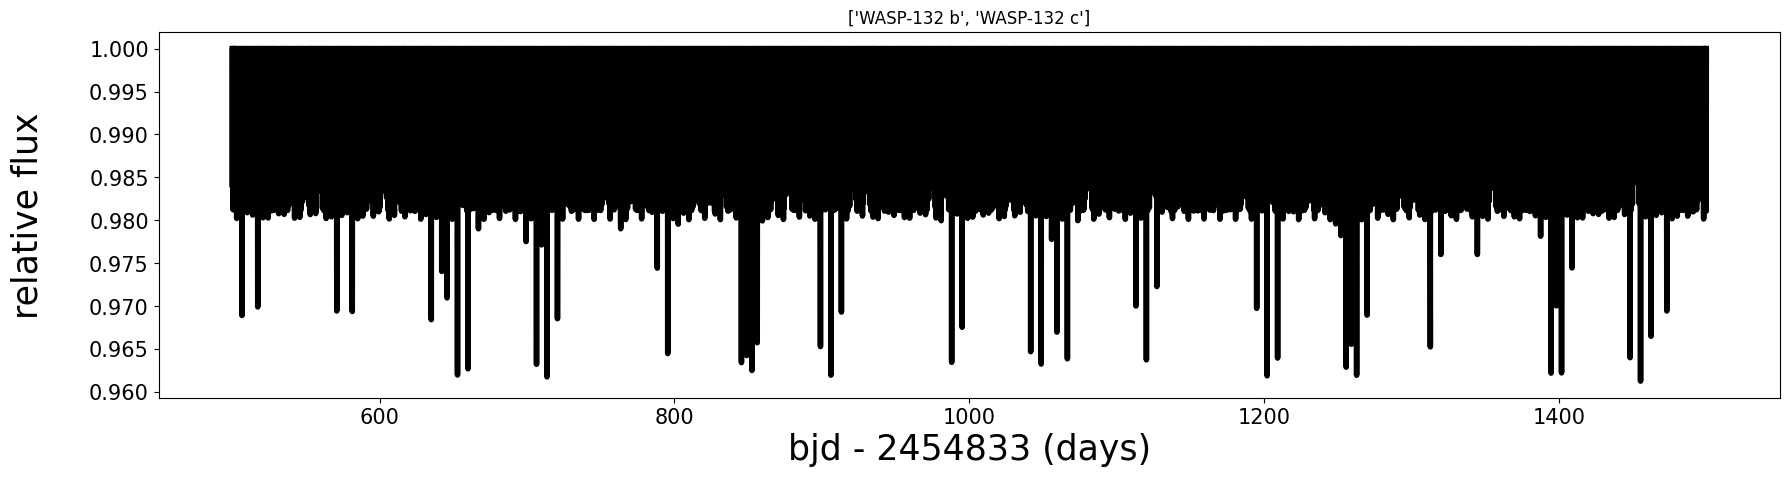

11.490031 3739.1129999998957 0.2 3.79523 190.0 3.141592653589793 0.38 0.6 0.2 0.01638
15.948849000000003 3739.3950000000186 0.18 6.2037 210.0 3.141592653589793 0.33 0.6 0.2 0.02134
['HD 108236 b', 'HD 108236 c']


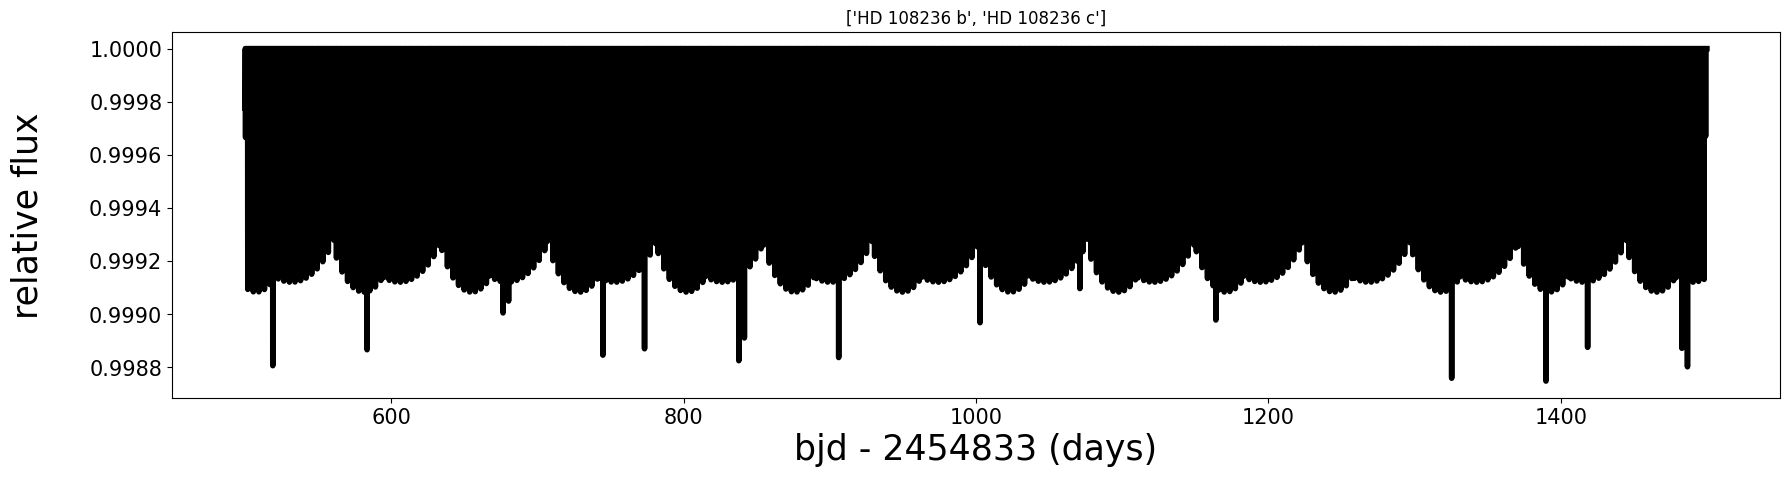

11.490031 3739.1129999998957 0.2 3.79523 190.0 3.141592653589793 0.38 0.6 0.2 0.01638
27.708369 3738.336999999825 0.17 14.17555 190.0 3.141592653589793 0.35 0.6 0.2 0.02805
['HD 108236 b', 'HD 108236 d']


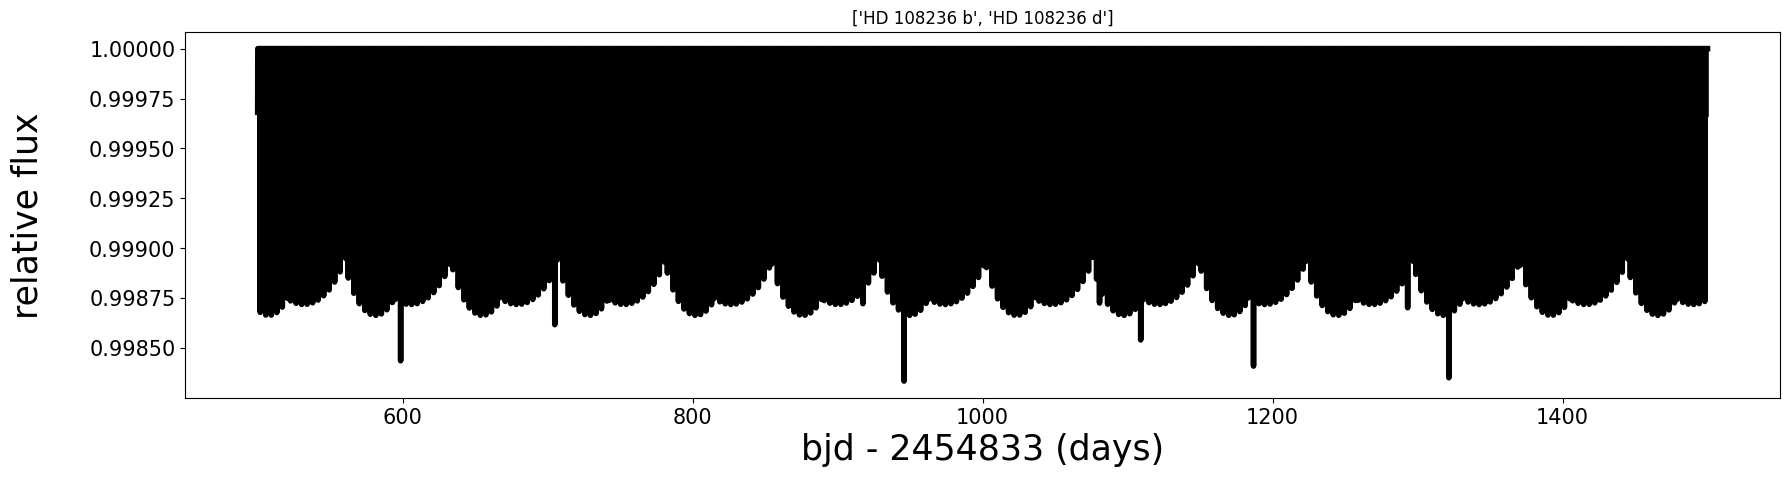

11.490031 3739.1129999998957 0.2 3.79523 190.0 3.141592653589793 0.38 0.6 0.2 0.01638
34.29860000000001 3753.56799999997 0.2 19.5917 170.0 3.141592653589793 0.36 0.6 0.2 0.0323
['HD 108236 b', 'HD 108236 e']


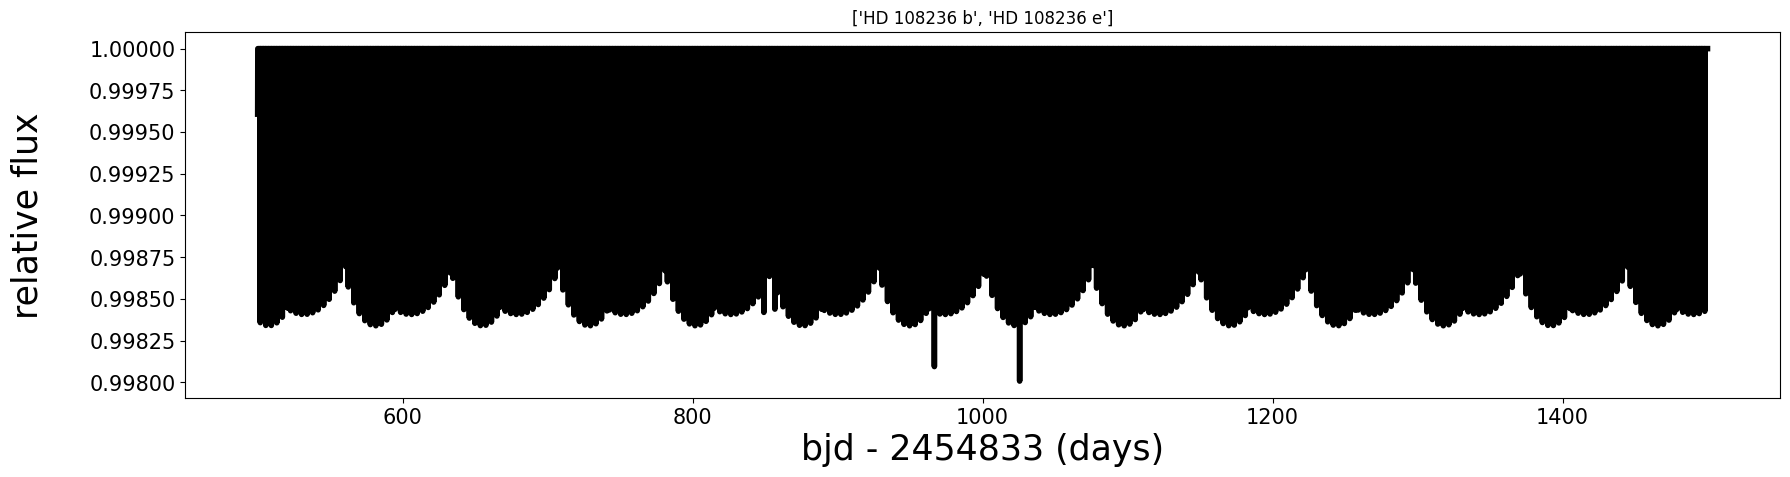

15.948849000000003 3739.3950000000186 0.18 6.2037 210.0 3.141592653589793 0.33 0.6 0.2 0.02134
27.708369 3738.336999999825 0.17 14.17555 190.0 3.141592653589793 0.35 0.6 0.2 0.02805
['HD 108236 c', 'HD 108236 d']


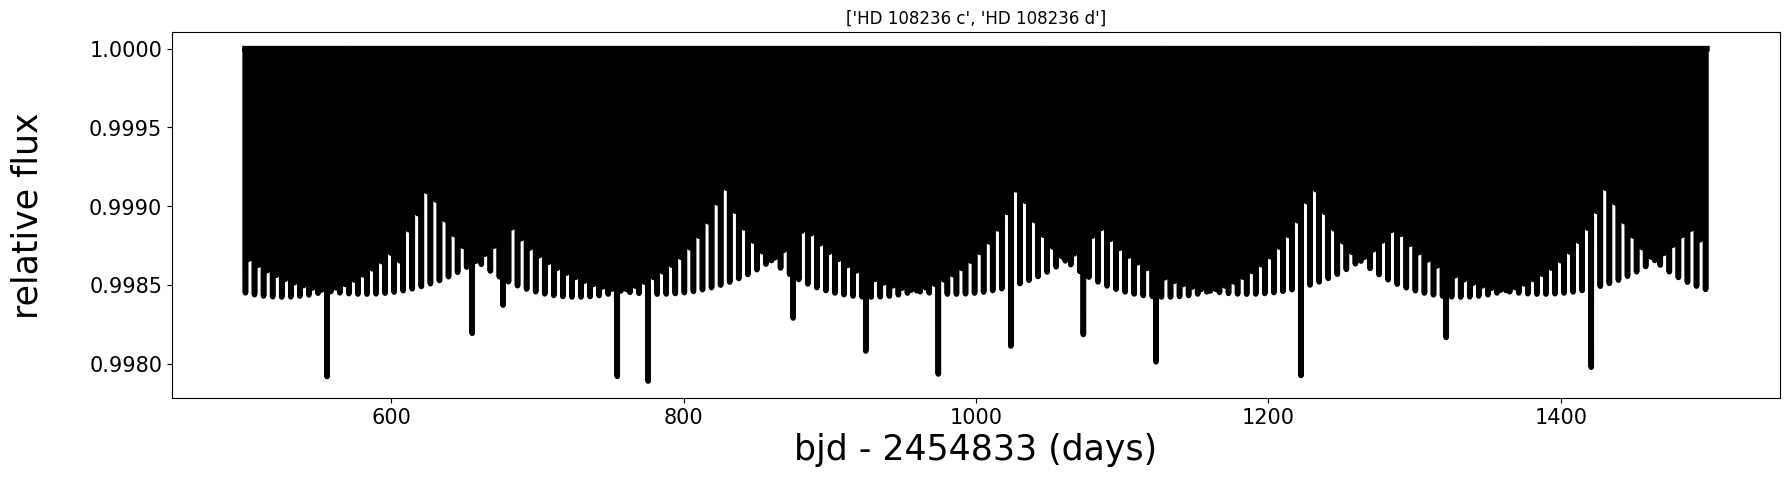

15.948849000000003 3739.3950000000186 0.18 6.2037 210.0 3.141592653589793 0.33 0.6 0.2 0.02134
34.29860000000001 3753.56799999997 0.2 19.5917 170.0 3.141592653589793 0.36 0.6 0.2 0.0323
['HD 108236 c', 'HD 108236 e']


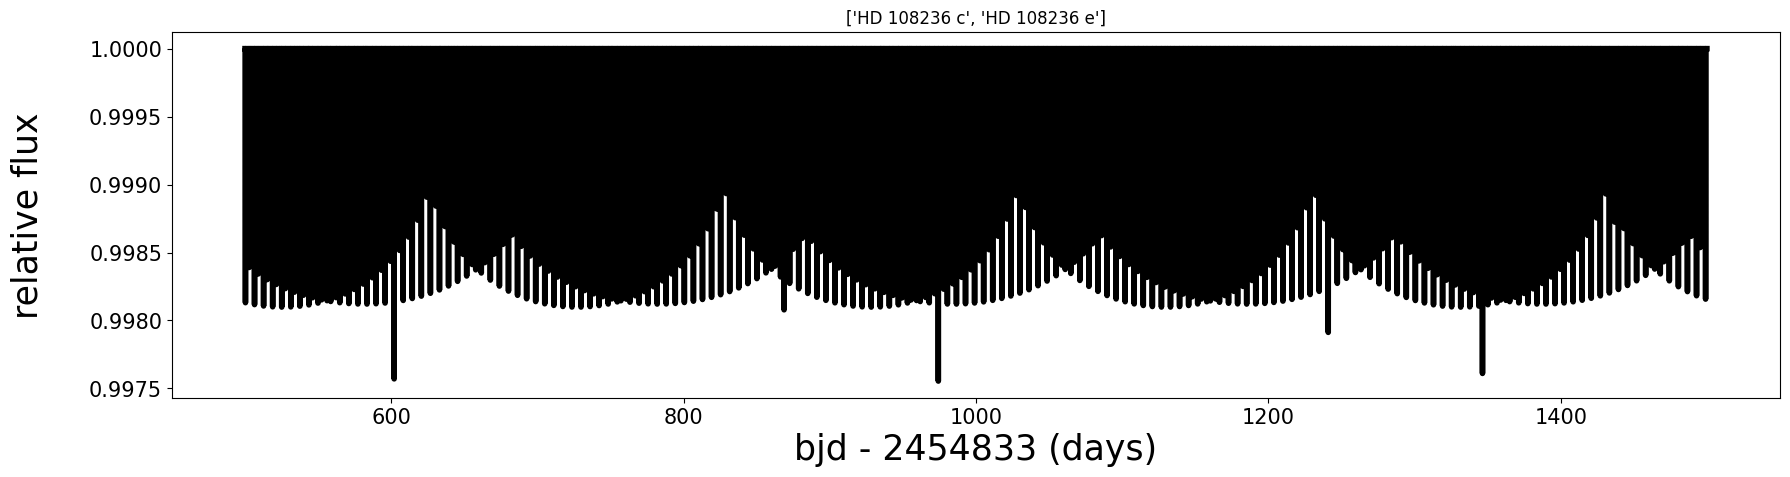

27.708369 3738.336999999825 0.17 14.17555 190.0 3.141592653589793 0.35 0.6 0.2 0.02805
34.29860000000001 3753.56799999997 0.2 19.5917 170.0 3.141592653589793 0.36 0.6 0.2 0.0323
['HD 108236 d', 'HD 108236 e']


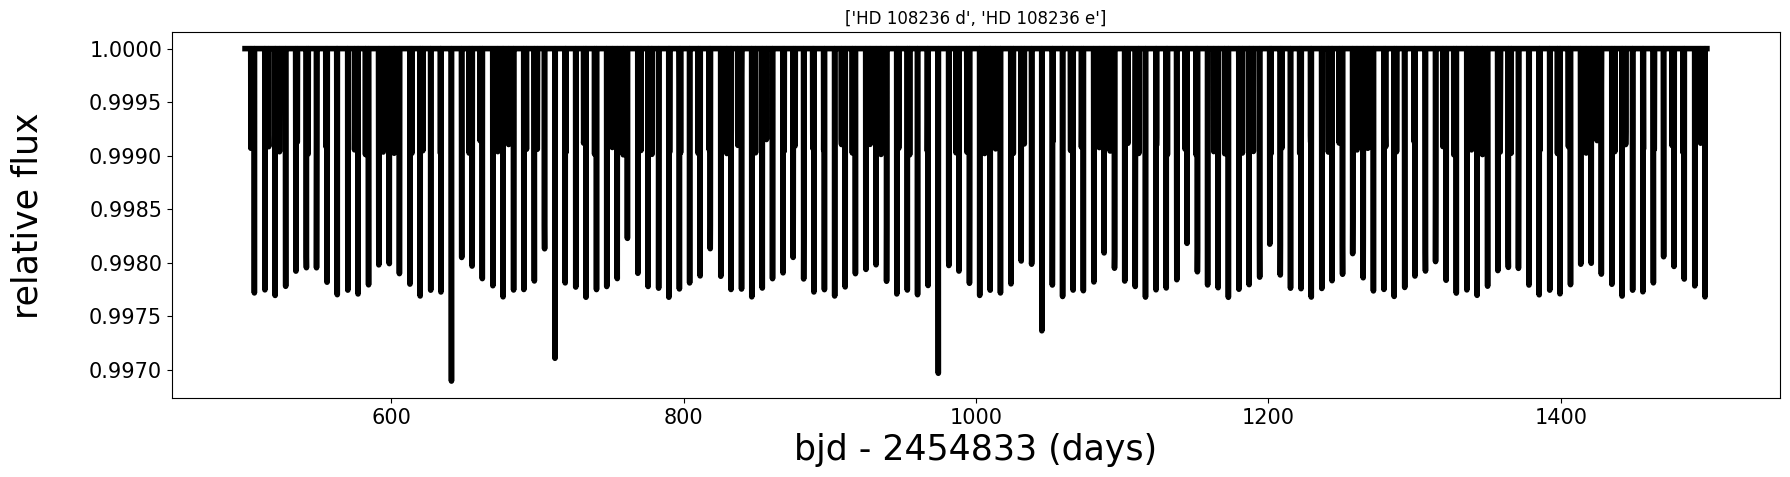

19.697196 4610.541999999899 0.031 8.8803256 5.0 3.141592653589793 0.61 0.6 0.2 0.03319
42.922248 4607.5490000001155 0.034 28.579743 -90.0 3.141592653589793 0.63 0.6 0.2 0.03118
['HD 191939 b', 'HD 191939 c']


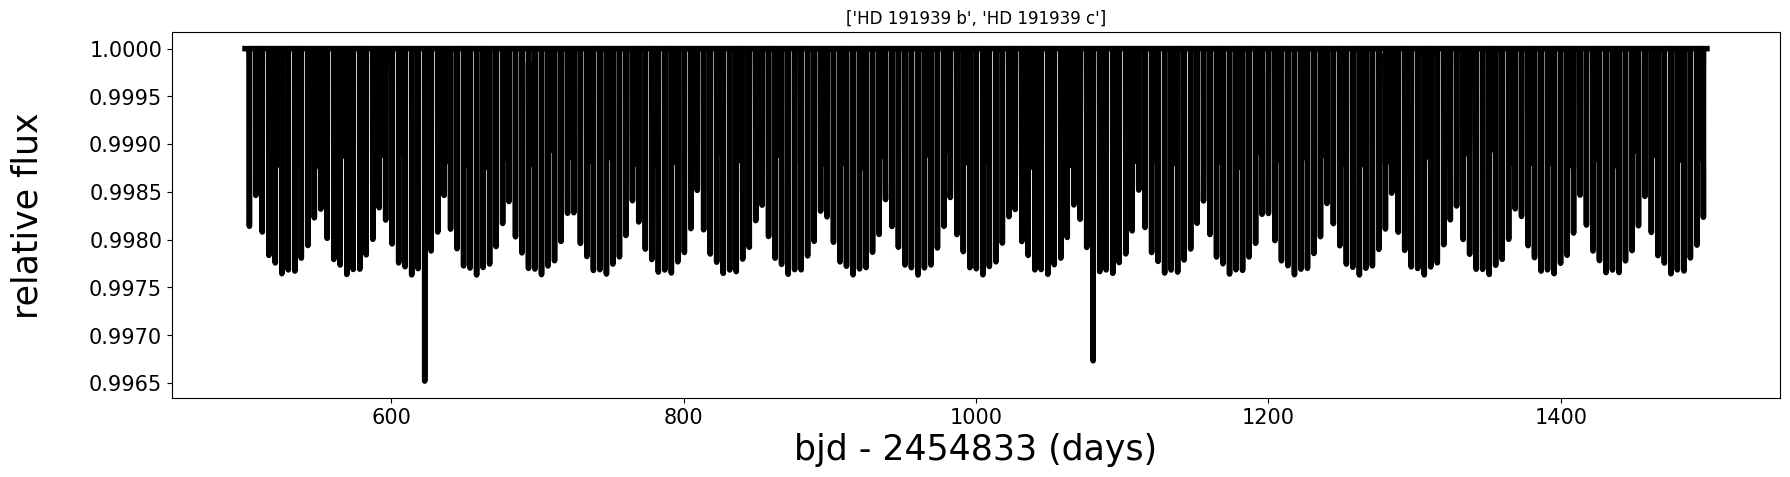

19.697196 4610.541999999899 0.031 8.8803256 5.0 3.141592653589793 0.61 0.6 0.2 0.03319
52.231868 4600.905999999959 0.031 38.353037 15.0 3.141592653589793 0.44 0.6 0.2 0.02916
['HD 191939 b', 'HD 191939 d']


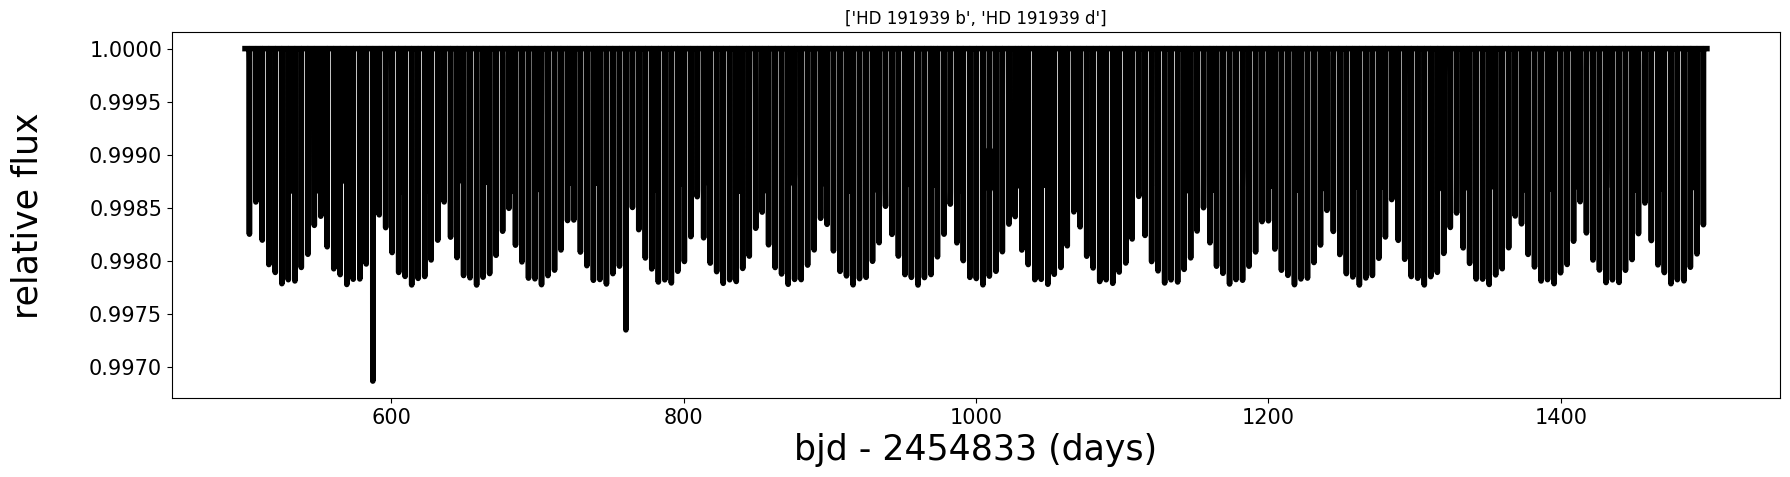

42.922248 4607.5490000001155 0.034 28.579743 -90.0 3.141592653589793 0.63 0.6 0.2 0.03118
52.231868 4600.905999999959 0.031 38.353037 15.0 3.141592653589793 0.44 0.6 0.2 0.02916
['HD 191939 c', 'HD 191939 d']


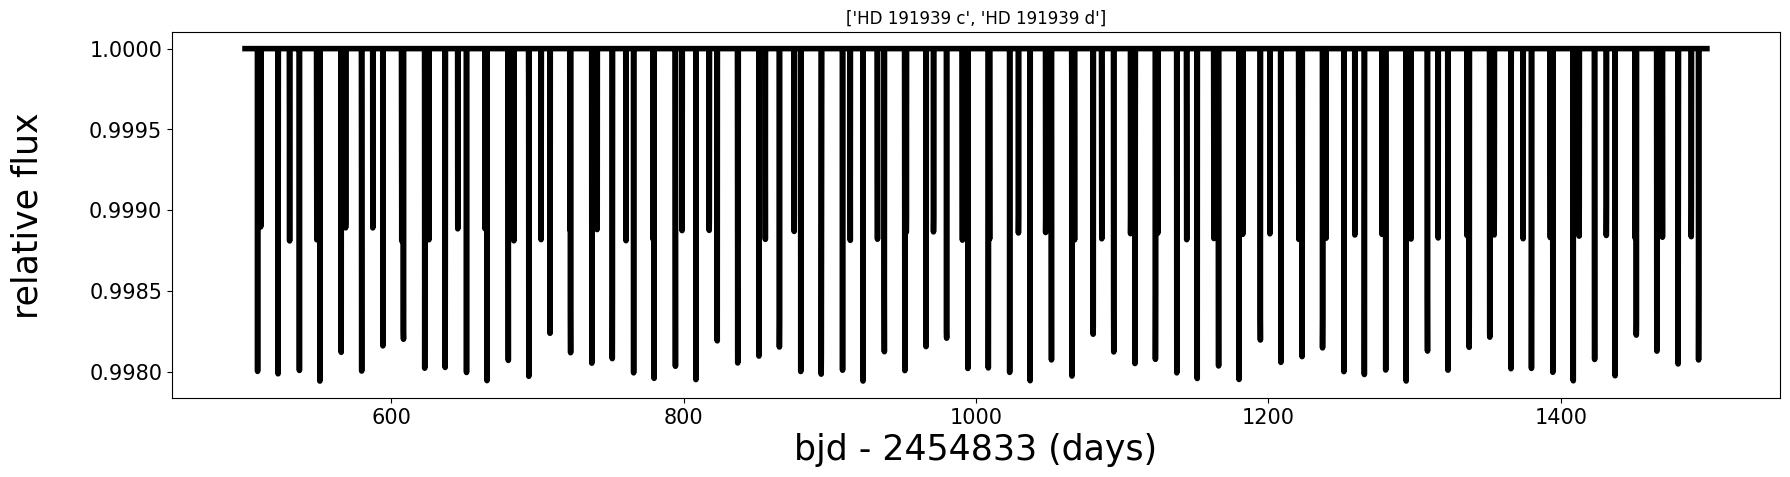

28.467838 3527.6639999998733 0.072 17.667087 114.0 3.141592653589793 0.69 0.6 0.2 0.02597
40.325354 3537.1039999998175 0.063 29.79749 2.0 3.141592653589793 0.785 0.6 0.2 0.0243
['HD 23472 b', 'HD 23472 c']


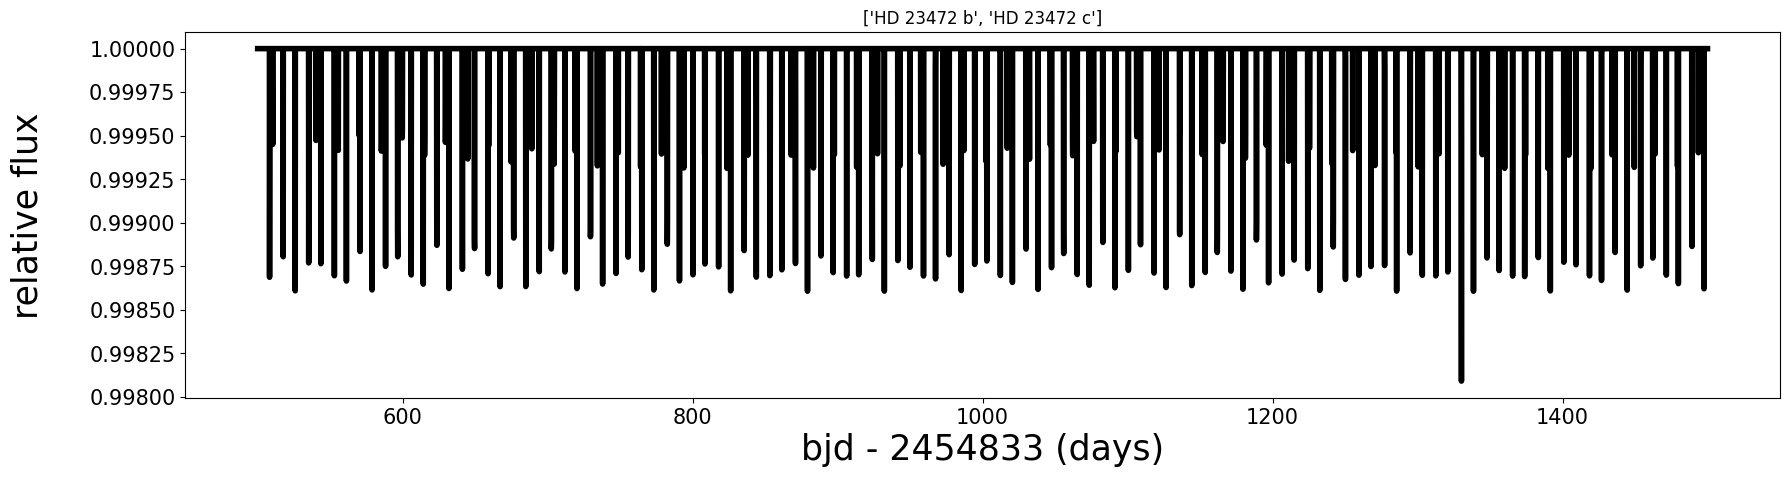

28.467838 3527.6639999998733 0.072 17.667087 114.0 3.141592653589793 0.69 0.6 0.2 0.02597
10.5296702 3524.839999999851 0.07 3.97664 19.0 3.141592653589793 0.47 0.6 0.2 0.00975
['HD 23472 b', 'HD 23472 d']


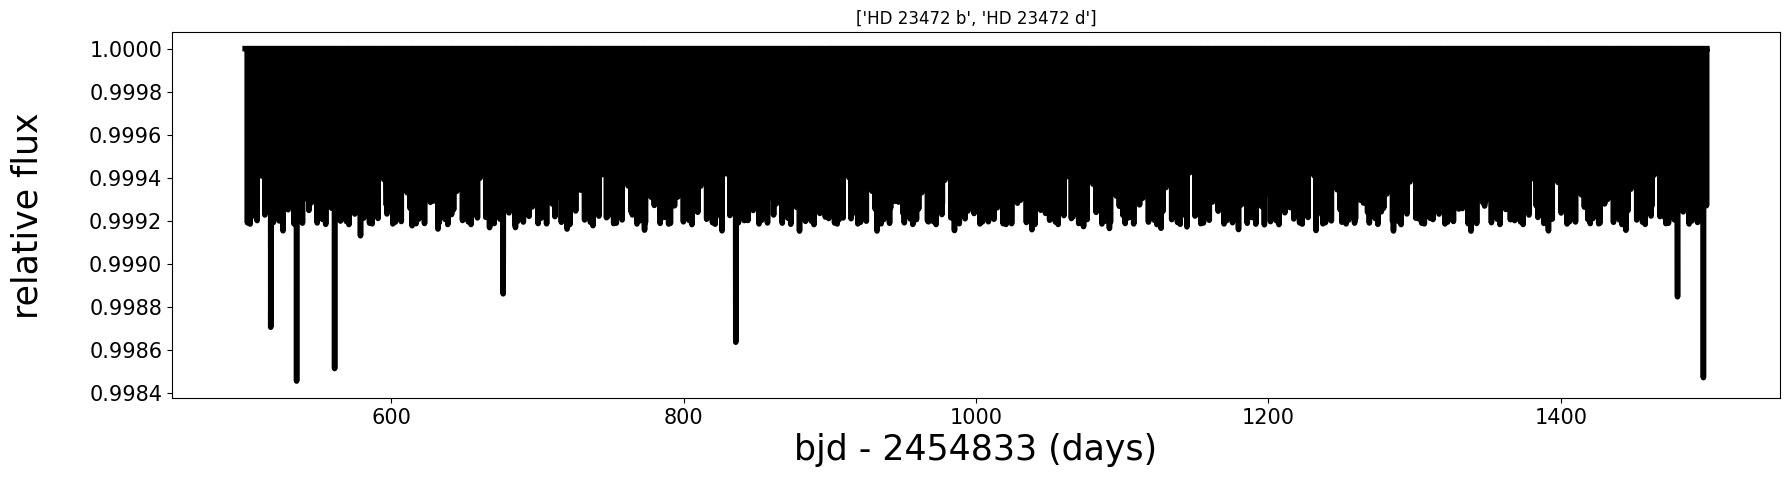

28.467838 3527.6639999998733 0.072 17.667087 114.0 3.141592653589793 0.69 0.6 0.2 0.02597
16.65932 3521.566000000108 0.07 7.90754 46.0 3.141592653589793 0.5 0.6 0.2 0.01065
['HD 23472 b', 'HD 23472 e']


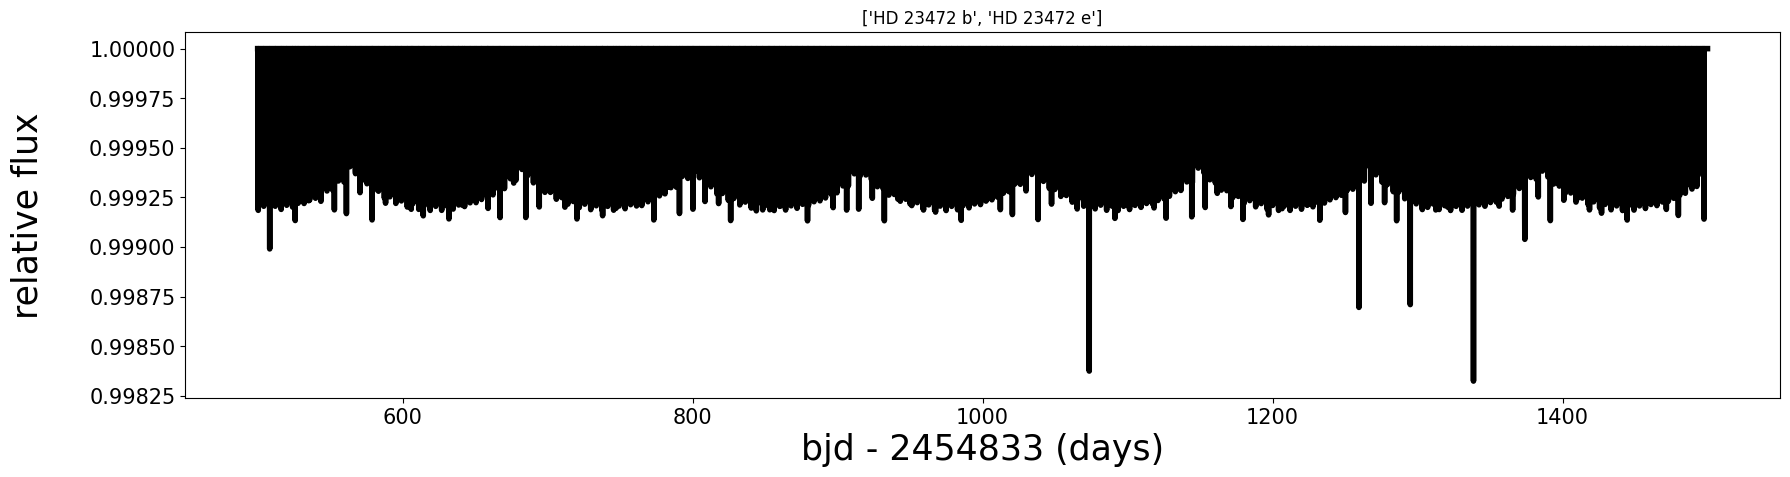

28.467838 3527.6639999998733 0.072 17.667087 114.0 3.141592653589793 0.69 0.6 0.2 0.02597
22.196094000000002 3527.0750000001863 0.07 12.1621839 4.0 3.141592653589793 0.57 0.6 0.2 0.01478
['HD 23472 b', 'HD 23472 f']


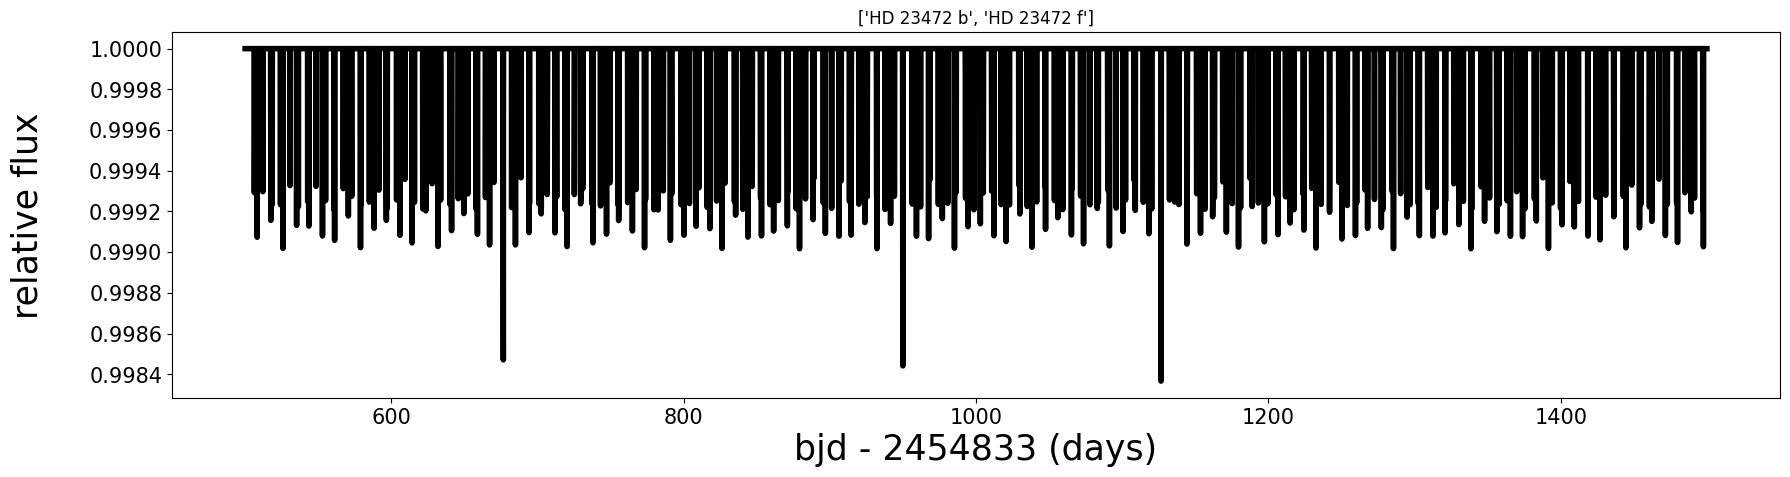

40.325354 3537.1039999998175 0.063 29.79749 2.0 3.141592653589793 0.785 0.6 0.2 0.0243
10.5296702 3524.839999999851 0.07 3.97664 19.0 3.141592653589793 0.47 0.6 0.2 0.00975
['HD 23472 c', 'HD 23472 d']


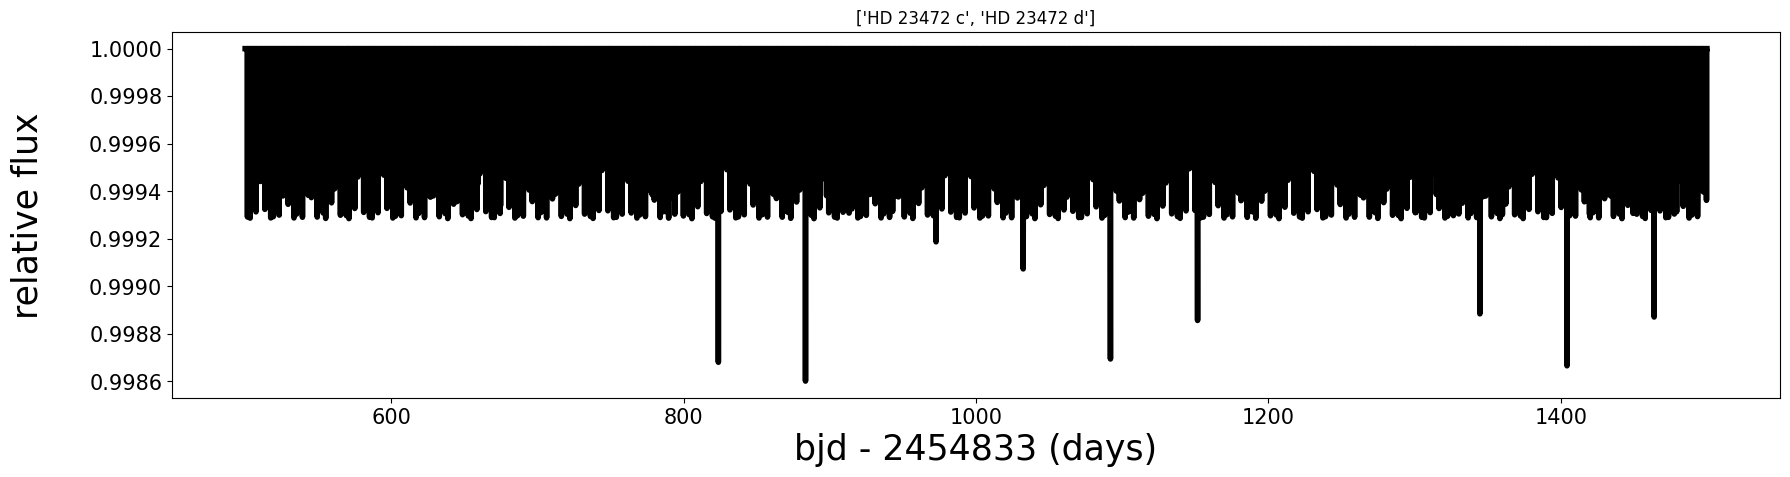

40.325354 3537.1039999998175 0.063 29.79749 2.0 3.141592653589793 0.785 0.6 0.2 0.0243
16.65932 3521.566000000108 0.07 7.90754 46.0 3.141592653589793 0.5 0.6 0.2 0.01065
['HD 23472 c', 'HD 23472 e']


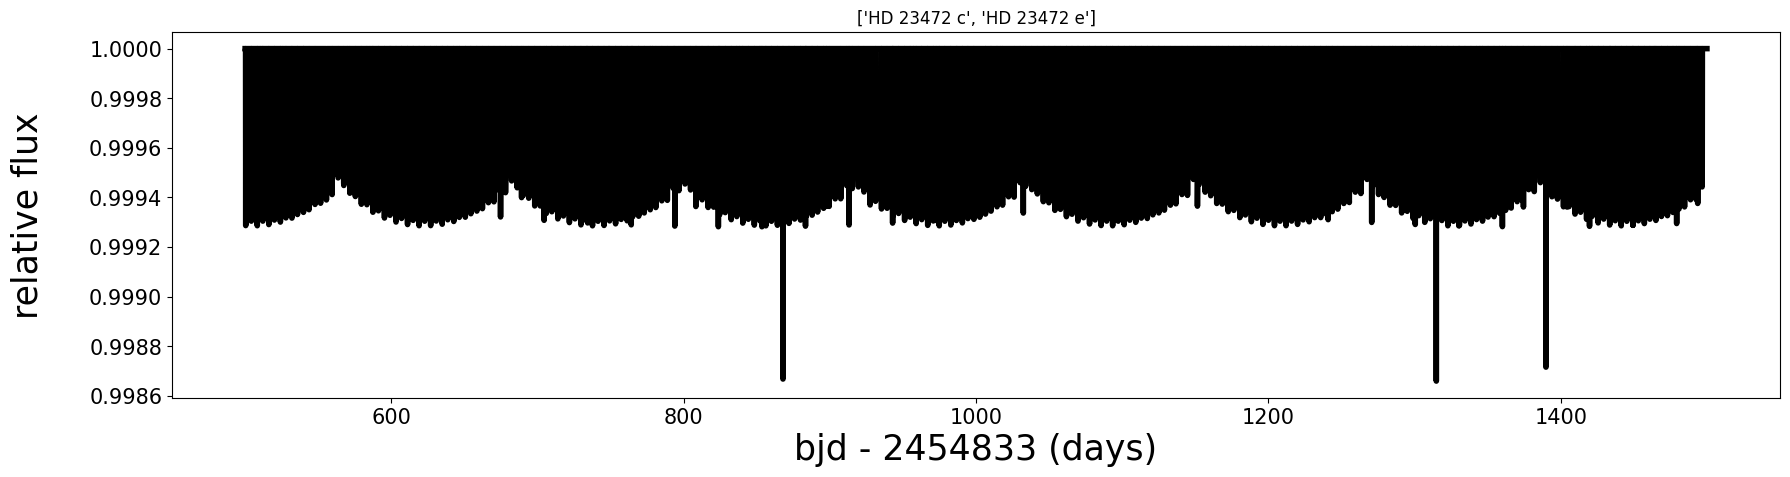

40.325354 3537.1039999998175 0.063 29.79749 2.0 3.141592653589793 0.785 0.6 0.2 0.0243
22.196094000000002 3527.0750000001863 0.07 12.1621839 4.0 3.141592653589793 0.57 0.6 0.2 0.01478
['HD 23472 c', 'HD 23472 f']


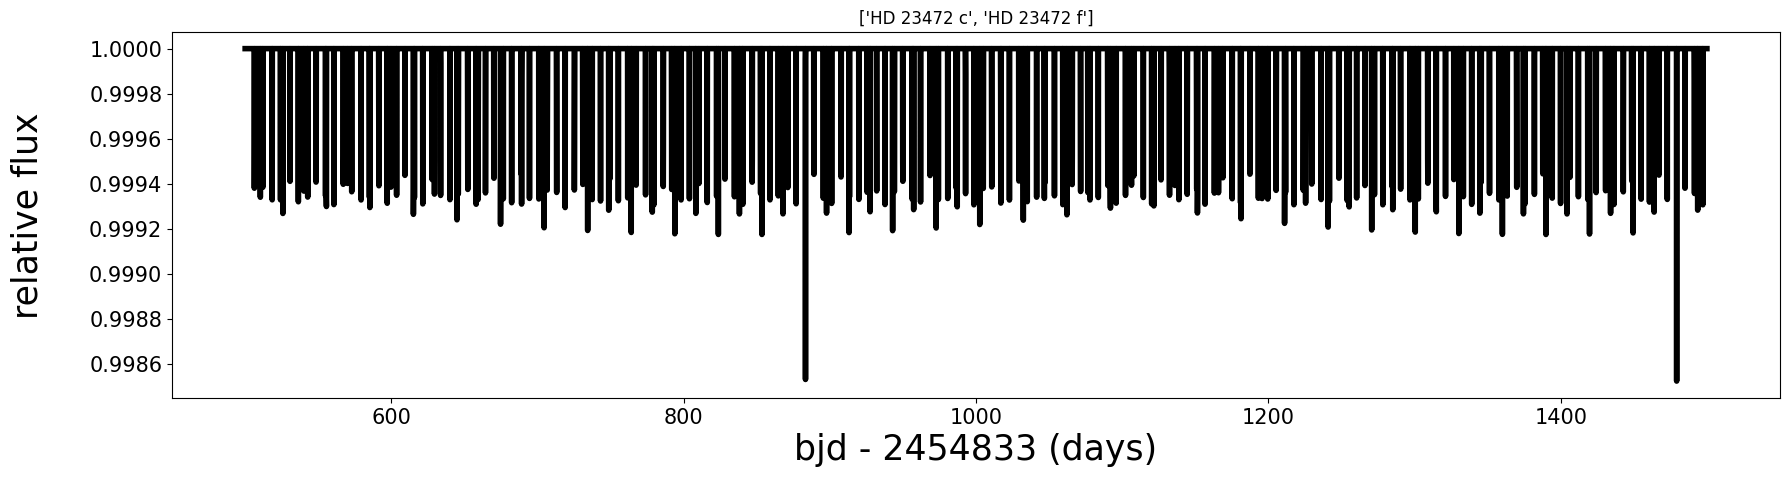

10.5296702 3524.839999999851 0.07 3.97664 19.0 3.141592653589793 0.47 0.6 0.2 0.00975
16.65932 3521.566000000108 0.07 7.90754 46.0 3.141592653589793 0.5 0.6 0.2 0.01065
['HD 23472 d', 'HD 23472 e']


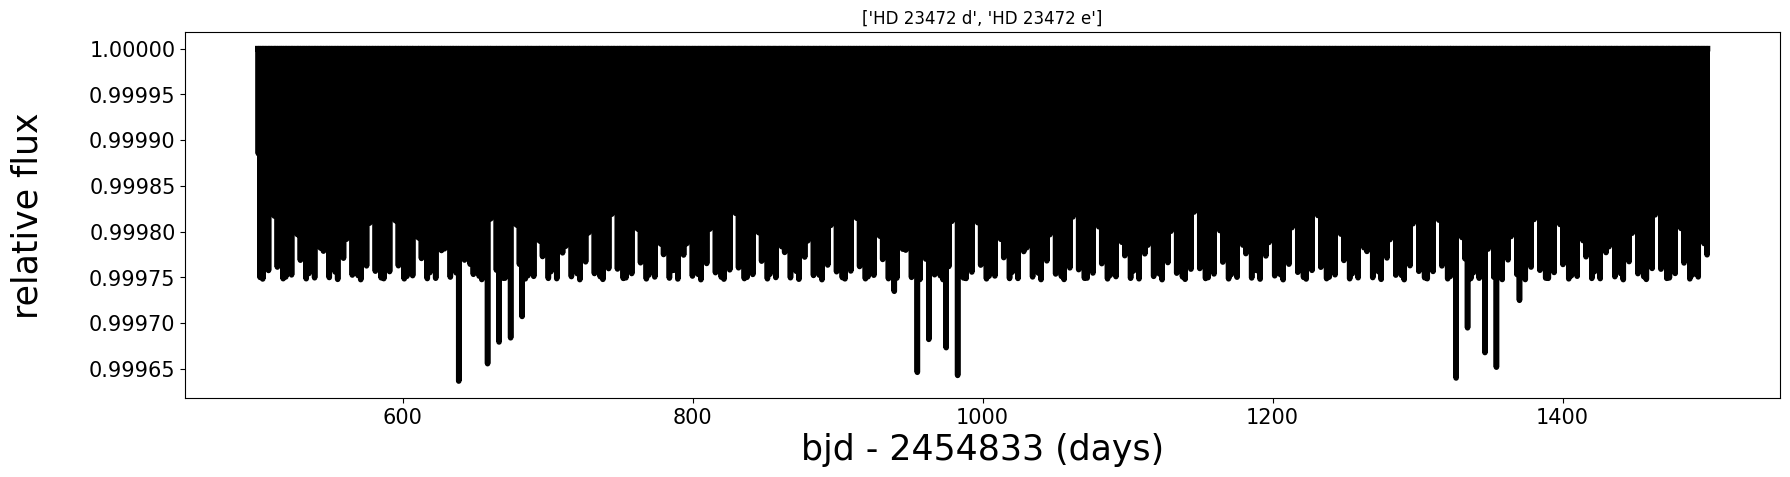

10.5296702 3524.839999999851 0.07 3.97664 19.0 3.141592653589793 0.47 0.6 0.2 0.00975
22.196094000000002 3527.0750000001863 0.07 12.1621839 4.0 3.141592653589793 0.57 0.6 0.2 0.01478
['HD 23472 d', 'HD 23472 f']


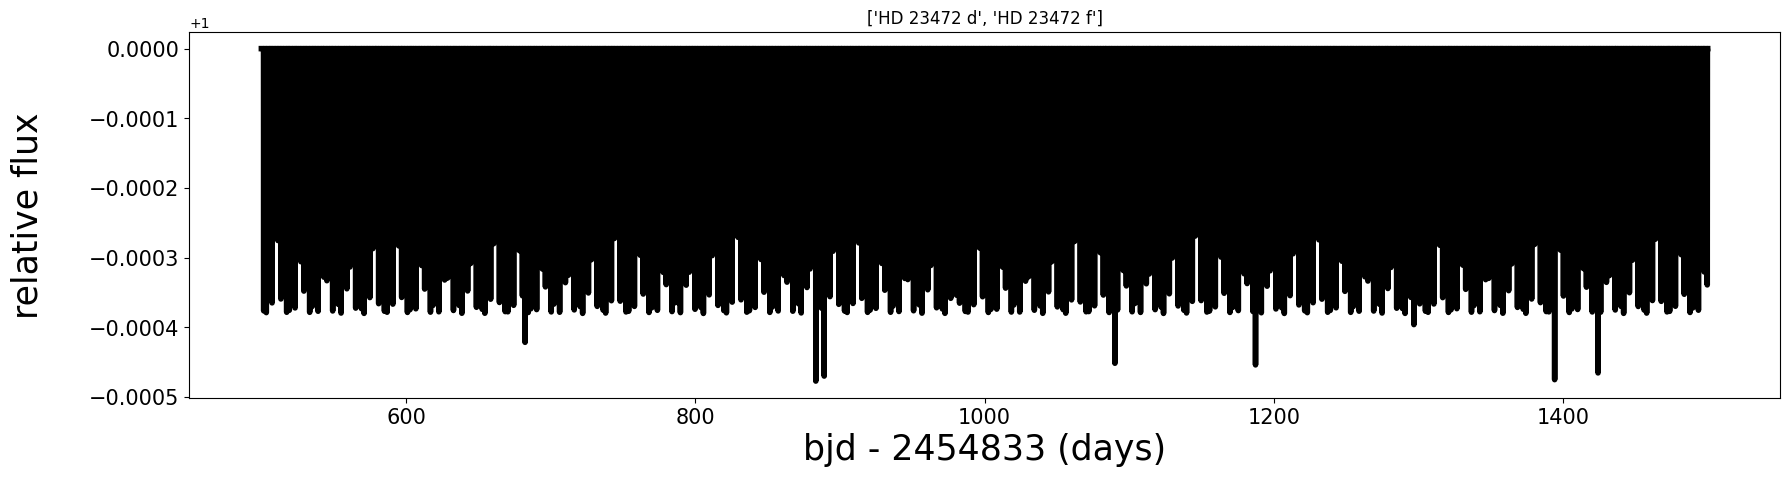

16.65932 3521.566000000108 0.07 7.90754 46.0 3.141592653589793 0.5 0.6 0.2 0.01065
22.196094000000002 3527.0750000001863 0.07 12.1621839 4.0 3.141592653589793 0.57 0.6 0.2 0.01478
['HD 23472 e', 'HD 23472 f']


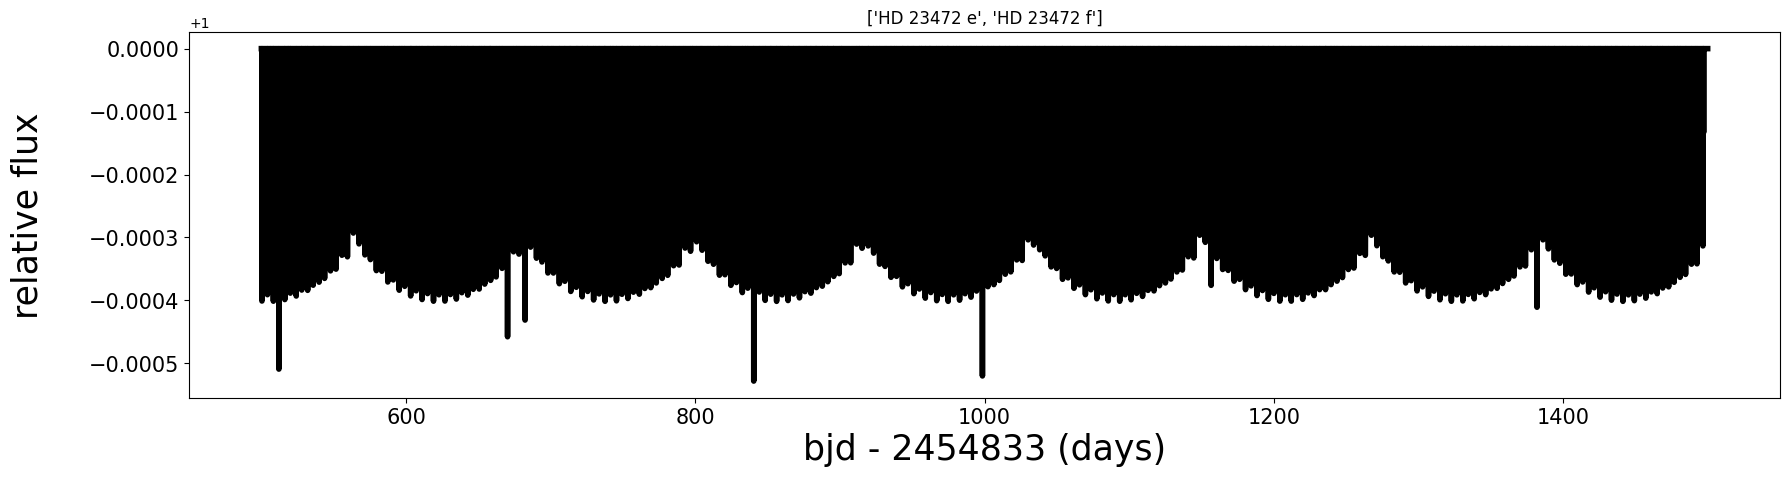

8.2929115 2940.3169999998063 0.048 2.35309 244.0 3.141592653589793 0.419 0.6 0.2 0.016
10.9290039 2907.32200000016 0.045 3.56004 200.0 3.141592653589793 0.369 0.6 0.2 0.02439
['K2-138 b', 'K2-138 c']


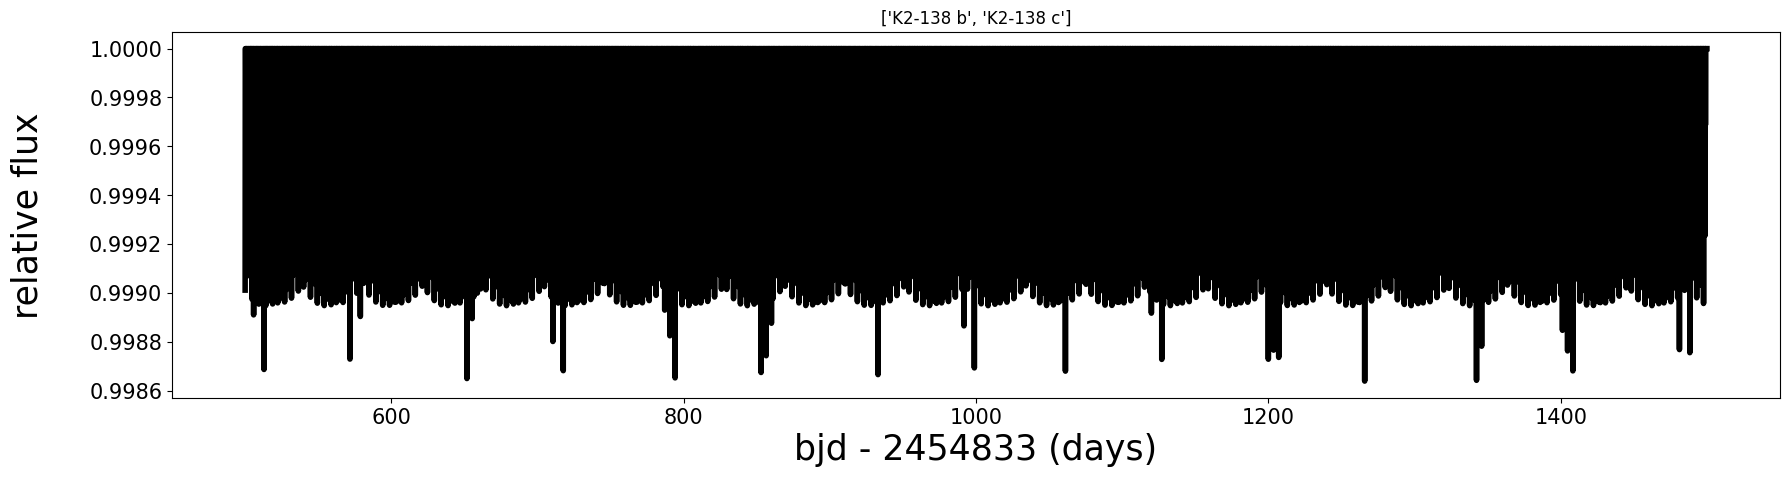

8.2929115 2940.3169999998063 0.048 2.35309 244.0 3.141592653589793 0.419 0.6 0.2 0.016
14.437260700000001 2910.160000000149 0.043 5.40479 83.0 3.141592653589793 0.241 0.6 0.2 0.02532
['K2-138 b', 'K2-138 d']


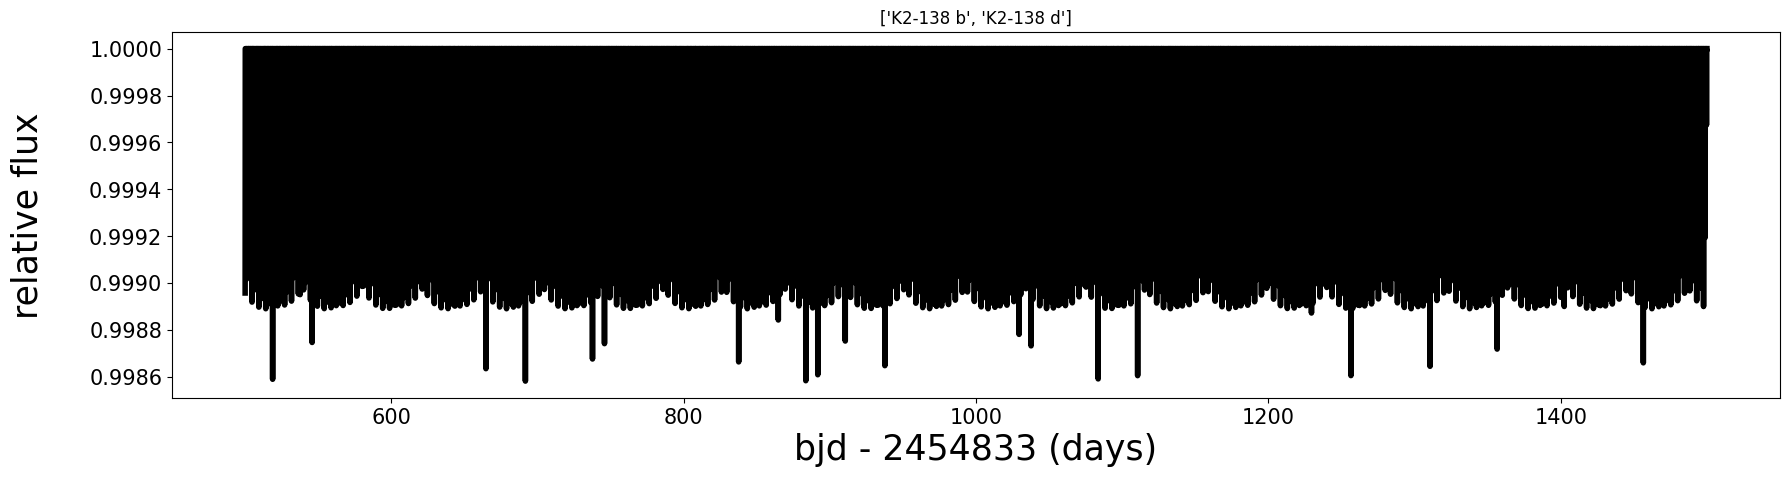

8.2929115 2940.3169999998063 0.048 2.35309 244.0 3.141592653589793 0.419 0.6 0.2 0.016
19.158218 2907.6460000001825 0.077 8.26146 180.0 3.141592653589793 0.468 0.6 0.2 0.03599
['K2-138 b', 'K2-138 e']


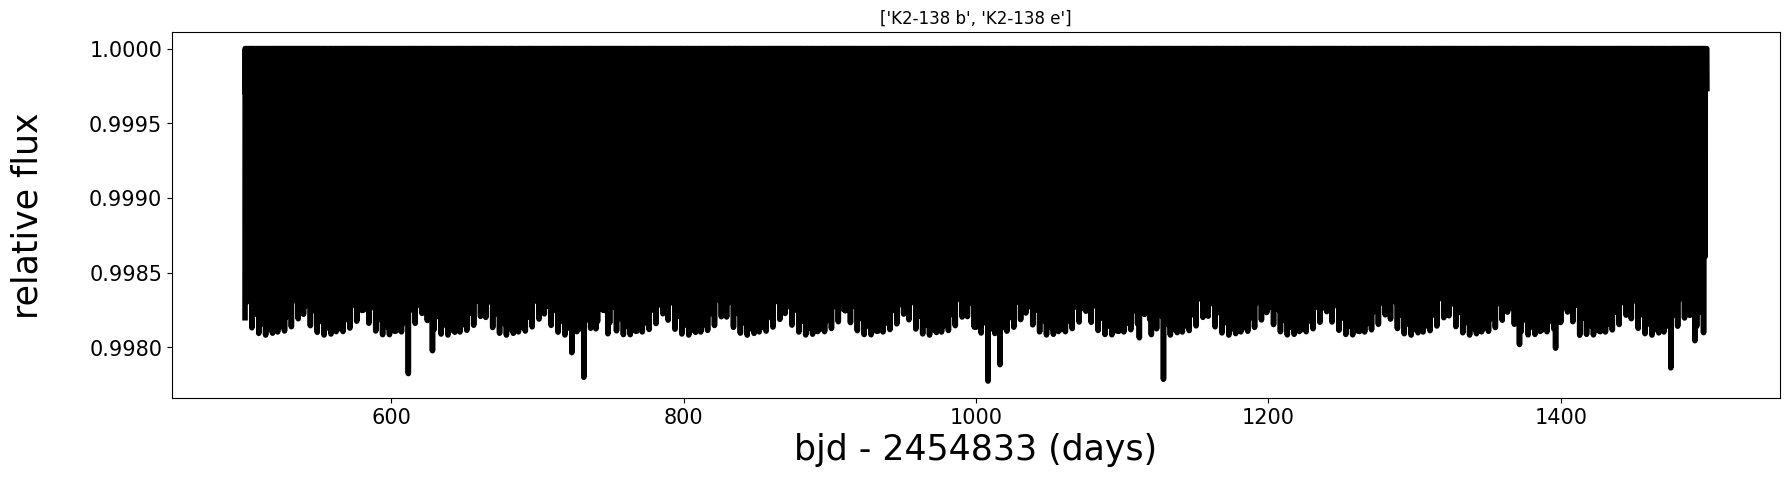

8.2929115 2940.3169999998063 0.048 2.35309 244.0 3.141592653589793 0.419 0.6 0.2 0.016
25.5941053 2905.7020000000484 0.062 12.75758 144.0 3.141592653589793 0.56 0.6 0.2 0.03085
['K2-138 b', 'K2-138 f']


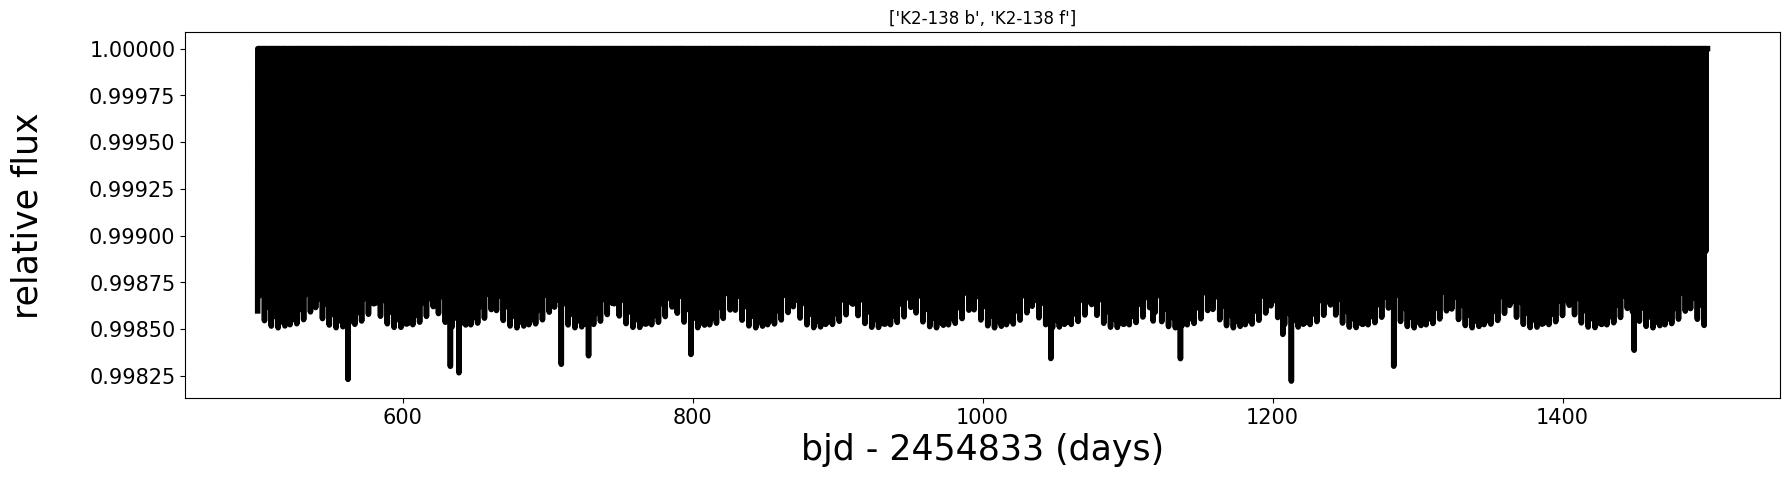

8.2929115 2940.3169999998063 0.048 2.35309 244.0 3.141592653589793 0.419 0.6 0.2 0.016
56.6147391 2940.8620000001974 0.059 41.96797 164.0 3.141592653589793 0.558 0.6 0.2 0.03187
['K2-138 b', 'K2-138 g']


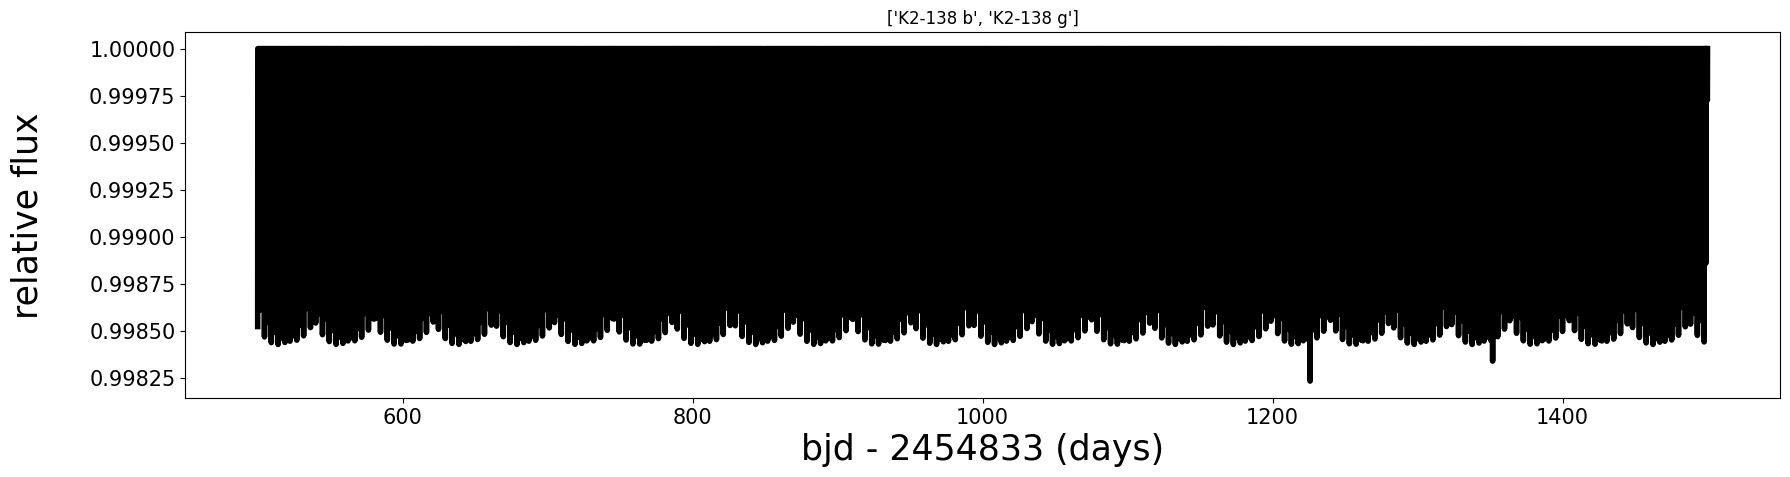

10.9290039 2907.32200000016 0.045 3.56004 200.0 3.141592653589793 0.369 0.6 0.2 0.02439
14.437260700000001 2910.160000000149 0.043 5.40479 83.0 3.141592653589793 0.241 0.6 0.2 0.02532
['K2-138 c', 'K2-138 d']


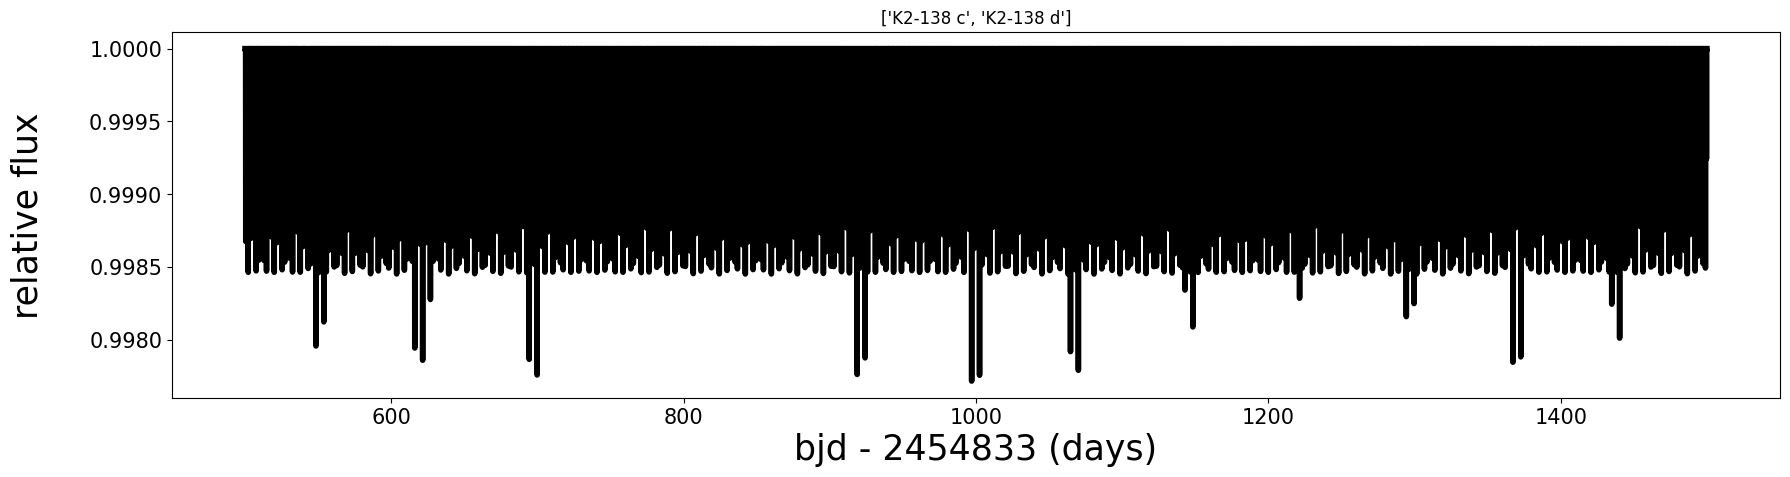

10.9290039 2907.32200000016 0.045 3.56004 200.0 3.141592653589793 0.369 0.6 0.2 0.02439
19.158218 2907.6460000001825 0.077 8.26146 180.0 3.141592653589793 0.468 0.6 0.2 0.03599
['K2-138 c', 'K2-138 e']


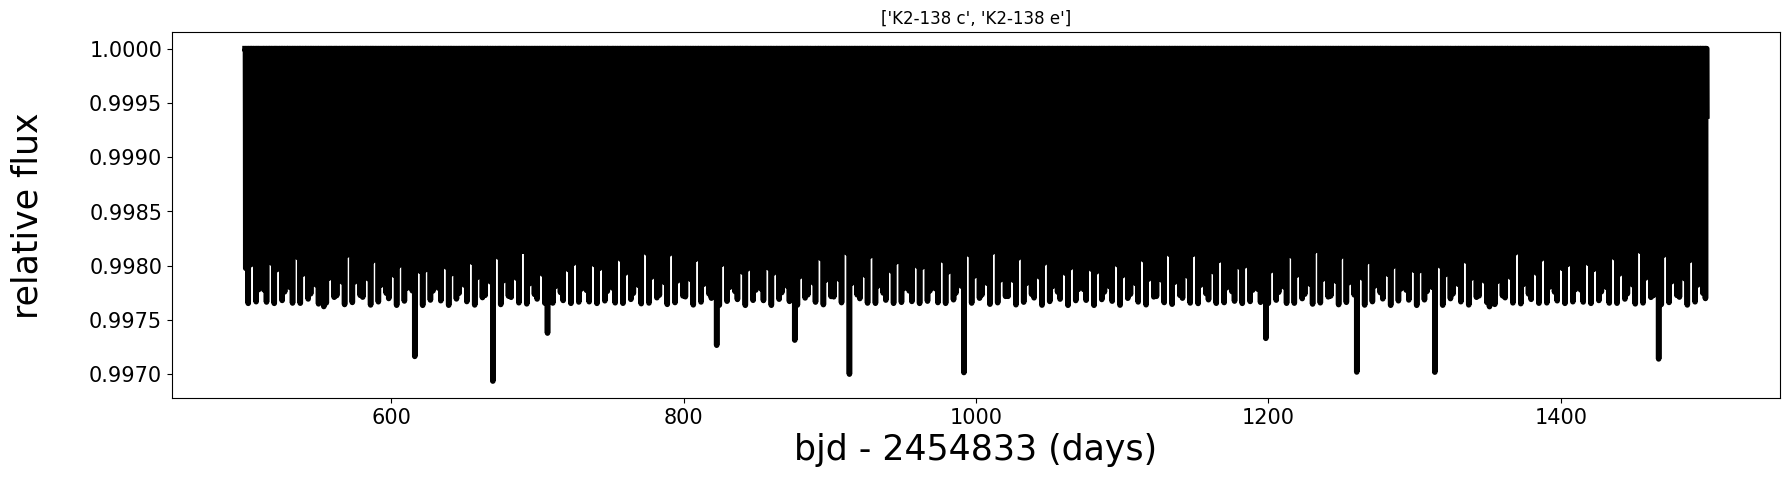

10.9290039 2907.32200000016 0.045 3.56004 200.0 3.141592653589793 0.369 0.6 0.2 0.02439
25.5941053 2905.7020000000484 0.062 12.75758 144.0 3.141592653589793 0.56 0.6 0.2 0.03085
['K2-138 c', 'K2-138 f']


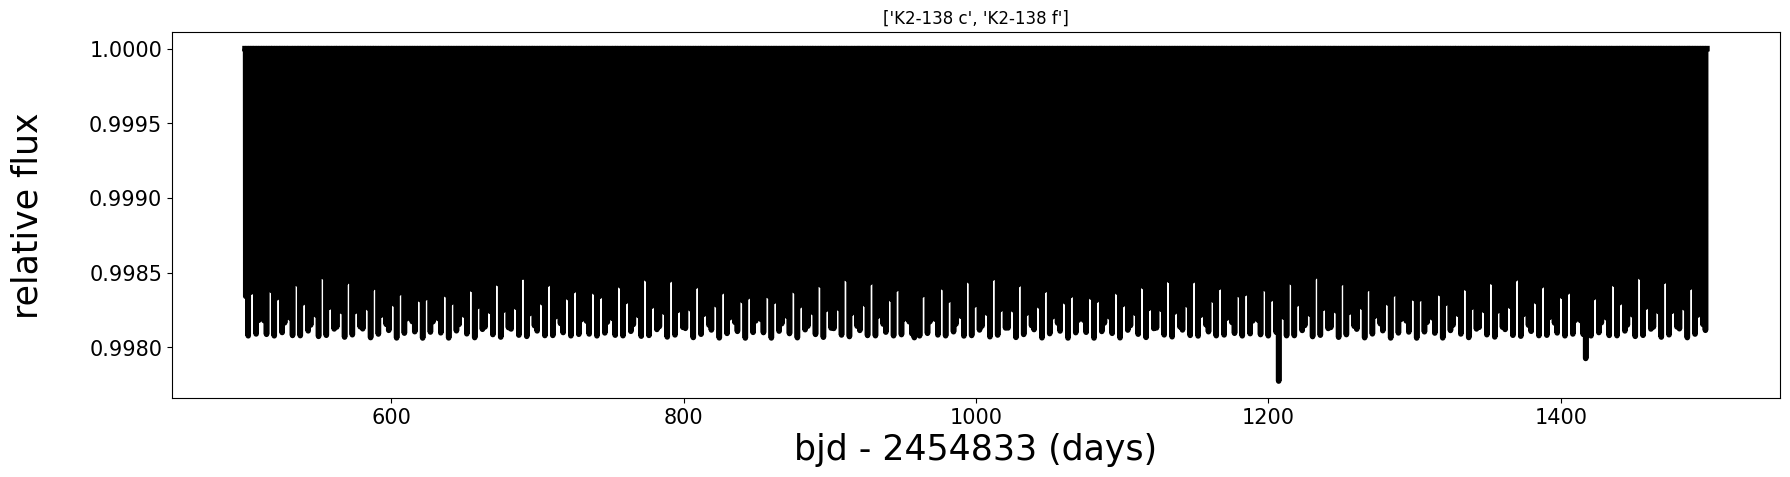

10.9290039 2907.32200000016 0.045 3.56004 200.0 3.141592653589793 0.369 0.6 0.2 0.02439
56.6147391 2940.8620000001974 0.059 41.96797 164.0 3.141592653589793 0.558 0.6 0.2 0.03187
['K2-138 c', 'K2-138 g']


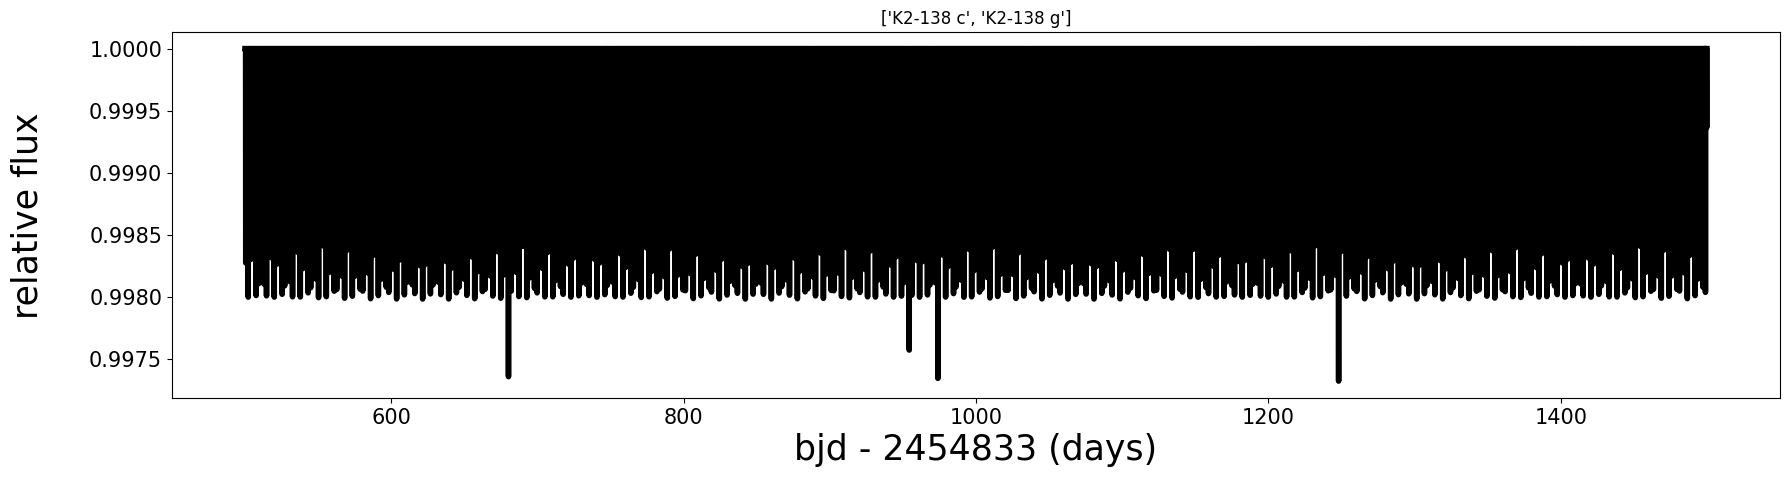

14.437260700000001 2910.160000000149 0.043 5.40479 83.0 3.141592653589793 0.241 0.6 0.2 0.02532
19.158218 2907.6460000001825 0.077 8.26146 180.0 3.141592653589793 0.468 0.6 0.2 0.03599
['K2-138 d', 'K2-138 e']


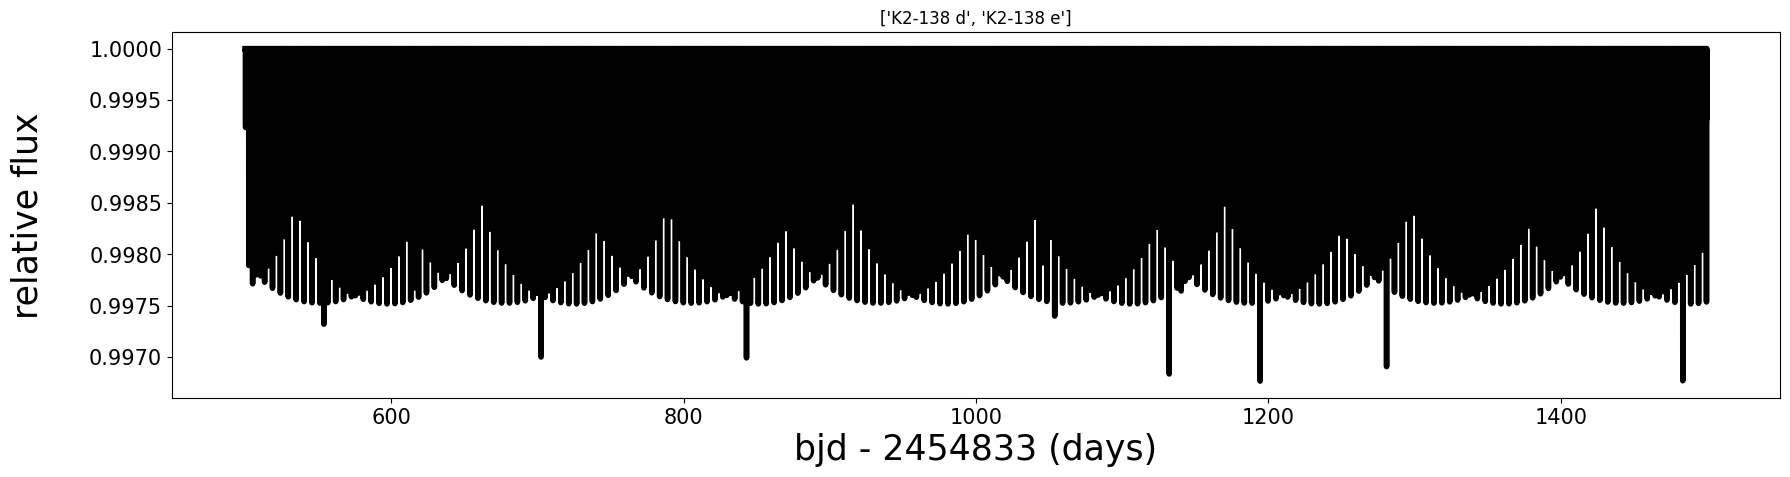

14.437260700000001 2910.160000000149 0.043 5.40479 83.0 3.141592653589793 0.241 0.6 0.2 0.02532
25.5941053 2905.7020000000484 0.062 12.75758 144.0 3.141592653589793 0.56 0.6 0.2 0.03085
['K2-138 d', 'K2-138 f']


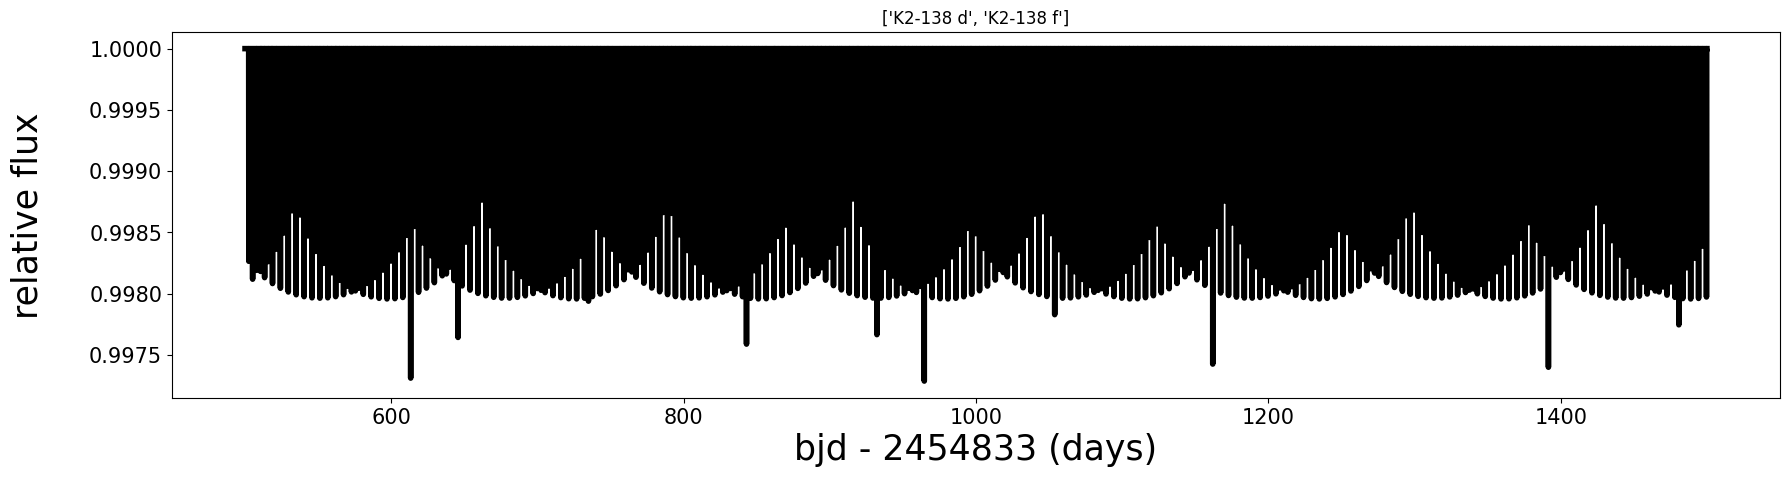

14.437260700000001 2910.160000000149 0.043 5.40479 83.0 3.141592653589793 0.241 0.6 0.2 0.02532
56.6147391 2940.8620000001974 0.059 41.96797 164.0 3.141592653589793 0.558 0.6 0.2 0.03187
['K2-138 d', 'K2-138 g']


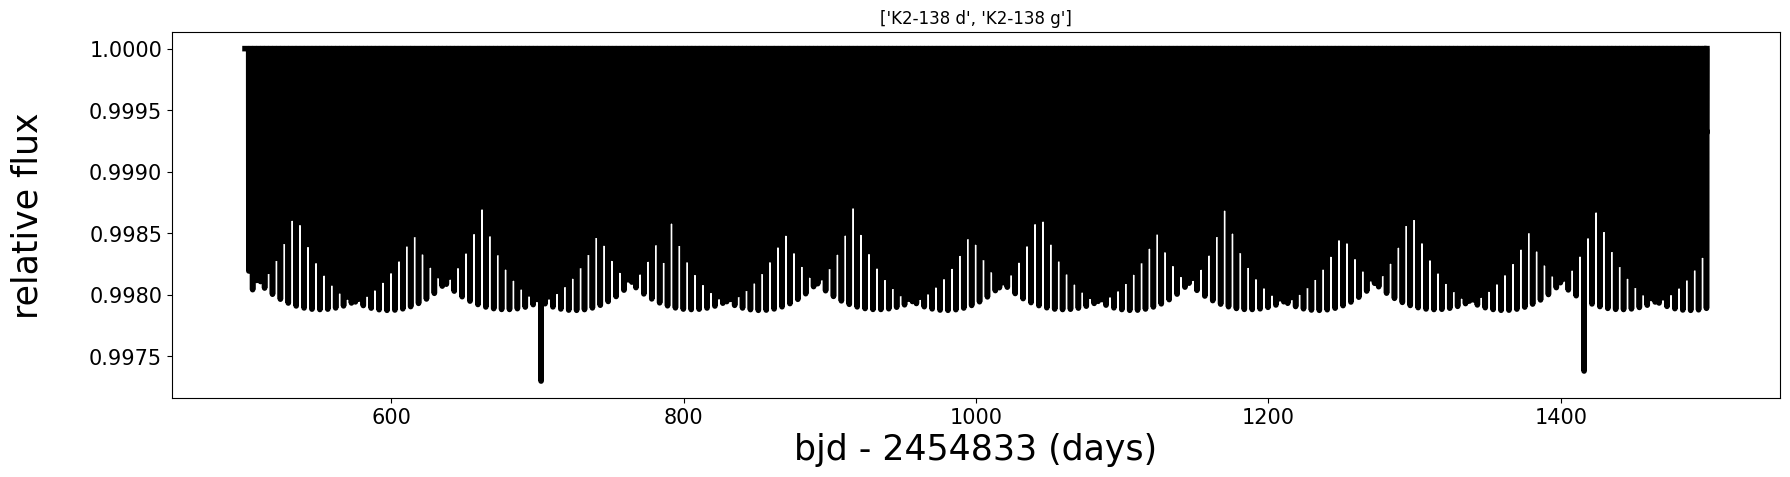

19.158218 2907.6460000001825 0.077 8.26146 180.0 3.141592653589793 0.468 0.6 0.2 0.03599
25.5941053 2905.7020000000484 0.062 12.75758 144.0 3.141592653589793 0.56 0.6 0.2 0.03085
['K2-138 e', 'K2-138 f']


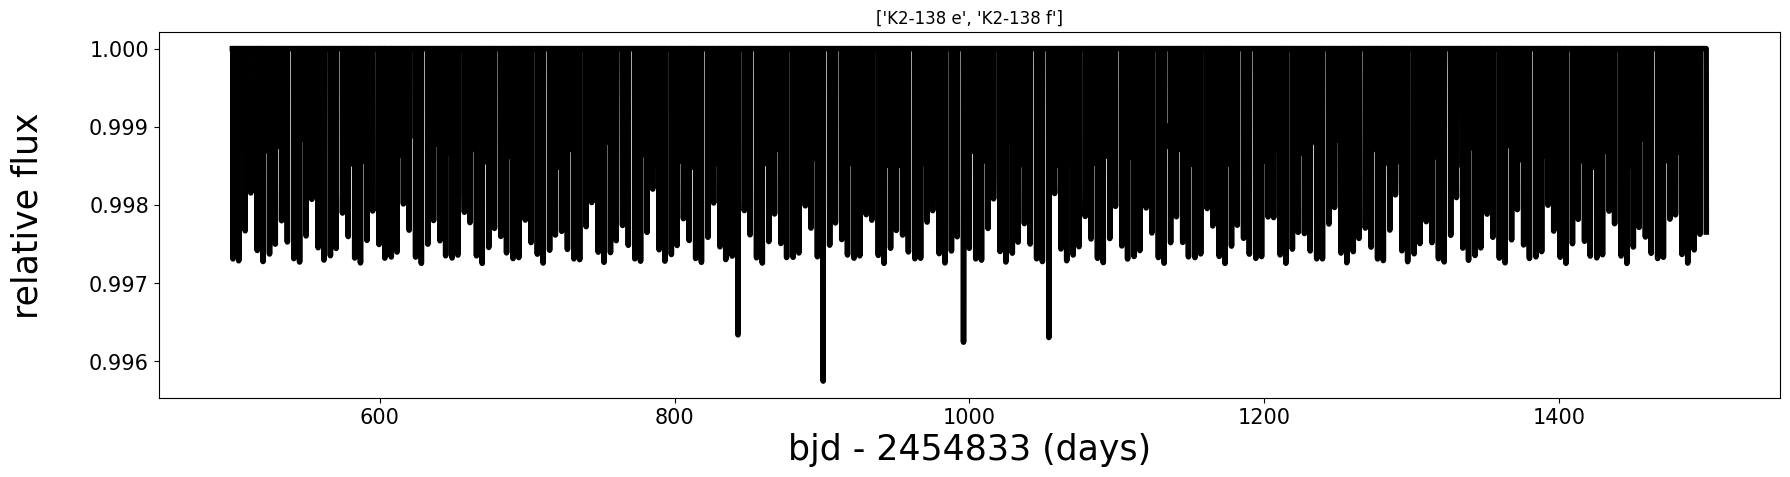

19.158218 2907.6460000001825 0.077 8.26146 180.0 3.141592653589793 0.468 0.6 0.2 0.03599
56.6147391 2940.8620000001974 0.059 41.96797 164.0 3.141592653589793 0.558 0.6 0.2 0.03187
['K2-138 e', 'K2-138 g']


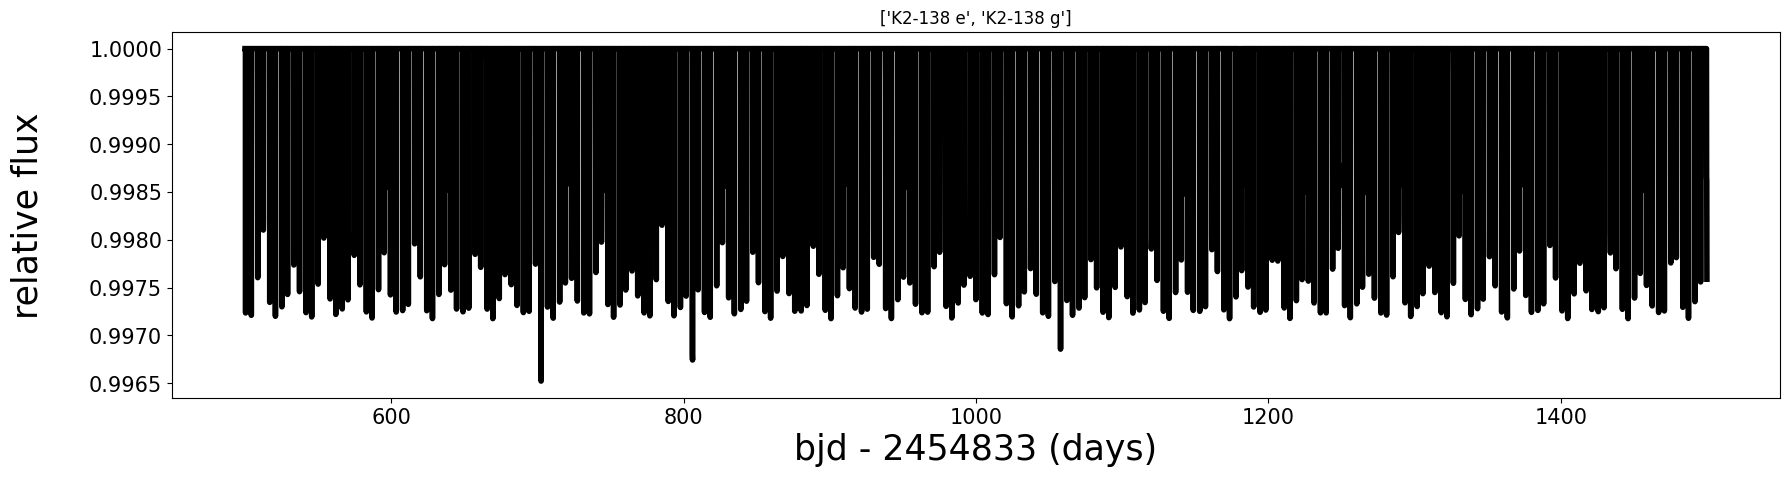

25.5941053 2905.7020000000484 0.062 12.75758 144.0 3.141592653589793 0.56 0.6 0.2 0.03085
56.6147391 2940.8620000001974 0.059 41.96797 164.0 3.141592653589793 0.558 0.6 0.2 0.03187
['K2-138 f', 'K2-138 g']


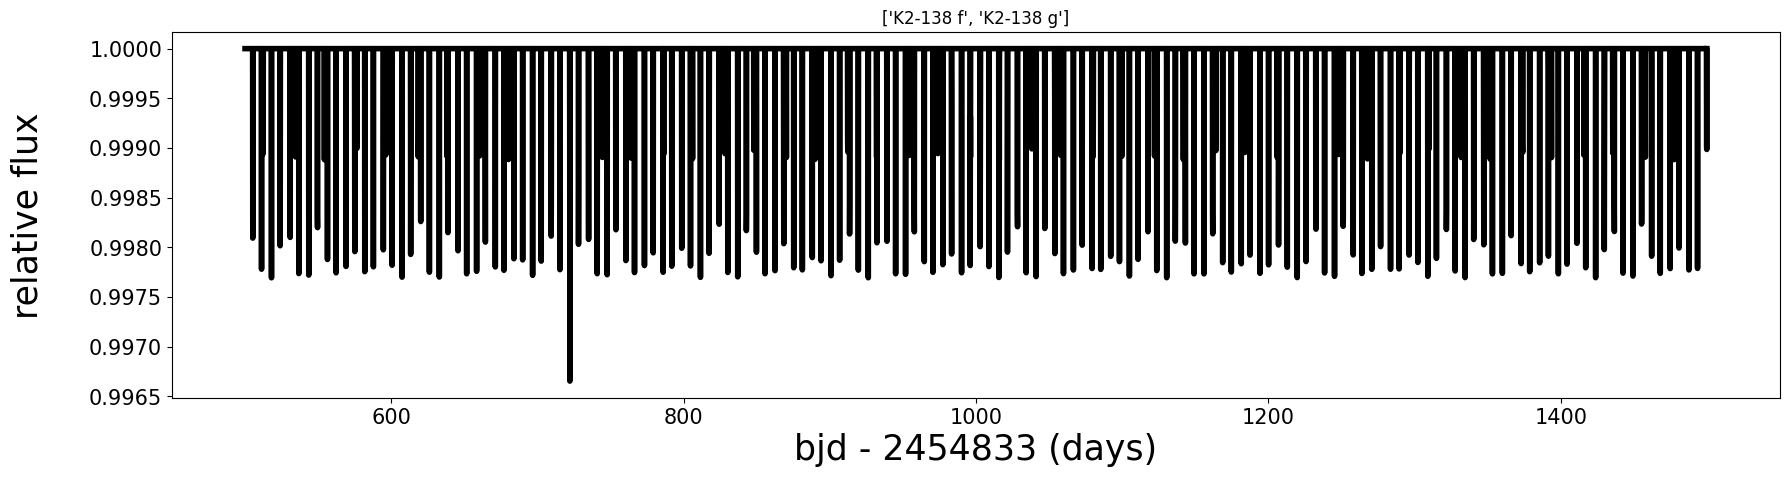

8.1042692 3158.691000000108 0.079 2.4675 248.0 3.141592653589793 0.13 0.6 0.2 0.01743
16.3310334 2753.876999999862 0.2002 7.06005 261.0 3.141592653589793 0.13 0.6 0.2 0.01663
['K2-233 b', 'K2-233 c']


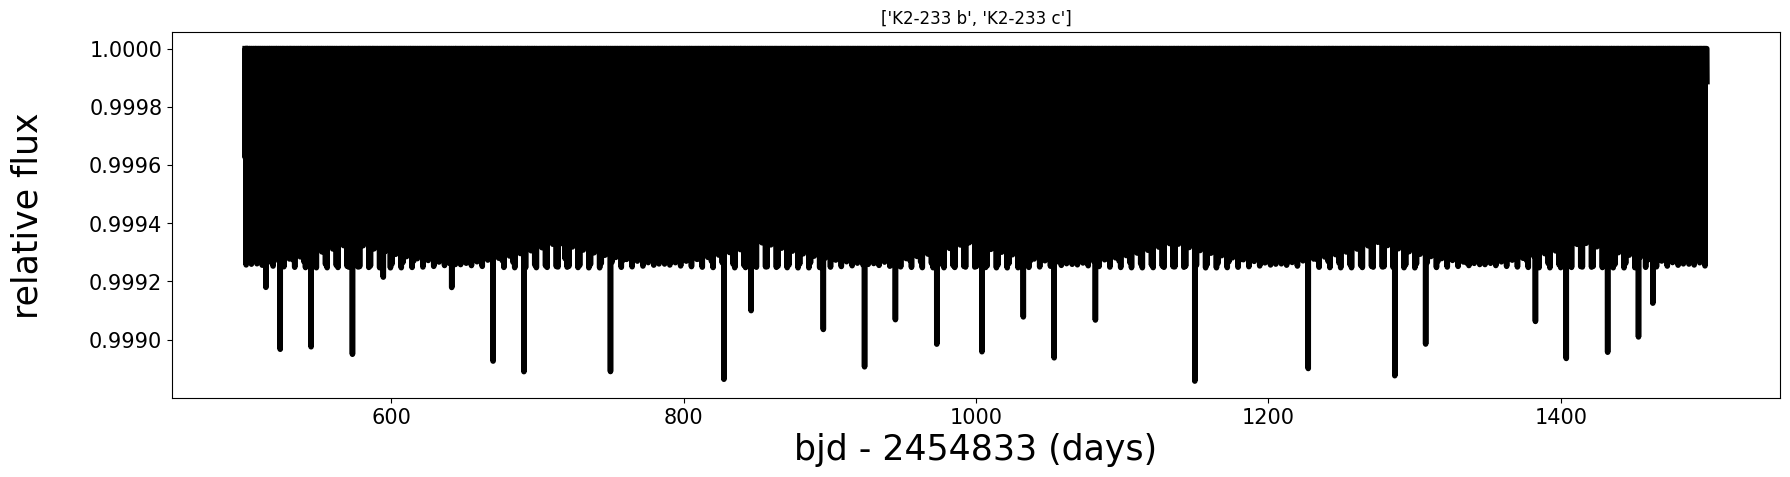

8.1042692 3158.691000000108 0.079 2.4675 248.0 3.141592653589793 0.13 0.6 0.2 0.01743
37.2972776 3172.5819999999367 0.1999 24.3645 139.0 3.141592653589793 0.32 0.6 0.2 0.03062
['K2-233 b', 'K2-233 d']


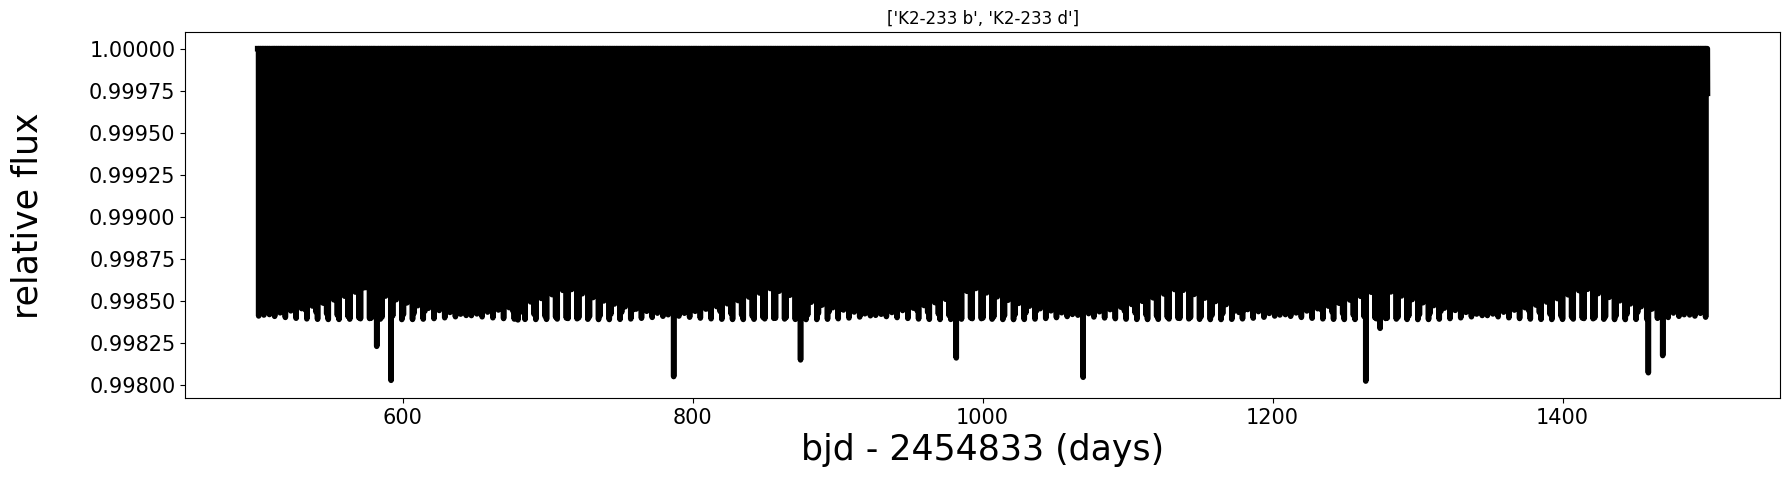

16.3310334 2753.876999999862 0.2002 7.06005 261.0 3.141592653589793 0.13 0.6 0.2 0.01663
37.2972776 3172.5819999999367 0.1999 24.3645 139.0 3.141592653589793 0.32 0.6 0.2 0.03062
['K2-233 c', 'K2-233 d']


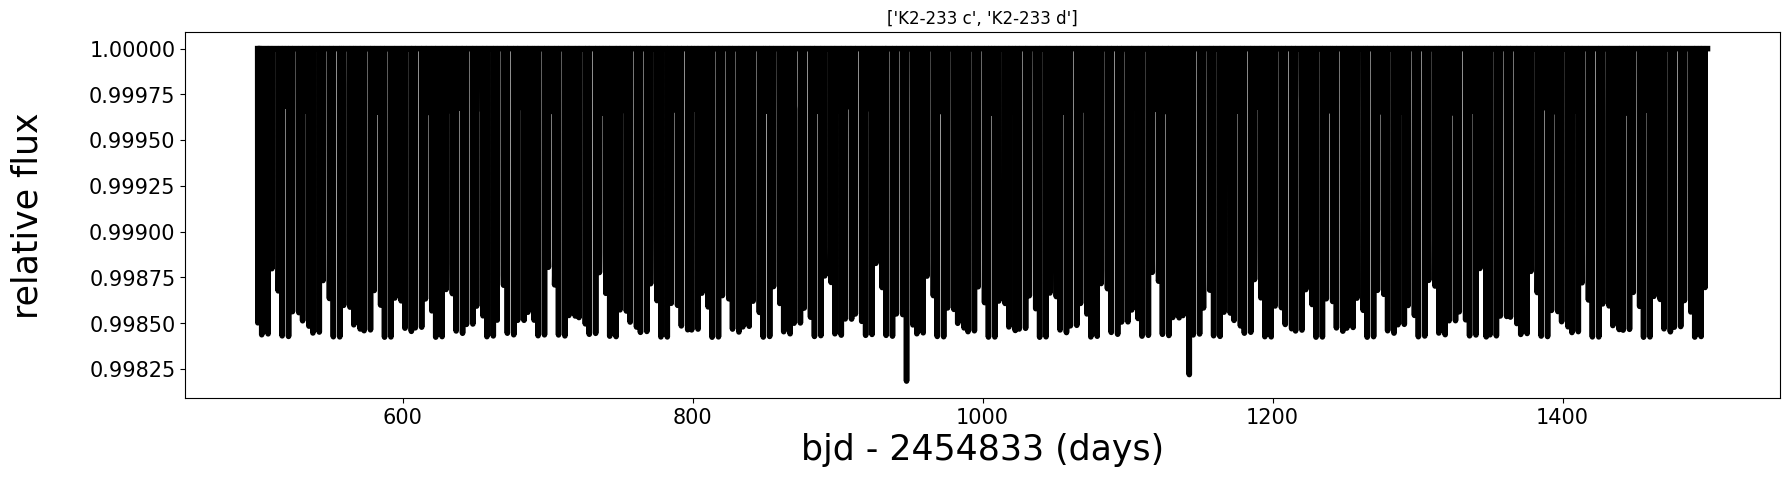

5.708267 3533.1699999999255 0.1 2.25314 17.2 3.141592653589793 0.36 0.6 0.2 0.0234
7.937676 3534.276000000071 0.09 3.690621 -22.9 3.141592653589793 0.29 0.6 0.2 0.0396
['L 98-59 b', 'L 98-59 c']


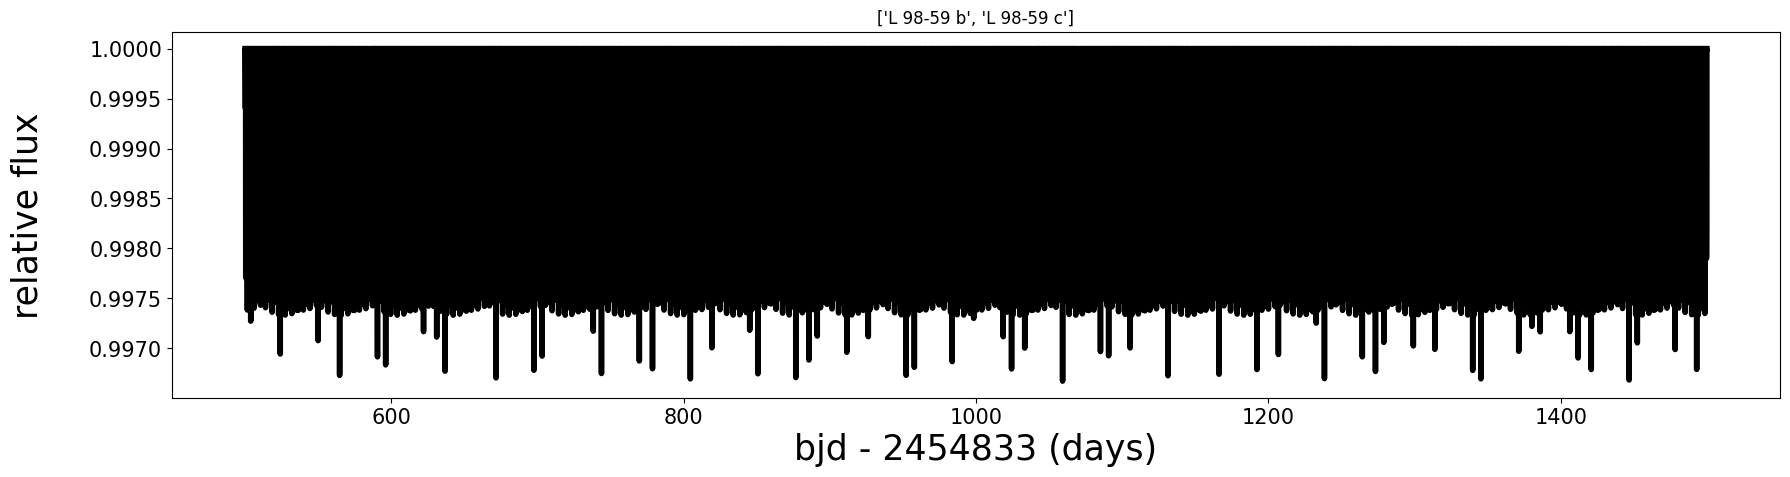

5.708267 3533.1699999999255 0.1 2.25314 17.2 3.141592653589793 0.36 0.6 0.2 0.0234
11.906514 3529.7400000002235 0.074 7.4507245 180.0 3.141592653589793 0.922 0.6 0.2 0.0448
['L 98-59 b', 'L 98-59 d']


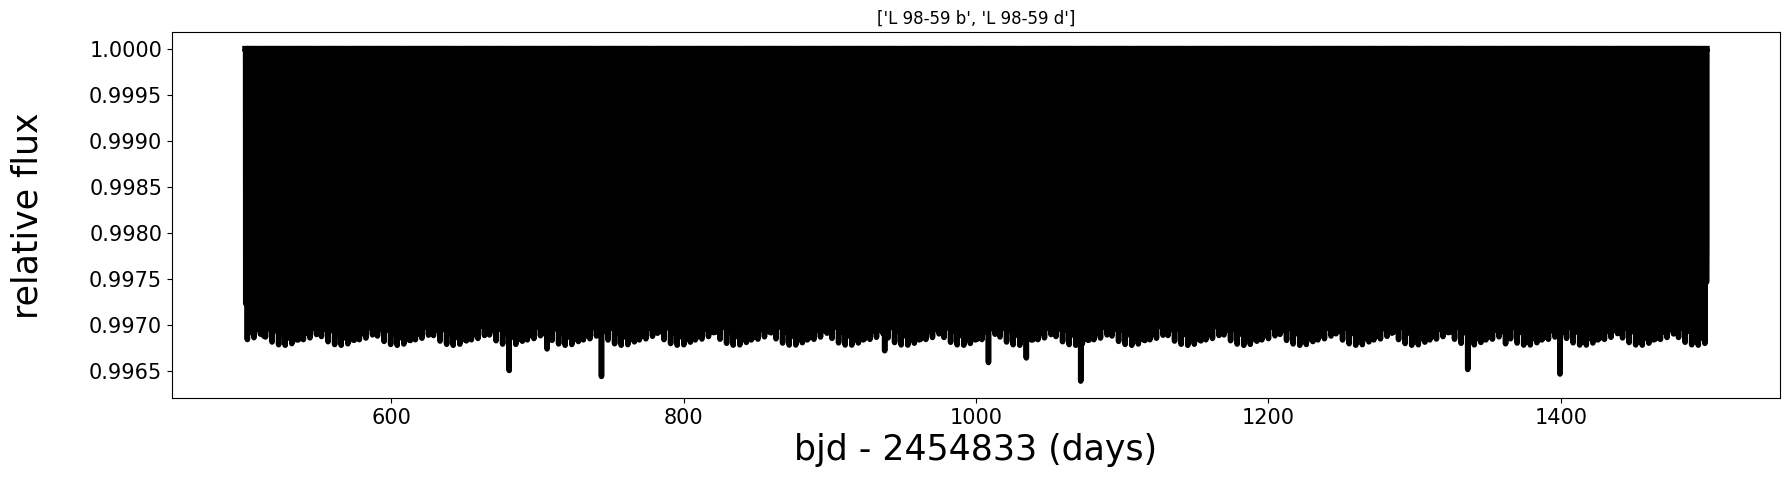

7.937676 3534.276000000071 0.09 3.690621 -22.9 3.141592653589793 0.29 0.6 0.2 0.0396
11.906514 3529.7400000002235 0.074 7.4507245 180.0 3.141592653589793 0.922 0.6 0.2 0.0448
['L 98-59 c', 'L 98-59 d']


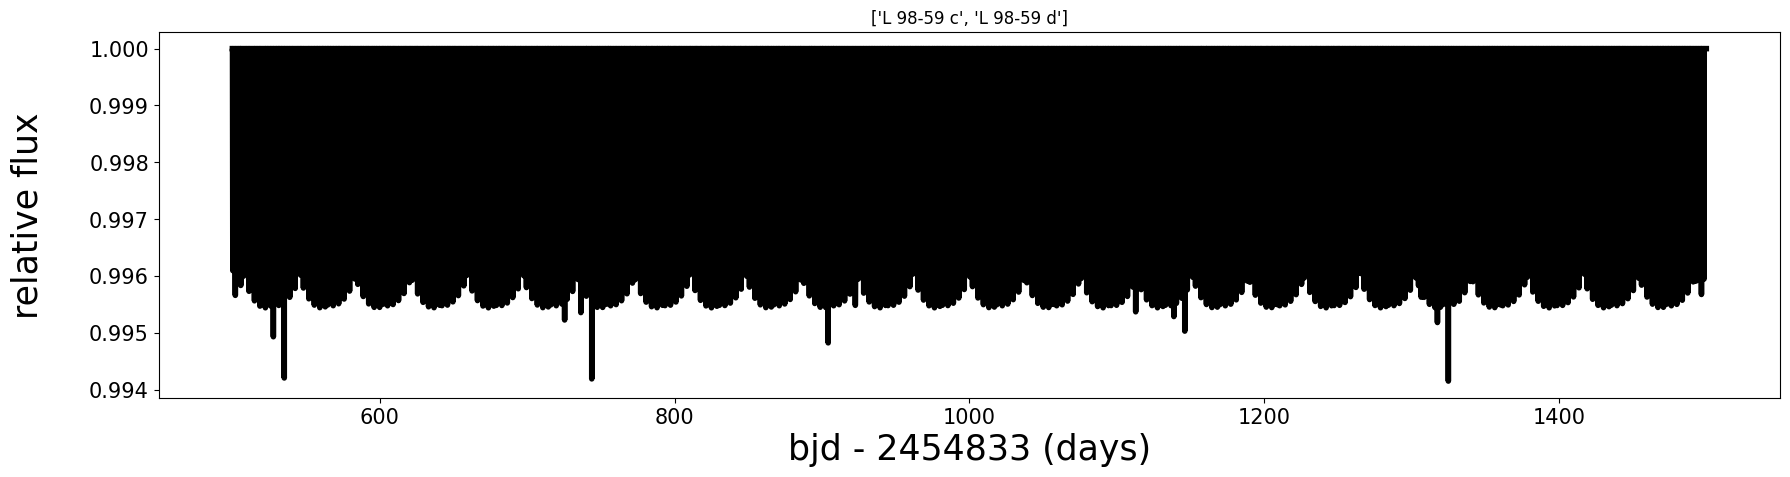

12.763979 3522.3549999999814 0.183 4.65382 -91.0 3.141592653589793 0.25 0.6 0.2 0.02962
19.942186 3528.908999999985 0.066 9.15059 70.0 3.141592653589793 0.522 0.6 0.2 0.02985
['TOI-125 b', 'TOI-125 c']


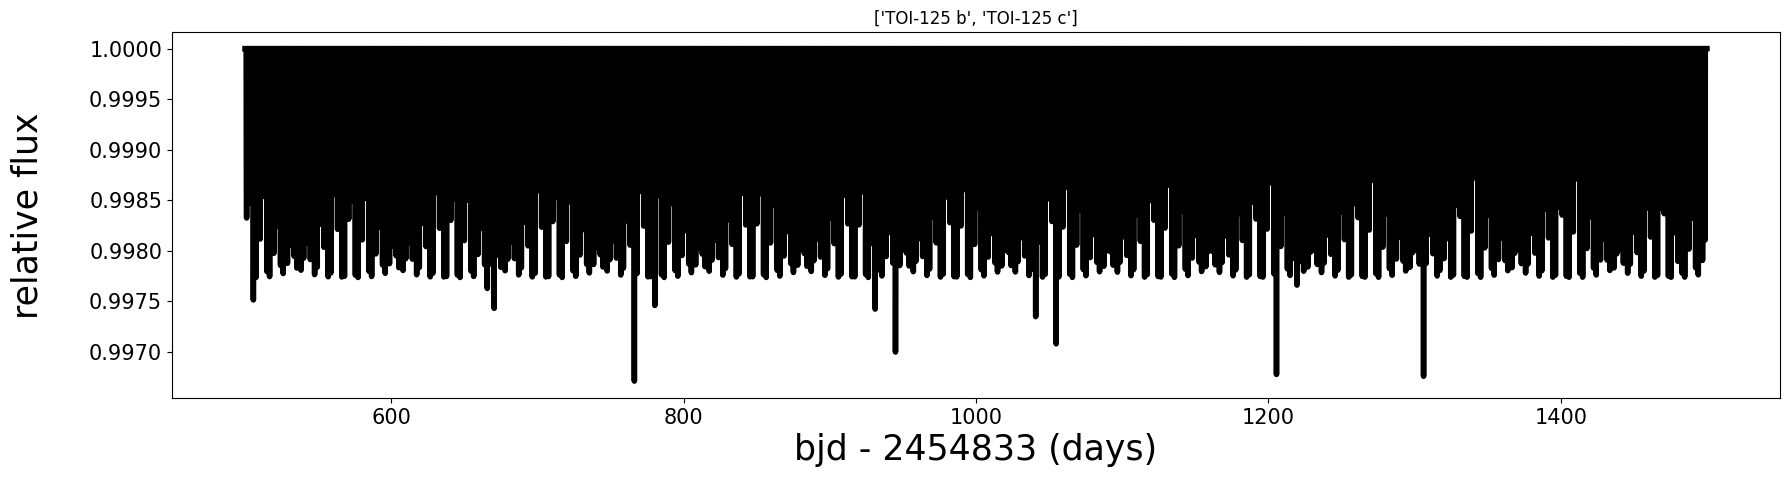

12.763979 3522.3549999999814 0.183 4.65382 -91.0 3.141592653589793 0.25 0.6 0.2 0.02962
33.56363 3509.8519999999553 0.168 19.98 46.0 3.141592653589793 0.652 0.6 0.2 0.0317
['TOI-125 b', 'TOI-125 d']


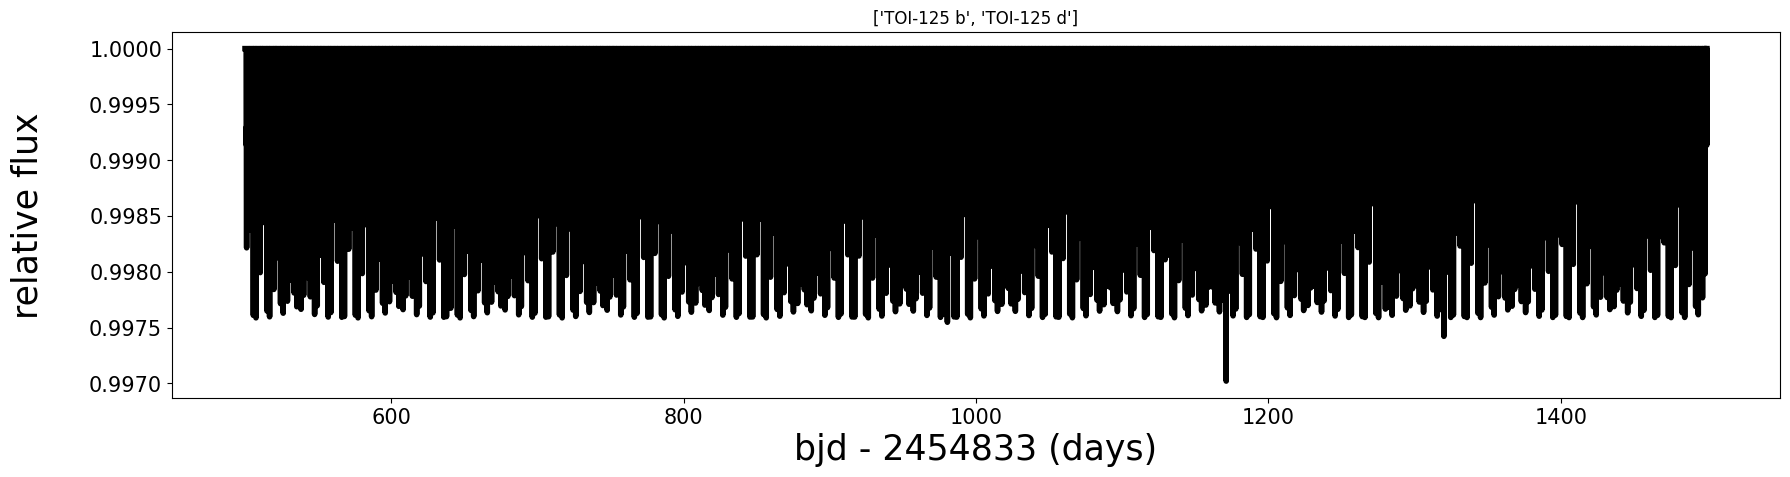

19.942186 3528.908999999985 0.066 9.15059 70.0 3.141592653589793 0.522 0.6 0.2 0.02985
33.56363 3509.8519999999553 0.168 19.98 46.0 3.141592653589793 0.652 0.6 0.2 0.0317
['TOI-125 c', 'TOI-125 d']


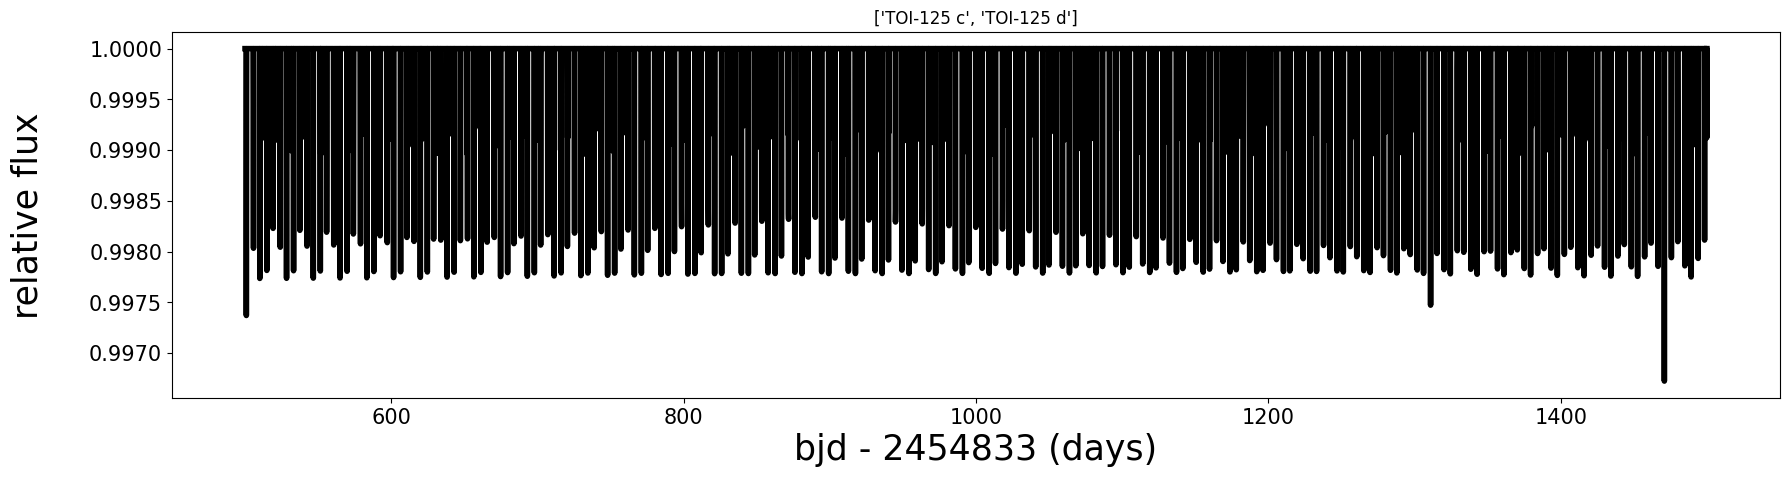

8.966634 3851.0129999998026 0.0 3.12748 90.0 3.141592653589793 0.26 0.6 0.2 0.0329
16.071344000000003 3853.117999999784 0.0 7.49325 90.0 3.141592653589793 0.714 0.6 0.2 0.0398
['TOI-1260 b', 'TOI-1260 c']


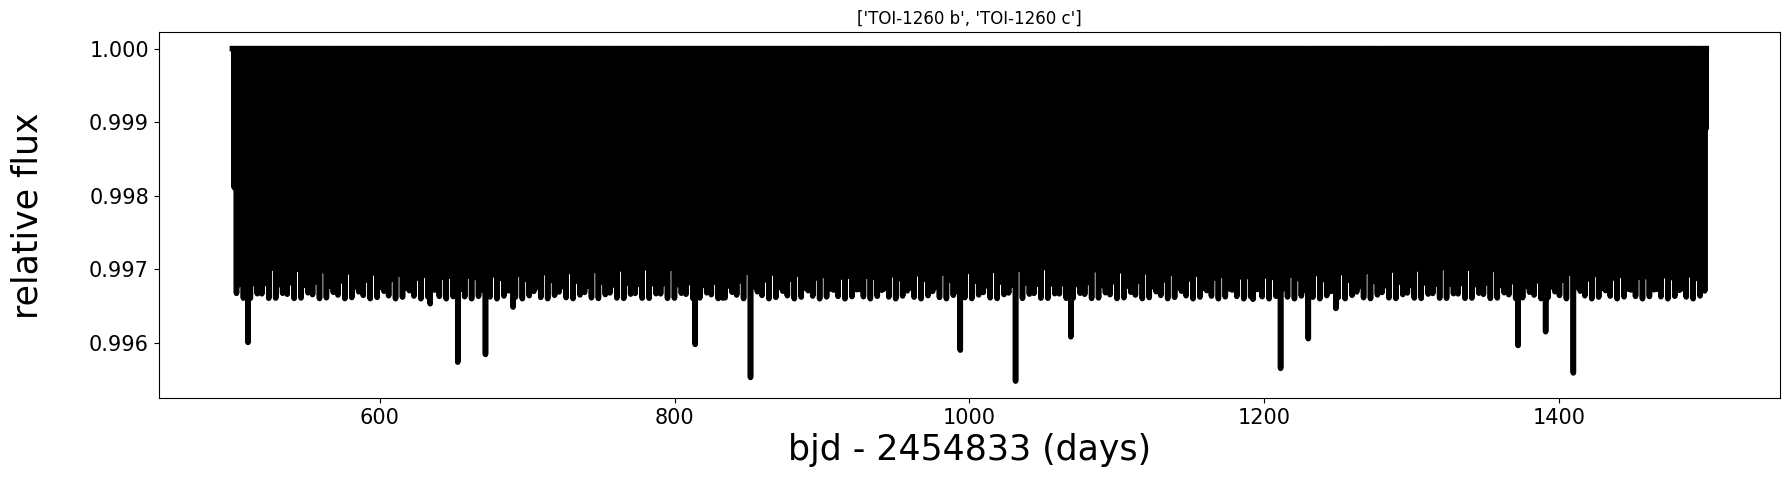

8.966634 3851.0129999998026 0.0 3.12748 90.0 3.141592653589793 0.26 0.6 0.2 0.0329
27.340884000000003 4229.016999999993 0.0 16.608164 0.0 3.141592653589793 0.53 0.6 0.2 0.0425
['TOI-1260 b', 'TOI-1260 d']


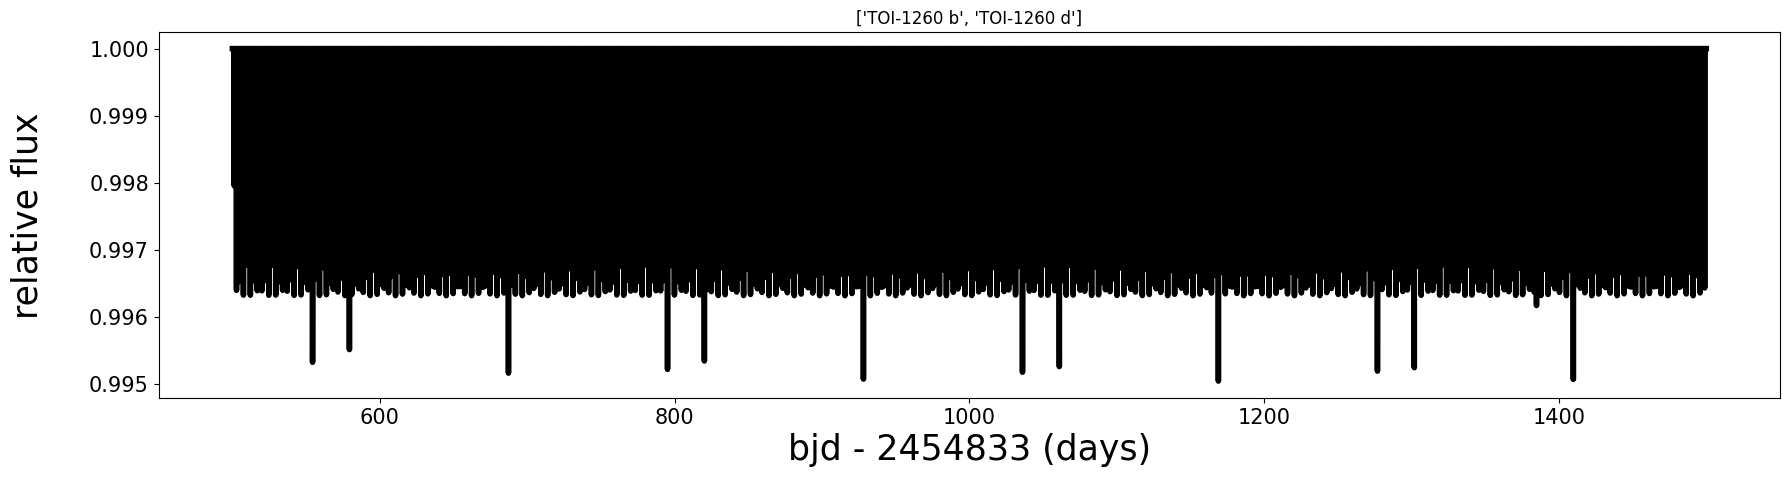

16.071344000000003 3853.117999999784 0.0 7.49325 90.0 3.141592653589793 0.714 0.6 0.2 0.0398
27.340884000000003 4229.016999999993 0.0 16.608164 0.0 3.141592653589793 0.53 0.6 0.2 0.0425
['TOI-1260 c', 'TOI-1260 d']


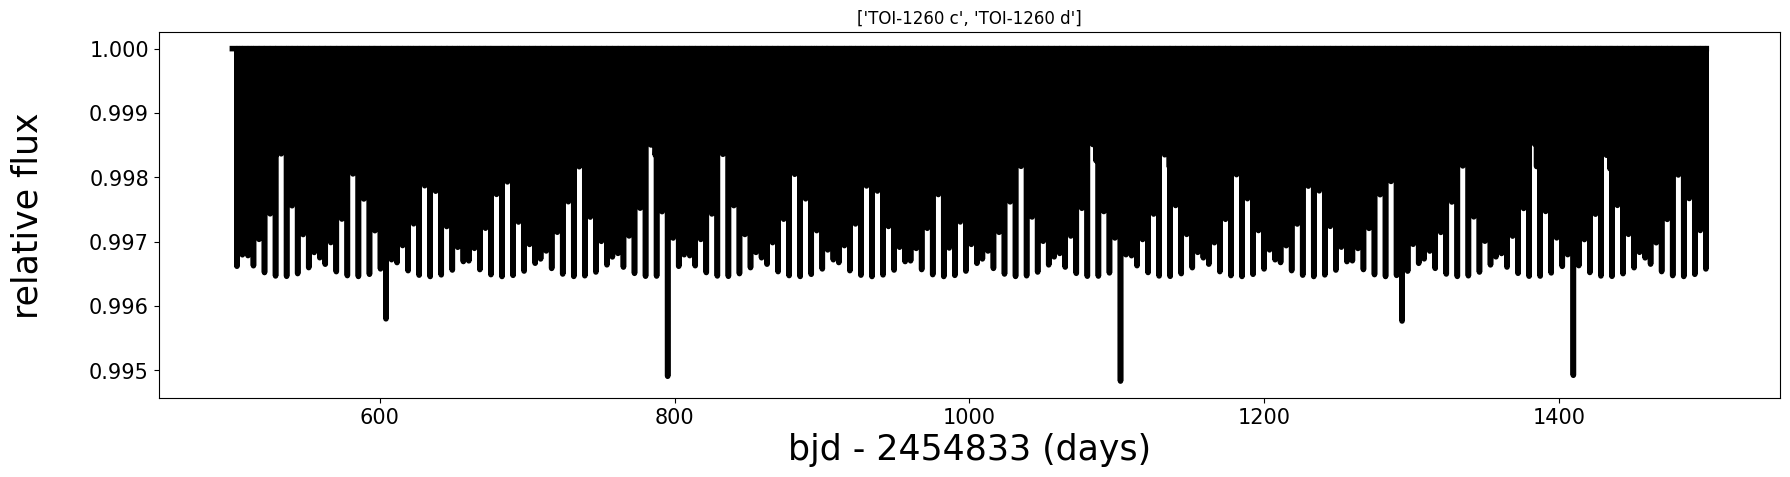

2.5846445 3684.498000000138 0.0 0.446578 90.0 3.141592653589793 0.14 0.6 0.2 0.0152
21.657116000000002 4405.462999999989 0.03 10.778831 291.0 3.141592653589793 0.12 0.6 0.2 0.0316
['TOI-561 b', 'TOI-561 c']


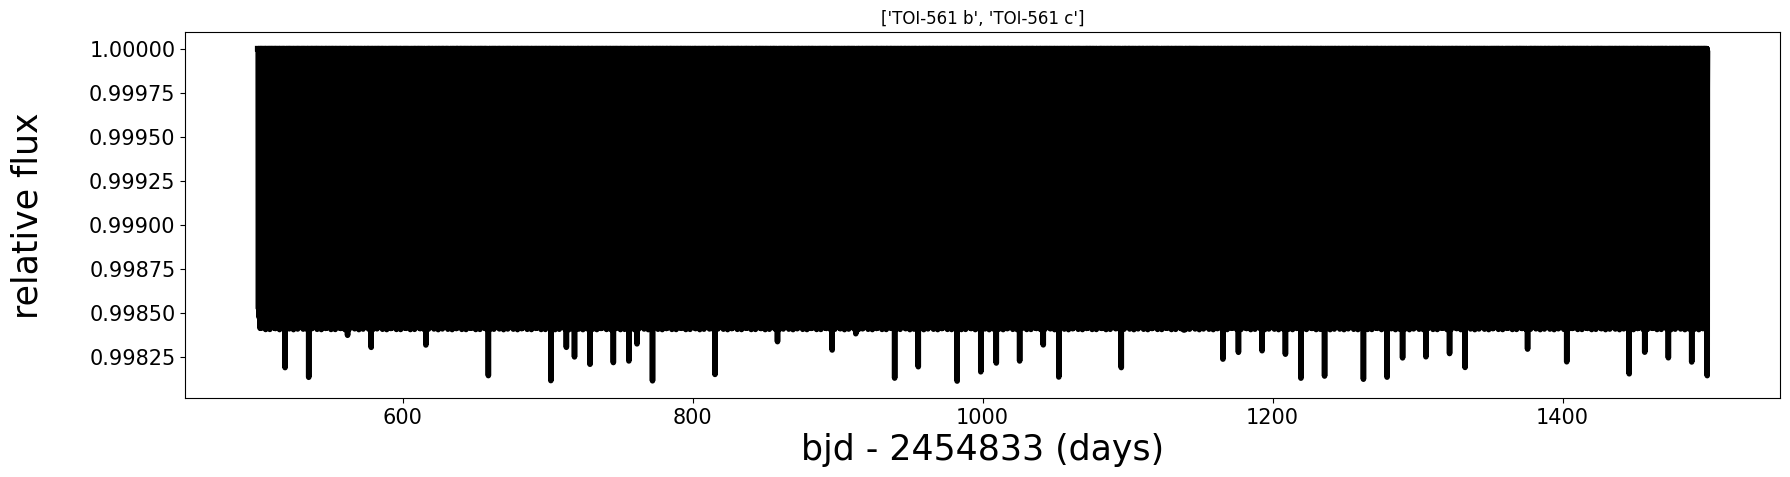

2.5846445 3684.498000000138 0.0 0.446578 90.0 3.141592653589793 0.14 0.6 0.2 0.0152
38.438931000000004 3688.882000000216 0.051 25.62 246.0 3.141592653589793 0.32 0.6 0.2 0.0271
['TOI-561 b', 'TOI-561 d']


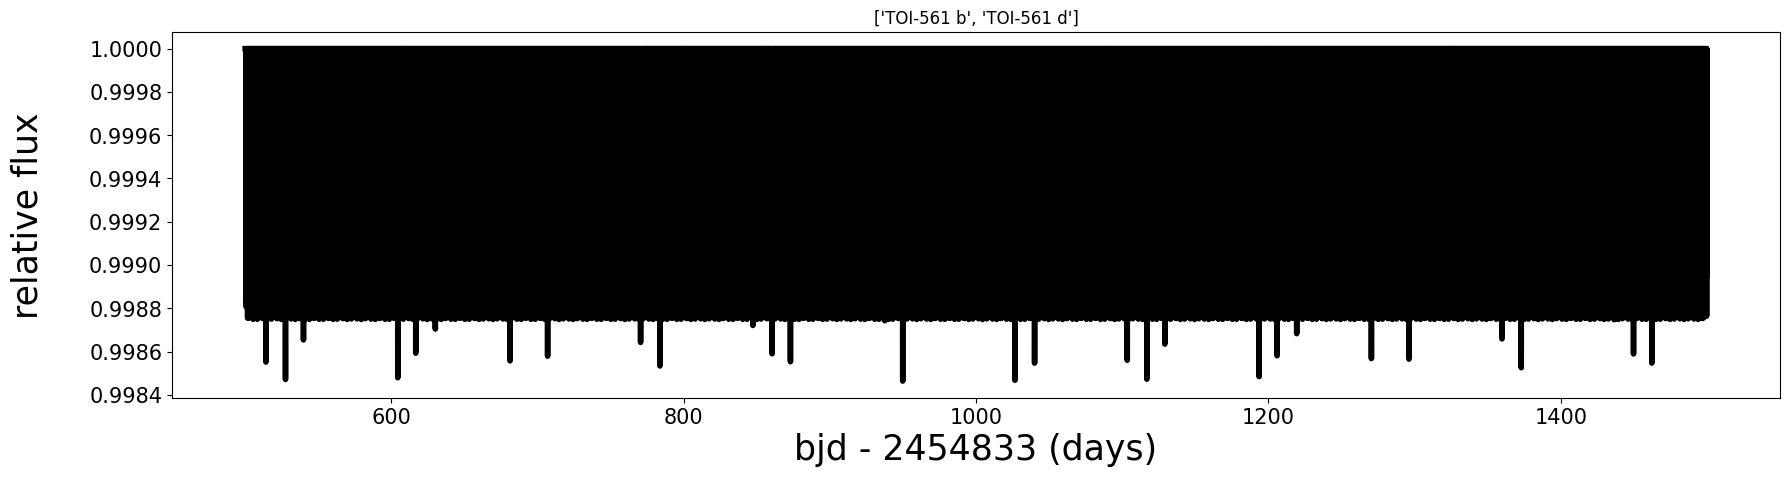

2.5846445 3684.498000000138 0.0 0.446578 90.0 3.141592653589793 0.14 0.6 0.2 0.0152
80.209726 3705.180999999866 0.061 77.23 155.0 3.141592653589793 0.34 0.6 0.2 0.0286
['TOI-561 b', 'TOI-561 e']


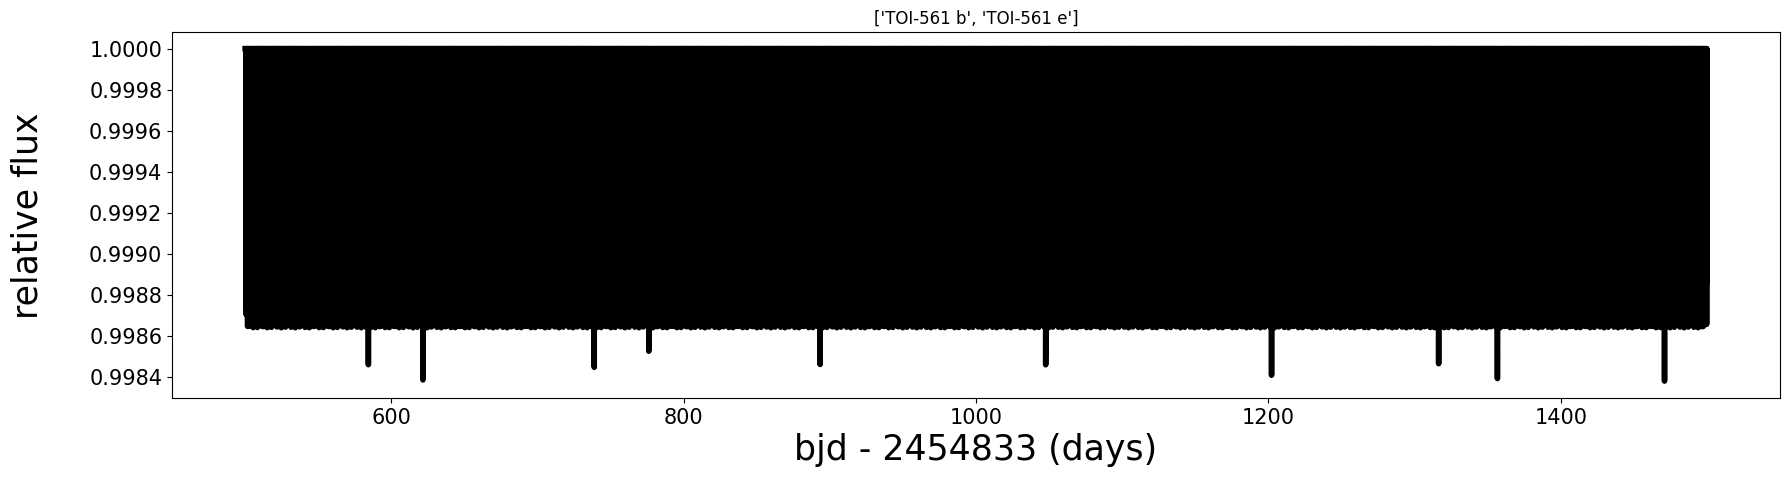

21.657116000000002 4405.462999999989 0.03 10.778831 291.0 3.141592653589793 0.12 0.6 0.2 0.0316
38.438931000000004 3688.882000000216 0.051 25.62 246.0 3.141592653589793 0.32 0.6 0.2 0.0271
['TOI-561 c', 'TOI-561 d']


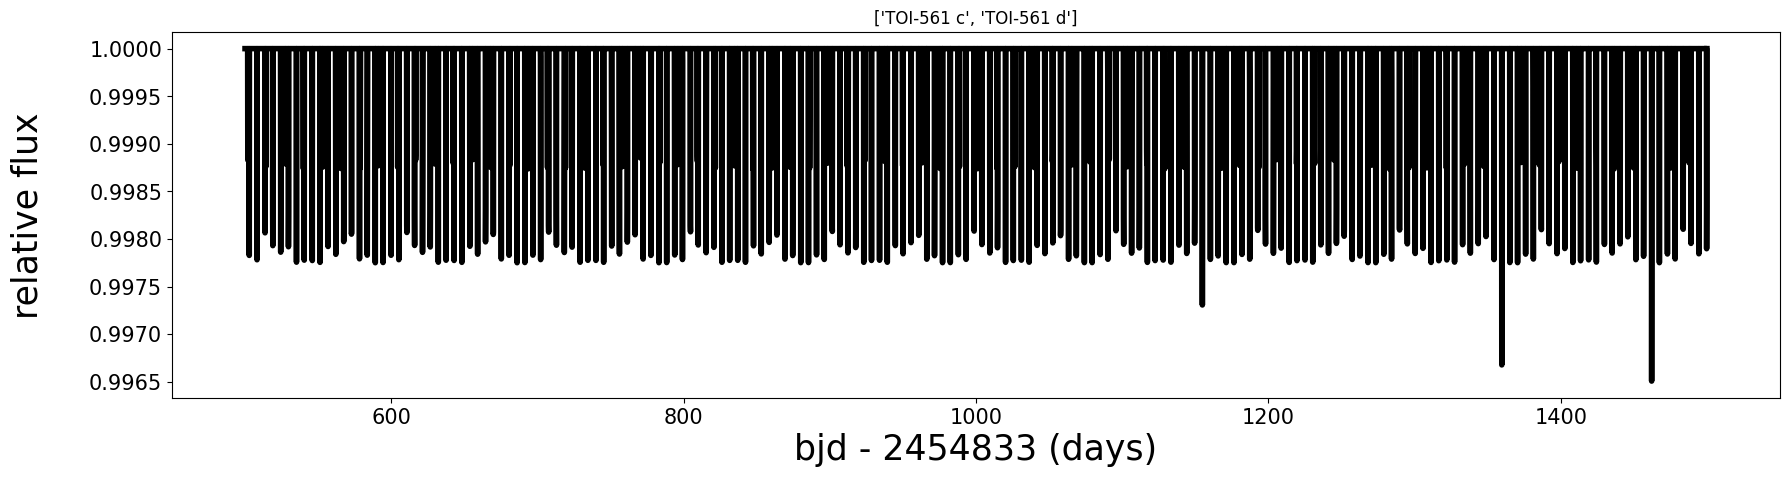

21.657116000000002 4405.462999999989 0.03 10.778831 291.0 3.141592653589793 0.12 0.6 0.2 0.0316
80.209726 3705.180999999866 0.061 77.23 155.0 3.141592653589793 0.34 0.6 0.2 0.0286
['TOI-561 c', 'TOI-561 e']


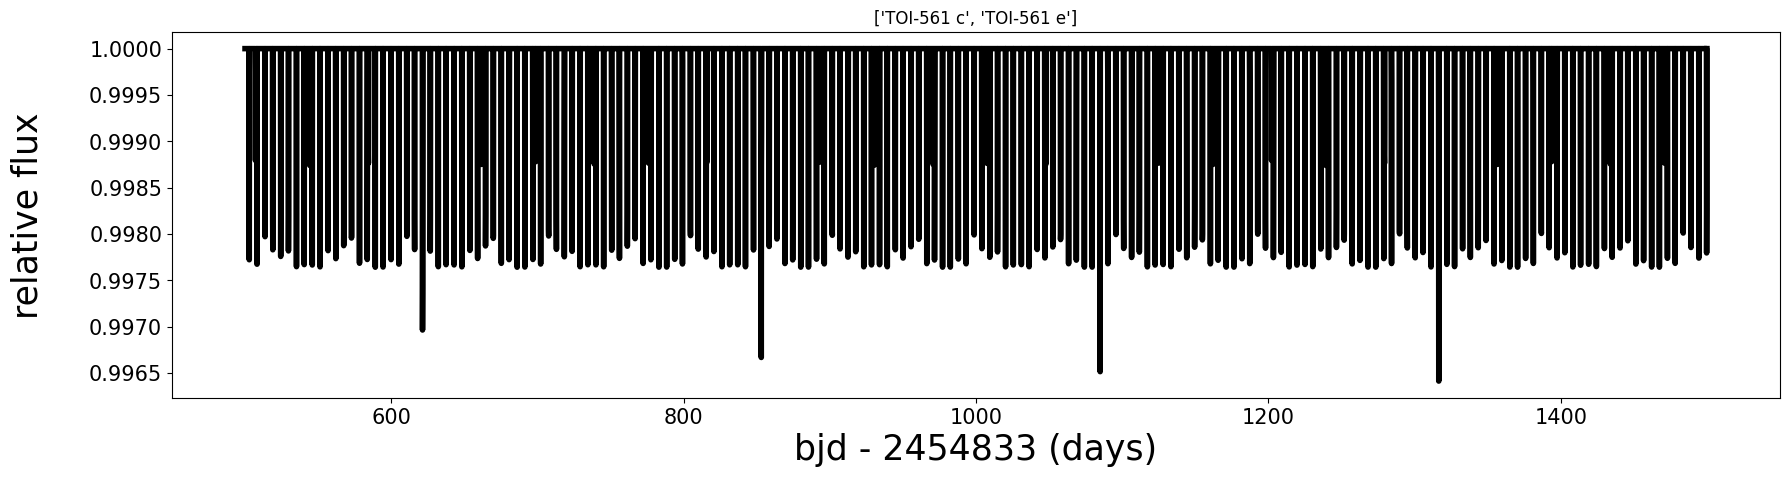

38.438931000000004 3688.882000000216 0.051 25.62 246.0 3.141592653589793 0.32 0.6 0.2 0.0271
80.209726 3705.180999999866 0.061 77.23 155.0 3.141592653589793 0.34 0.6 0.2 0.0286
['TOI-561 d', 'TOI-561 e']


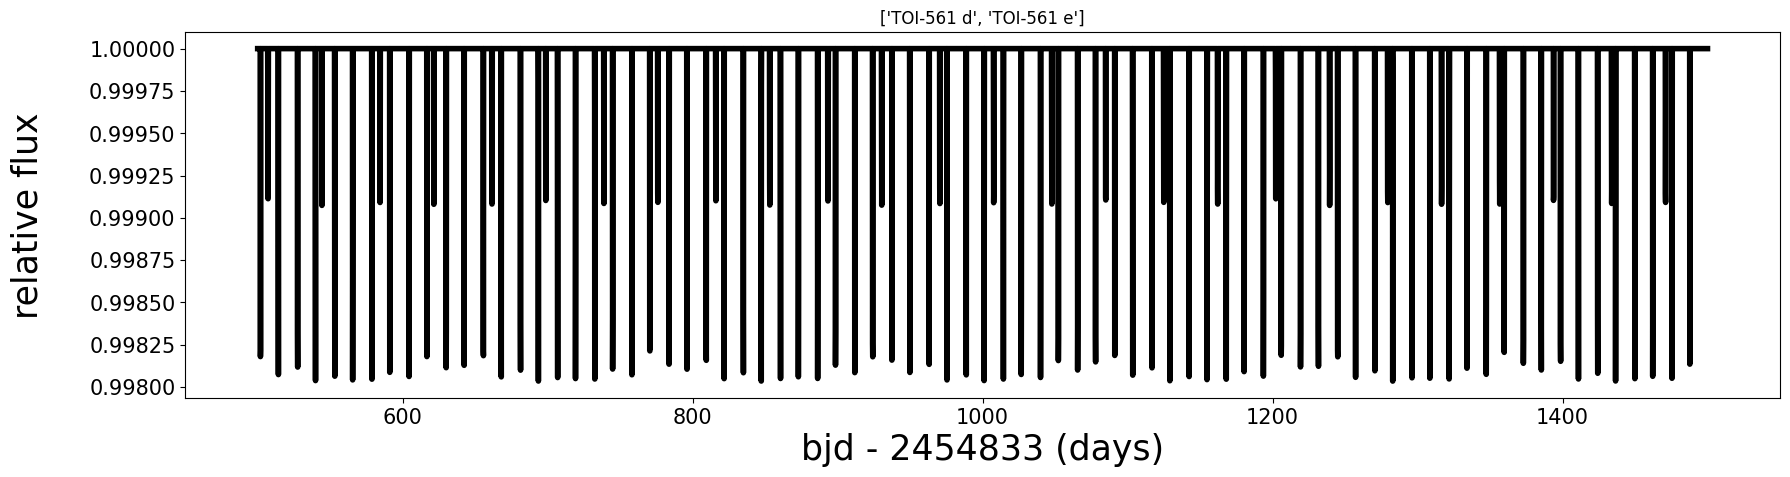

16.585823 3657.9870000001974 0.081 9.97702 -75.0 3.141592653589793 0.21 0.6 0.2 0.0224
22.759571 3715.753000000026 0.078 16.05111 81.0 3.141592653589793 0.893 0.6 0.2 0.0573
['TOI-700 b', 'TOI-700 c']


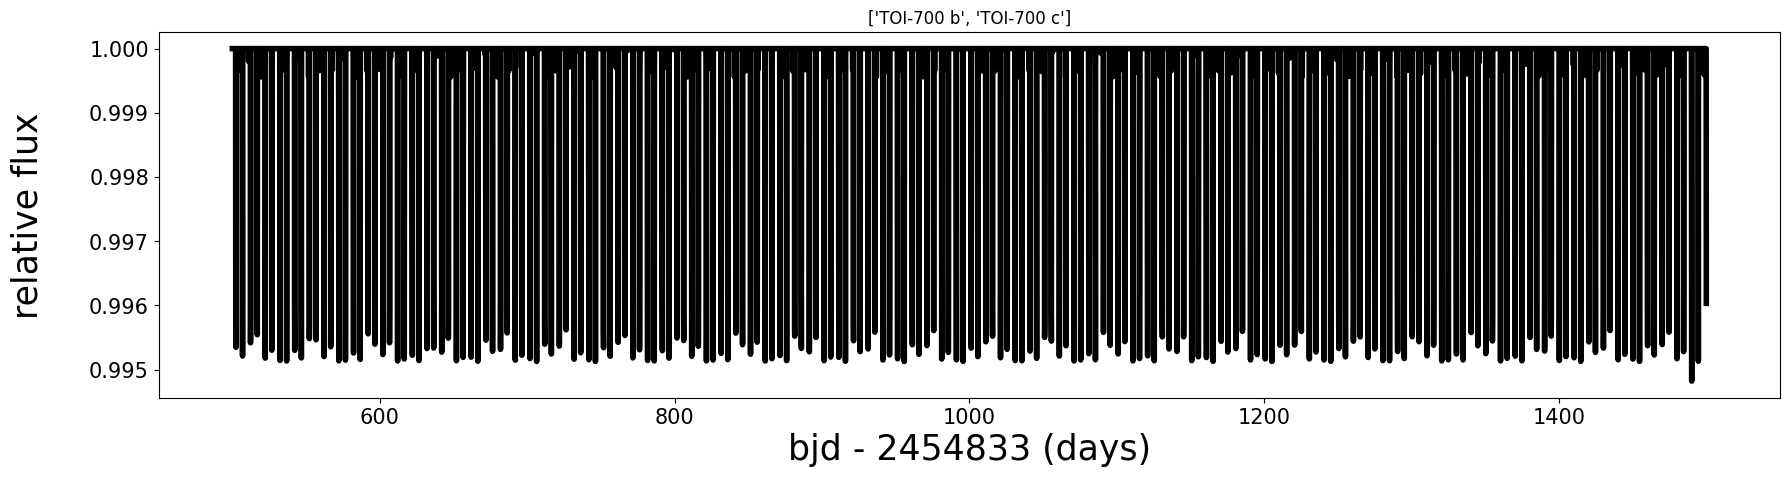

16.585823 3657.9870000001974 0.081 9.97702 -75.0 3.141592653589793 0.21 0.6 0.2 0.0224
40.006867 3909.1480000000447 0.111 37.42475 0.0 3.141592653589793 0.3 0.6 0.2 0.02476
['TOI-700 b', 'TOI-700 d']


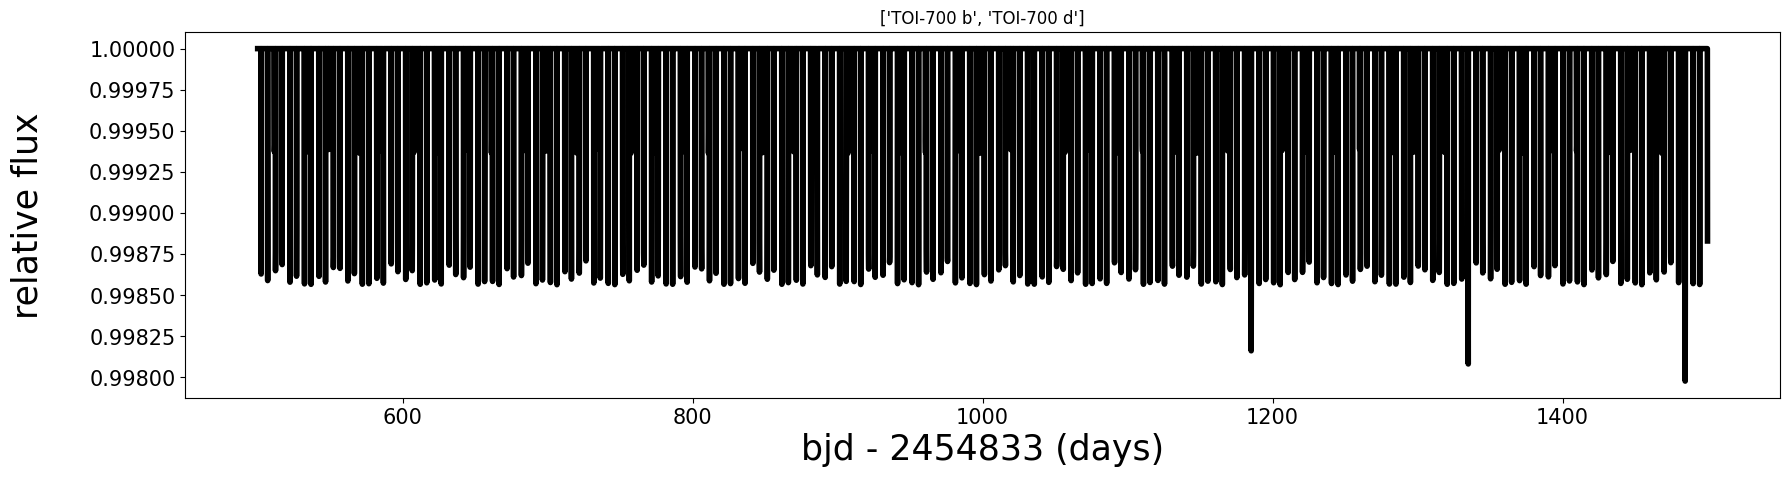

22.759571 3715.753000000026 0.078 16.05111 81.0 3.141592653589793 0.893 0.6 0.2 0.0573
40.006867 3909.1480000000447 0.111 37.42475 0.0 3.141592653589793 0.3 0.6 0.2 0.02476
['TOI-700 c', 'TOI-700 d']


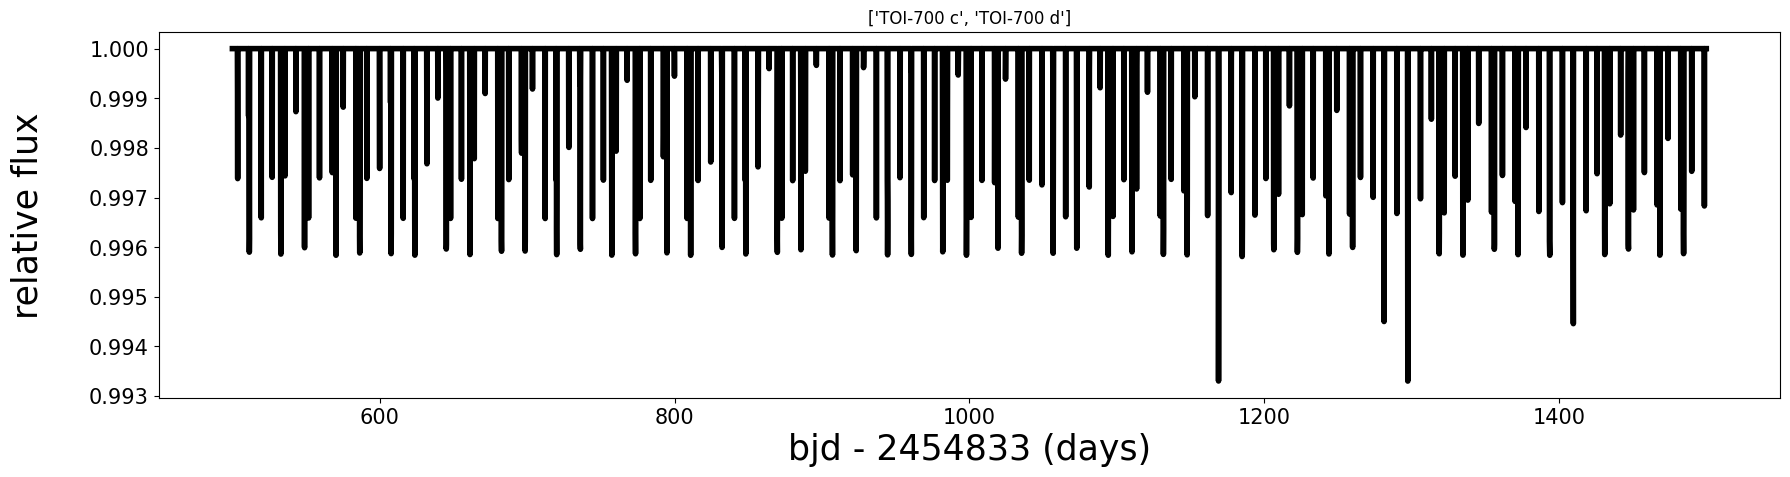

In [35]:
# Define the parameters
t = np.linspace(500, 1500, 10000)

# Create a directory to save figures and text files
output_folder = "data"
os.makedirs(output_folder, exist_ok=True)

for host,planet_name in planet.items():
# # Iterate through the planet data and retrieve parameters
# planet_data = [
#     {"name": "Kepler-51", "items": ["Kepler-51 d", "Kepler-51 b"]}
# ]

# Iterate through planet data
    system = MultiPlanetSystem()
    # Prepare to save printed values into a text file
    output_file_path = os.path.join(output_folder, f"{planet_name}_parameters.txt")
    with open(output_file_path, "w") as text_file:

        for item in planet_name:

            a = find_semi_major_axis("/content/PS_2024.04.26_06.59.44.csv", item)
            if a is None:
                a = None
            else:
                a = float(find_semi_major_axis("/content/PS_2024.04.26_06.59.44.csv", item))*244.99
            # print(a)

            tv = find_transit_time("/content/PS_2024.04.26_06.59.44.csv", item)
            if tv is None:
                tv = None
            else:
                tv = float(find_transit_time("/content/PS_2024.04.26_06.59.44.csv", item)) - 2454833

            e = find_eccentricity("/content/PS_2024.04.26_06.59.44.csv", item)
            if e is None:
                e = None
            else:
                e = float(find_eccentricity("/content/PS_2024.04.26_06.59.44.csv", item))

            p = find_orbital_period("/content/PS_2024.04.26_06.59.44.csv", item)
            if p is None:
                p = None
            else:
                p = float(find_orbital_period("/content/PS_2024.04.26_06.59.44.csv", item))
            # print(p)

            w = find_longitude_periastron("/content/PS_2024.04.26_06.59.44.csv", item)
            if w is None:
                w = None
            else:
                w = float(find_longitude_periastron("/content/PS_2024.04.26_06.59.44.csv", item))

            b = find_impacter_parameter("/content/PS_2024.04.26_06.59.44.csv", item)
            if b is None:
                b = None
            else:
                b = float(find_impacter_parameter("/content/PS_2024.04.26_06.59.44.csv", item))

            r = find_radius_ratio("/content/PS_2024.04.26_06.59.44.csv", item)
            if r is None:
                r = None
            else:
                r = float(find_radius_ratio("/content/PS_2024.04.26_06.59.44.csv", item))
            #print(r)

            om = 180 * np.pi / 180

            u1 = 0.6
            u2 = 0.2

            print(a, tv, e, p, w, om, b, u1, u2, r)
            system.add_planet(a, tv, e, p, w, om, b, u1, u2, r)
            # Write the parameters to the text file
            parameters_str = f"{a}, {tv}, {e}, {p}, {w}, {b}, {r}\n"
            text_file.write(parameters_str)

    # Initialize orbits and system
    system.initialize_orbits()
    # print(t)
    # Simulate the light curve
    flux = system.simulate_lightcurve(t)

    # Plot the simulated light curve
    plt.figure(figsize=(18, 5))
    plt.plot(t, flux + 1, color='k', linewidth=4)

    plt.ylabel('relative flux\n', fontsize=25)
    plt.xlabel('bjd - 2454833 (days)', fontsize=25)
    plt.title("%s"%planet_name)
    print("%s"%planet_name)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Save the figure in the output folder
    figure_file_path = os.path.join(output_folder, f"{host}_lightcurve.jpg")
    # plt.savefig(figure_file_path)

    # Show the figure
    plt.show()

In [36]:
!zip -r /content/data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/['HD 23472 c', 'HD 23472 f']_parameters.txt (deflated 40%)
  adding: content/data/['TOI-1260 c', 'TOI-1260 d']_parameters.txt (deflated 46%)
  adding: content/data/['HD 191939 c', 'HD 191939 d']_parameters.txt (deflated 41%)
  adding: content/data/['TOI-776 b', 'TOI-776 c']_parameters.txt (deflated 41%)
  adding: content/data/['HD 23472 d', 'HD 23472 e']_parameters.txt (deflated 40%)
  adding: content/data/['K2-138 d', 'K2-138 g']_parameters.txt (deflated 41%)
  adding: content/data/['HD 73583 b', 'HD 73583 c']_parameters.txt (deflated 40%)
  adding: content/data/['K2-233 b', 'K2-233 c']_parameters.txt (deflated 39%)
  adding: content/data/['L 98-59 b', 'L 98-59 c']_parameters.txt (deflated 38%)
  adding: content/data/['TOI-561 b', 'TOI-561 c']_parameters.txt (deflated 41%)
  adding: content/data/['K2-138 c', 'K2-138 g']_parameters.txt (deflated 38%)
  adding: content/data/['TOI-561 b', 'TOI-561 e']_parameters.txt (deflated 39%